In [2]:
#!pip install networkx

/home/soficp/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/soficp/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [96]:
# !pip install community
# !pip install python-louvain

/home/soficp/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/soficp/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/soficp/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/soficp/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
     |████████████████████████████████| 204 kB 1.5 MB/s eta 0:00:01
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9388 sha2

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import pickle
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import os
import io
from math import ceil
from scipy.stats import sem
from community import community_louvain
from itertools import combinations
# from sklearn.metrics import adjusted_rand_score
from random import Random
from copy import deepcopy
from json import loads, dumps
from collections import OrderedDict
from scipy.stats import ttest_rel
from sklearn import preprocessing

In [2]:
list_years1 = ['1719', '0709', '9799']

In [3]:
dt = [[0, 'Alimentos y animales vivos principalmente para alimentos', 'Alimentos y animales'], [1, 'Bebidas y tabaco', 'Bebidas y tabaco'], [2, 'Materias primas no comestibles, excepto combustibles', 'Materias primas'],[3, 
              'Combustibles minerales, lubricantes y materiales relacionados', 'Combustibles'], [4, 'Aceites, grasas y ceras animales y vegetales', 'Aceites y grasas'], [5, 'Productos químicos y productos afines, nep', 'Productos químicos'],
              [6, 'Productos manufacturados clasificados principalmente por materiales', 'Productos manufacturados'], [7, 'Maquinaria y equipo de transporte', 'Maq y equipo de transporte'], [8, 'Manufacturas diversas', 'Otras manufacturas'],
              [9, 'Materias primas y transacciones no clasificadas en otra parte de la CUCI', 'Otras materias primas']]
dt

[[0,
  'Alimentos y animales vivos principalmente para alimentos',
  'Alimentos y animales'],
 [1, 'Bebidas y tabaco', 'Bebidas y tabaco'],
 [2,
  'Materias primas no comestibles, excepto combustibles',
  'Materias primas'],
 [3,
  'Combustibles minerales, lubricantes y materiales relacionados',
  'Combustibles'],
 [4, 'Aceites, grasas y ceras animales y vegetales', 'Aceites y grasas'],
 [5, 'Productos químicos y productos afines, nep', 'Productos químicos'],
 [6,
  'Productos manufacturados clasificados principalmente por materiales',
  'Productos manufacturados'],
 [7, 'Maquinaria y equipo de transporte', 'Maq y equipo de transporte'],
 [8, 'Manufacturas diversas', 'Otras manufacturas'],
 [9,
  'Materias primas y transacciones no clasificadas en otra parte de la CUCI',
  'Otras materias primas']]

In [4]:
categ = pd.DataFrame(dt, columns=['Category', 'Desc_Categ', 'Desc_Categ_short'])
categ

Category                                         Desc_Categ  \
0         0  Alimentos y animales vivos principalmente para...   
1         1                                   Bebidas y tabaco   
2         2  Materias primas no comestibles, excepto combus...   
3         3  Combustibles minerales, lubricantes y material...   
4         4       Aceites, grasas y ceras animales y vegetales   
5         5         Productos químicos y productos afines, nep   
6         6  Productos manufacturados clasificados principa...   
7         7                  Maquinaria y equipo de transporte   
8         8                              Manufacturas diversas   
9         9  Materias primas y transacciones no clasificada...   

             Desc_Categ_short  
0        Alimentos y animales  
1            Bebidas y tabaco  
2             Materias primas  
3                Combustibles  
4            Aceites y grasas  
5          Productos químicos  
6    Productos manufacturados  
7  Maq y equipo de transporte  
8          Otras manufacturas  
9       Otras materias primas

In [5]:
df1 = pd.read_csv('../data/processed/df1.csv')
df1.head()

ReporterISO3  ProductCode ReporterName  prom_1719  prom_0709  prom_9799
0          ALB          101      Albania        NaN        NaN       8.62
1          ALB          104      Albania        NaN       2.64        NaN
2          ALB          105      Albania        NaN        NaN      10.61
3          ALB          106      Albania        NaN     501.09      24.35
4          ALB          201      Albania        NaN        NaN       3.19

In [6]:
expo_arg = df1[df1.ReporterISO3=='ARG']

In [7]:
expo_arg

ReporterISO3  ProductCode ReporterName  prom_1719  prom_0709  prom_9799
2952          ARG          101    Argentina   28970.14   28823.03   12795.68
2953          ARG          102    Argentina     878.86    2454.42    8374.56
2954          ARG          103    Argentina     129.20     116.19      68.64
2955          ARG          104    Argentina      25.03      43.06       1.25
2956          ARG          105    Argentina    1444.70     533.12    1886.73
...           ...          ...          ...        ...        ...        ...
4159          ARG         9702    Argentina       0.06      70.07      25.70
4160          ARG         9703    Argentina    1567.43    1706.23     194.86
4161          ARG         9704    Argentina       2.07        NaN      13.30
4162          ARG         9705    Argentina    1032.13     489.45      38.35
4163          ARG         9706    Argentina     946.40     534.19      48.85

[1212 rows x 6 columns]

In [8]:
for i in list_years1:
    bins = [0, 0.33, 0.66, 1, 2, 4, 6, 10, 50, 100, np.inf]
    names = ['0-0.33M', '0.33-0.66M', '0.66-1M', '1-2M', '2-4M', '4-6M', '6-10M', '10-50M','50-100M', '100-infM']
    expo_arg[f'bins_{i}'] = pd.cut(expo_arg[f'prom_{i}']/1000, bins, labels=names)

/tmp/ipykernel_29542/414420621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expo_arg[f'bins_{i}'] = pd.cut(expo_arg[f'prom_{i}']/1000, bins, labels=names)


In [9]:
pd.qcut(expo_arg[f'prom_{i}']/1000, 10).value_counts()

(-0.001, 0.0108]      120
(0.0108, 0.0506]      120
(0.0506, 0.162]       120
(0.162, 0.356]        120
(0.356, 0.731]        120
(1.686, 4.025]        120
(4.025, 9.079]        120
(9.079, 25.128]       120
(25.128, 1861.688]    120
(0.731, 1.686]        119
Name: prom_9799, dtype: int64

In [10]:
expo_arg.head()

ReporterISO3  ProductCode ReporterName  prom_1719  prom_0709  prom_9799  \
2952          ARG          101    Argentina   28970.14   28823.03   12795.68   
2953          ARG          102    Argentina     878.86    2454.42    8374.56   
2954          ARG          103    Argentina     129.20     116.19      68.64   
2955          ARG          104    Argentina      25.03      43.06       1.25   
2956          ARG          105    Argentina    1444.70     533.12    1886.73   

     bins_1719   bins_0709 bins_9799  
2952    10-50M      10-50M    10-50M  
2953   0.66-1M        2-4M     6-10M  
2954   0-0.33M     0-0.33M   0-0.33M  
2955   0-0.33M     0-0.33M   0-0.33M  
2956      1-2M  0.33-0.66M      1-2M

In [11]:
expo_arg['ProductCode'] = expo_arg['ProductCode'].astype(str)

/tmp/ipykernel_29542/2010683531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expo_arg['ProductCode'] = expo_arg['ProductCode'].astype(str)


In [122]:
expo_arg.bins_1719.value_counts()

0-0.33M       407
10-50M        123
0.33-0.66M    103
1-2M           92
2-4M           83
100-infM       64
6-10M          58
0.66-1M        51
4-6M           48
50-100M        39
Name: bins_1719, dtype: int64

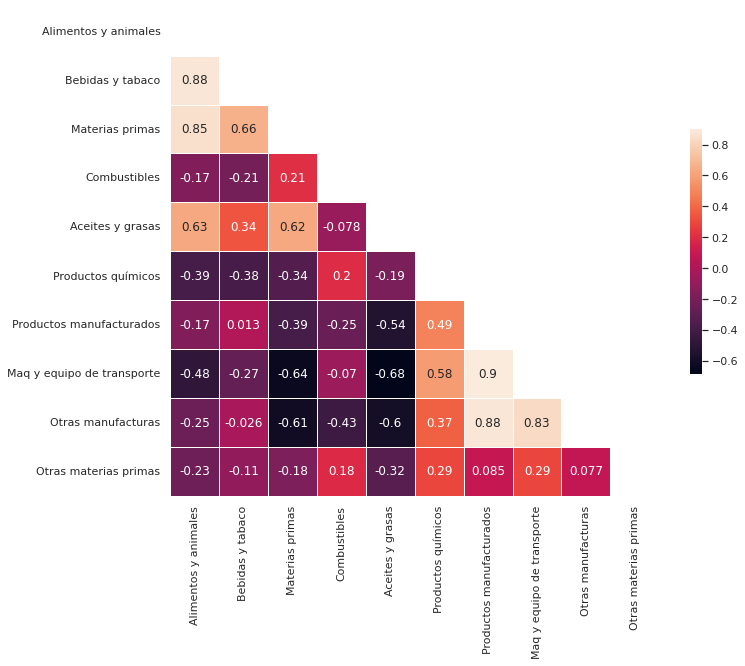

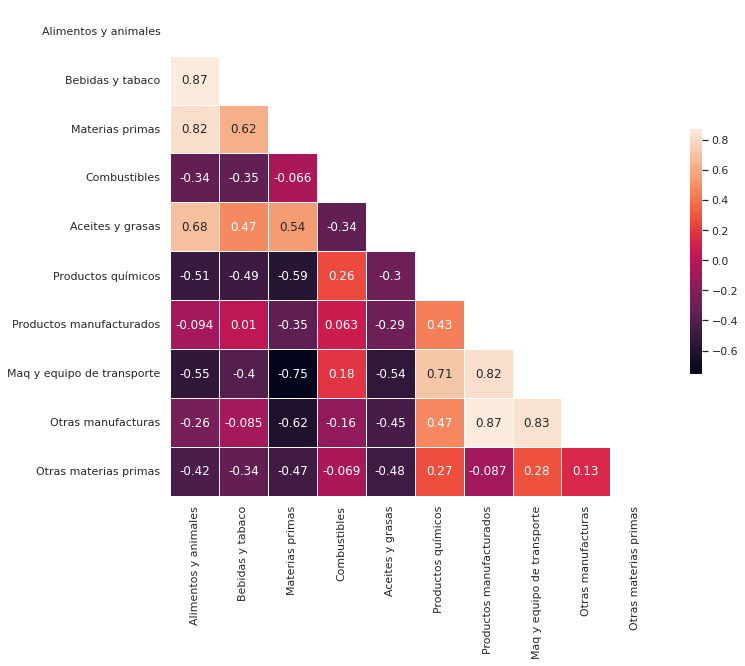

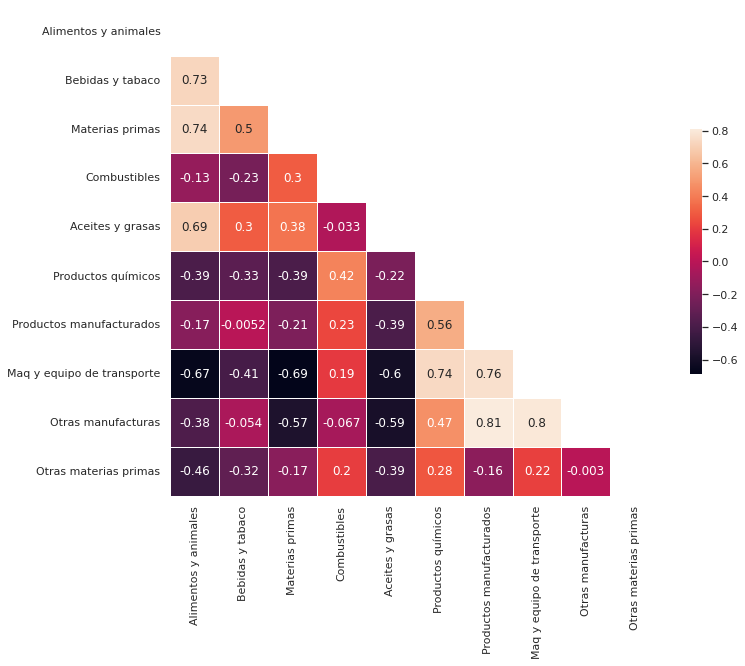

In [12]:
for year in list_years1:
    df1_ = pd.read_csv(f'../data/processed/prom_prox_matrix_categ_{year}_df1.csv')
    for i in list(df1_.index.values):
        df1_.rename(columns={f'{i}': categ.Desc_Categ_short[i]}, inplace=True)
    sns.set_theme(style="white")

    # Compute the correlation matrix
    corr_categ = df1_.corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_categ, dtype=bool))
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_categ, mask=mask, square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

In [13]:
df1_expo = df1.drop(columns=['ReporterISO3']).groupby(['ProductCode']).sum()

In [14]:
df1_expo = round(df1_expo / 1000, 2)

In [15]:
df1_expo = df1_expo.reset_index()

In [16]:
df1_expo

ProductCode  prom_1719  prom_0709  prom_9799
0             101    2825.05    2238.36    1209.25
1             102    8512.87    6489.24    4257.89
2             103    4302.23    3844.71    1407.32
3             104    1051.44     801.51     539.43
4             105    3107.57    2057.19     904.64
...           ...        ...        ...        ...
1236         9702     596.12     369.17     160.88
1237         9703    4046.05    2221.39     534.42
1238         9704     121.00     170.33     180.06
1239         9705    1170.34     489.67     330.11
1240         9706    2286.67    1743.24    1435.40

[1241 rows x 4 columns]

In [128]:
df1_expo.max()

ProductCode      9706.00
prom_1719      745459.96
prom_0709      744043.55
prom_9799      275046.80
dtype: float64

In [129]:
df1_expo.min()

ProductCode    101.00
prom_1719        0.00
prom_0709        0.00
prom_9799        3.65
dtype: float64

In [17]:
productos_argvcr = pd.read_csv('../data/processed/productos_argvcr_df1.csv')

In [18]:
# productos con vcr en los 3 períodos considerados
productos_argvcr[productos_argvcr.sum_vcr==3] # 110 items que han tenido vcr durante 20 años

code_prod_arg  HS_code  \
0              101      101   
1              201      201   
2              202      202   
3              205      205   
4              206      206   
..             ...      ...   
232           7304     7304   
235           7601     7601   
236           7605     7605   
248           8704     8704   
254           9302     9302   

                                        HS_description  code_1719  code_0709  \
0               Live horses, asses, mules and hinnies.      101.0      101.0   
1            Meat of bovine animals, fresh or chilled.      201.0      201.0   
2                      Meat of bovine animals, frozen.      202.0      202.0   
3    Meat of horses, asses, mules or hinnies, fresh...      205.0      205.0   
4    Edible offal of bovine animals, swine, sheep, ...      206.0      206.0   
..                                                 ...        ...        ...   
232  Tubes, pipes and hollow profiles, seamless, of...     7304.0     7304.0   
235                               Unwrought aluminium.     7601.0     7601.0   
236                                    Aluminium wire.     7605.0     7605.0   
248         Motor vehicles for the transport of goods.     8704.0     8704.0   
254  Revolvers and pistols, other than those of hea...     9302.0     9302.0   

     code_9799  vcr_1719  vcr_0709  vcr_9799  sum_vcr  
0        101.0         1         1         1        3  
1        201.0         1         1         1        3  
2        202.0         1         1         1        3  
3        205.0         1         1         1        3  
4        206.0         1         1         1        3  
..         ...       ...       ...       ...      ...  
232     7304.0         1         1         1        3  
235     7601.0         1         1         1        3  
236     7605.0         1         1         1        3  
248     8704.0         1         1         1        3  
254     9302.0         1         1         1        3  

[110 rows x 10 columns]

In [19]:
dict_prodarg_vcr = {}
for i in list_years1:
    list_prodarg_vcr = list(productos_argvcr[productos_argvcr[f'vcr_{i}']==1].HS_code) 
    dict_prodarg_vcr[i] = list_prodarg_vcr

In [20]:
dict_prodarg_vcr

{'1719': [101,
  201,
  202,
  205,
  206,
  207,
  208,
  303,
  304,
  306,
  307,
  402,
  404,
  405,
  406,
  408,
  409,
  504,
  505,
  506,
  510,
  511,
  703,
  711,
  713,
  805,
  806,
  808,
  809,
  810,
  813,
  902,
  903,
  909,
  1001,
  1003,
  1005,
  1006,
  1007,
  1008,
  1101,
  1103,
  1104,
  1107,
  1108,
  1201,
  1202,
  1204,
  1206,
  1207,
  1208,
  1209,
  1214,
  1301,
  1401,
  1502,
  1503,
  1505,
  1507,
  1508,
  1509,
  1512,
  1515,
  1517,
  1518,
  1520,
  1521,
  1602,
  1701,
  1901,
  2004,
  2005,
  2007,
  2008,
  2009,
  2102,
  2204,
  2206,
  2301,
  2302,
  2303,
  2304,
  2305,
  2306,
  2308,
  2309,
  2401,
  2508,
  2509,
  2512,
  2518,
  2522,
  2528,
  2603,
  2607,
  2616,
  2713,
  2803,
  2810,
  2813,
  2819,
  2827,
  2830,
  2836,
  2840,
  2923,
  3103,
  3201,
  3202,
  3301,
  3302,
  3305,
  3307,
  3405,
  3501,
  3502,
  3503,
  3507,
  3602,
  3805,
  3806,
  3808,
  3812,
  3817,
  3823,
  3824,
  3913,
  4101,
  

### Levanto las matrices de proximidad ya creadas

### <span style="color:steelblue">Dataset 1: </span>: todos los períodos - 109 países

En este caso las matrices reducidas (se extrajeron los productos con paths = 0) corresponden a 1217 productos. 

### Productos de la Bioeconomia

In [21]:
# levanto las matrices, me quedo con los productos de la bioecon y por ahora descarto las descripciones, solo preservo las categorías
prox_matrix1_bio = {}
for i in list_years1:
    # levanto las matrices
    df = pd.read_csv(f'../data/processed/prox_matix_desc_{i}_df1.csv')
    # me quedo con los productos de la bioecon 
    list_bio = list()
    list_bio.append('product_i')
    list_bio = list_bio + list(df[df['es_bio_prod'] == True].HS_code.astype(str))
    # descarto las descripciones, solo preservo las categorías
    list_bio.append('Category')
    df = df[df['es_bio_prod'] == True]
    df = df[df.columns.intersection(list_bio)]
    df = df.merge(df1_expo[['ProductCode',f'prom_{i}']], how='left', left_on='product_i', right_on='ProductCode')
    bins = [0, 330, 660, 1000, 2000, 4000, 6000, 10000, 16000, 20000, np.inf]
    # categorias ['0-0.33M', '0.33-0.66M', '0.66-1M', '1-2M','2-4M', '4-6M', '6-10M', '10-16M', '16-20M', '+20M']
    names = ['0-0.33M', '0.33-0.66M', '0.66-1M', '1-2M','2-4M', '4-6M', '6-10M', '10-16M', '16-20M', '+20M']
    df[f'prom_{i}'] = pd.cut(df[f'prom_{i}'], bins, labels=names)
    df['flag_argvcr'] = np.where(df.product_i.isin(dict_prodarg_vcr[i]), 1, 0)
    df = df.drop(columns=['ProductCode'])
    prox_matrix1_bio[i] = df


In [135]:
prox_matrix1_bio['1719'].head()

product_i       101       102       103       104       105       106  \
0        101  1.000000  0.250000  0.277778  0.142857  0.266667  0.228571   
1        102  0.250000  1.000000  0.416667  0.361111  0.444444  0.388889   
2        103  0.277778  0.416667  1.000000  0.190476  0.300000  0.285714   
3        104  0.142857  0.361111  0.190476  1.000000  0.433333  0.285714   
4        105  0.266667  0.444444  0.300000  0.433333  1.000000  0.485714   

        201       202       203  ...      8523      8804      9113      9401  \
0  0.454545  0.352941  0.294118  ...  0.294118  0.227273  0.117647  0.111111   
1  0.444444  0.194444  0.222222  ...  0.138889  0.361111  0.111111  0.361111   
2  0.409091  0.055556  0.388889  ...  0.222222  0.318182  0.111111  0.388889   
3  0.181818  0.095238  0.095238  ...  0.047619  0.227273  0.095238  0.285714   
4  0.366667  0.166667  0.333333  ...  0.233333  0.333333  0.100000  0.333333   

       9403      9404      9605  Category  prom_1719  flag_argvcr  
0  0.040000  0.095238  0.117647         0       2-4M            1  
1  0.388889  0.305556  0.055556         0      6-10M            0  
2  0.360000  0.238095  0.055556         0       4-6M            0  
3  0.240000  0.333333  0.095238         0       1-2M            0  
4  0.400000  0.300000  0.100000         0       2-4M            0  

[5 rows x 588 columns]

In [136]:
# calculo correlación entre las matrices de proximidad en los distintos períodos
df_corr_bio = pd.DataFrame()
for year in list_years1: 
    df_corr_bio[year] = prox_matrix1_bio[year].drop(columns=['product_i','Category', f'prom_{year}', 'flag_argvcr']).to_numpy().flatten()
df_corr_bio.corr() # pearson corr

1719      0709      9799
1719  1.000000  0.718087  0.582273
0709  0.718087  1.000000  0.667584
9799  0.582273  0.667584  1.000000

In [137]:
df_corr_bio.corr(method='spearman') # calculo correlación más robusta de spearman

1719      0709      9799
1719  1.000000  0.667422  0.518108
0709  0.667422  1.000000  0.615007
9799  0.518108  0.615007  1.000000

<AxesSubplot:>

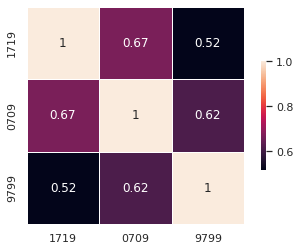

In [138]:
sns.heatmap(df_corr_bio.corr(method='spearman'),
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

### Total Productos

In [139]:
list_years1 = ['1719', '0709', '9799']
# levanto las matrices y por ahora descarto las descripciones
prox_matrix1 = {}
for i in list_years1:
    df = pd.read_csv(f'../data/processed/prox_matix_desc_{i}_df1.csv')
    df = df.merge(df1_expo[['ProductCode',f'prom_{i}']], how='left', left_on='product_i', right_on='ProductCode')
    bins = [0, 330, 660, 1000, 2000, 4000, 6000, 10000, 16000, 20000, np.inf]
    names = ['0-0.33M', '0.33-0.66M', '0.66-1M', '1-2M','2-4M', '4-6M', '6-10M', '10-16M', '16-20M', '+20M']
    df[f'prom_{i}'] = pd.cut(df[f'prom_{i}'], bins, labels=names)
    df = df.set_index(df.product_i)
    df = df.drop(columns=['product_i', 'HS_code', 'HS_description', 'es_bio_prod', 'paths','ProductCode'])
    df = df.set_index(df.index.astype(str))
    prox_matrix1[i] = df

In [140]:
prox_matrix1['1719'].head() # me quedo solo con las matrices de proximidad limpias

101       102       103       104       105       106  \
product_i                                                               
101        1.000000  0.250000  0.277778  0.142857  0.266667  0.228571   
102        0.250000  1.000000  0.416667  0.361111  0.444444  0.388889   
103        0.277778  0.416667  1.000000  0.190476  0.300000  0.285714   
104        0.142857  0.361111  0.190476  1.000000  0.433333  0.285714   
105        0.266667  0.444444  0.300000  0.433333  1.000000  0.485714   

                201       202       203       204  ...      9617      9618  \
product_i                                          ...                       
101        0.454545  0.352941  0.294118  0.352941  ...  0.000000  0.294118   
102        0.444444  0.194444  0.222222  0.250000  ...  0.027778  0.166667   
103        0.409091  0.055556  0.388889  0.166667  ...  0.055556  0.222222   
104        0.181818  0.095238  0.095238  0.238095  ...  0.000000  0.142857   
105        0.366667  0.166667  0.333333  0.166667  ...  0.033333  0.266667   

               9701      9702      9703      9704      9705      9706  \
product_i                                                               
101        0.294118  0.294118  0.235294  0.470588  0.352941  0.235294   
102        0.055556  0.027778  0.083333  0.166667  0.111111  0.083333   
103        0.000000  0.055556  0.000000  0.222222  0.055556  0.055556   
104        0.047619  0.000000  0.095238  0.047619  0.142857  0.142857   
105        0.100000  0.066667  0.166667  0.133333  0.300000  0.166667   

           Category  prom_1719  
product_i                       
101               0       2-4M  
102               0      6-10M  
103               0       4-6M  
104               0       1-2M  
105               0       2-4M  

[5 rows x 1219 columns]

In [141]:
prox_matrix1['1719']['prom_1719'].value_counts().sort_values()

16-20M         42
10-16M         89
0.66-1M        91
0.33-0.66M     95
4-6M          114
6-10M         128
2-4M          152
0-0.33M       164
+20M          164
1-2M          178
Name: prom_1719, dtype: int64

In [142]:
prox_matrix1['1719']['prom_1719']

product_i
101           2-4M
102          6-10M
103           4-6M
104           1-2M
105           2-4M
           ...    
9702    0.33-0.66M
9703          4-6M
9704       0-0.33M
9705          1-2M
9706          2-4M
Name: prom_1719, Length: 1217, dtype: category
Categories (10, object): ['0-0.33M' < '0.33-0.66M' < '0.66-1M' < '1-2M' ... '6-10M' < '10-16M' < '16-20M' < '+20M']

In [143]:
# calculo correlación entre las matrices de proximidad en los distintos períodos
df_corr = pd.DataFrame()
for year in list_years1: 
    df_corr[year] = prox_matrix1[year].drop(columns=['Category',f'prom_{year}']).to_numpy().flatten()
df_corr.corr(method='spearman') # calculo correlación más robusta de spearman

1719      0709      9799
1719  1.000000  0.639229  0.490182
0709  0.639229  1.000000  0.591098
9799  0.490182  0.591098  1.000000

<AxesSubplot:>

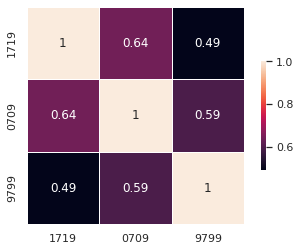

In [144]:
sns.heatmap(df_corr.corr(method='spearman'),
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

### Cambios en el tiempo

Calculando el coeficiente de correlación de Pearson (PCC) entre las matrices que representan el espacio de productos en los distintos períodos se puede verificar cómo cambia el espacio de productos en el tiempo. La correlación se calculó sobre cada par de proximidades correspondientes entre diferentes períodos de tiempo. Se observa una mayor correlación entre 1719 y 0709 que en relación a la década del '90, sin embargo las matrices parecen estar fuertemene correlacionadas.

La Tabla de correlaciones muestra que la estructura del espacio de productos parece ser estable y que, aunque los vínculos (links o enlaces) cambian en el tiempo, después de 10 años, los vínculos fuertes siguen siendo fuertes y los vínculos débiles permanecen débiles. Por lo tanto, los productos que están cerca tienden a permanecer cerca y los que están lejos tienden a quedarse lejos. 

## Productos de la Bioeconomia

In [22]:
# creo un dataframe con los nodos de entrada, salida y pesos por cada periodo
edge_df_bio = pd.DataFrame()
for i in list_years1:
    df = prox_matrix1_bio[i]
    df = df.set_index(df.product_i)
    df = df.drop(columns=['product_i', 'Category', f'prom_{i}', 'flag_argvcr'])
    df = df.set_index(df.index.astype(str))
    edge_list = df.unstack()
    # elimino los llamados a si mismo para obtener solo nodos i y j 
    edge_list = edge_list[edge_list != 1.0] 
    edge_list = edge_list.reset_index()
    edge_list.columns = ["Pi","Pj","prox"]
    # agrego una columna de año para saber de que periodo se trata
    edge_list['years'] = np.repeat(str(i), len(edge_list))
    edge_df_bio = edge_df_bio.append(edge_list)    

In [146]:
edge_df_bio

Pi    Pj      prox years
0        101   102  0.250000  1719
1        101   103  0.277778  1719
2        101   104  0.142857  1719
3        101   105  0.266667  1719
4        101   106  0.228571  1719
...      ...   ...       ...   ...
340467  9605  8804  0.176471  9799
340468  9605  9113  0.300000  9799
340469  9605  9401  0.250000  9799
340470  9605  9403  0.148148  9799
340471  9605  9404  0.217391  9799

[1021416 rows x 4 columns]

In [147]:
len(edge_df_bio[edge_df_bio.years=='1719'].Pj.unique())

584

In [148]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [149]:
def skeleton(list_periods=list, edge_df=pd.DataFrame):
    dict_mst = {}
    dict_weights = {}
    for i in list_periods: 
        g = nx.from_pandas_edgelist(edge_df[edge_df.years==i], source="Pi", target="Pj", edge_attr=["prox"])
        mst = nx.maximum_spanning_tree(g, weight='prox') #Maximum Spanning Tree
        #-Build Maximum Spanning Tree + Keep Edges > 0.50-# 
        ps = nx.Graph()
        #Add MST ('weight' attribute only)
        for u,v,w in mst.edges(data=True):
            ps.add_edge(u,v,prox=w["prox"]) 
                # draw graph
        fig = plt.figure(figsize=(15,10))
        # pos = nx.spring_layout(ps, weight='prox', seed=99)
        nx.draw(ps, with_labels=False, node_size=50, alpha=0.85)
        plt.legend()
        plt.title(f"Visualization of skeleton MST {i}")
        plt.tight_layout()     
        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_732/2015651689.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


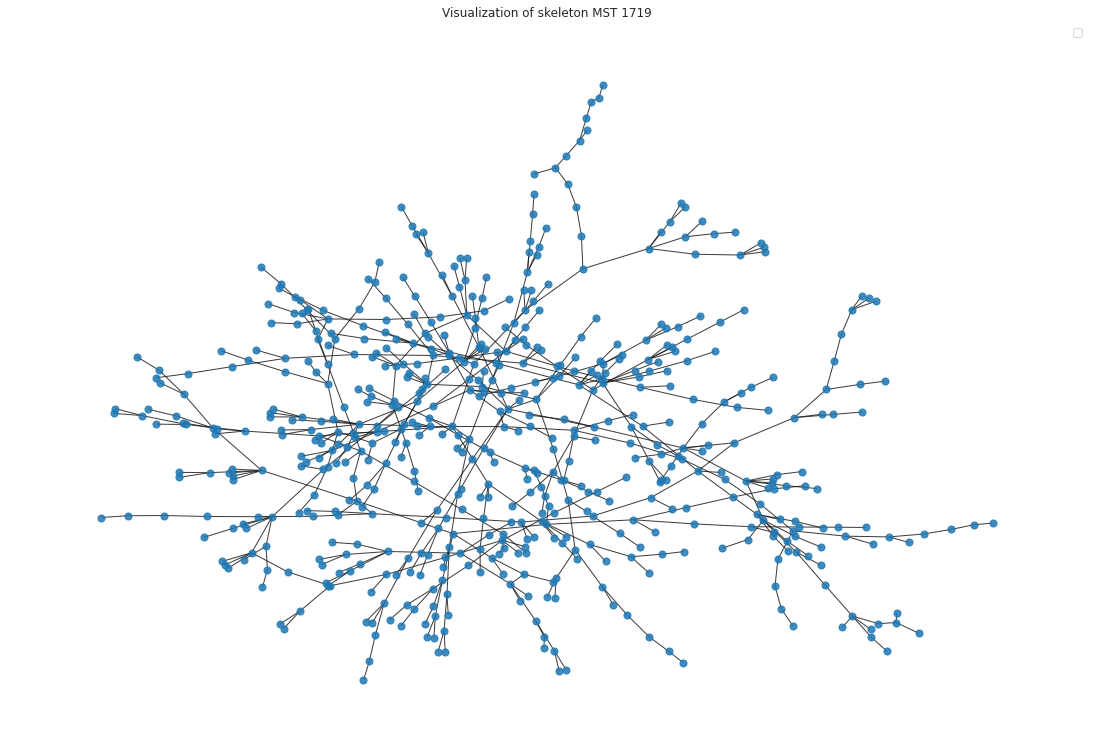

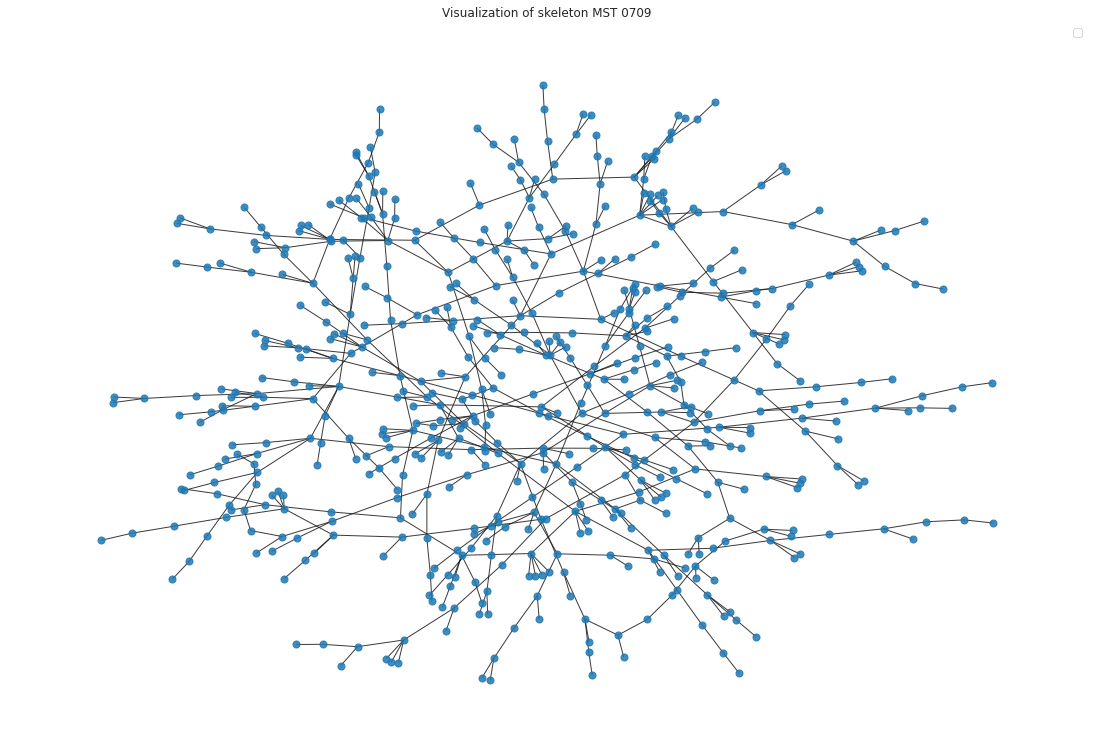

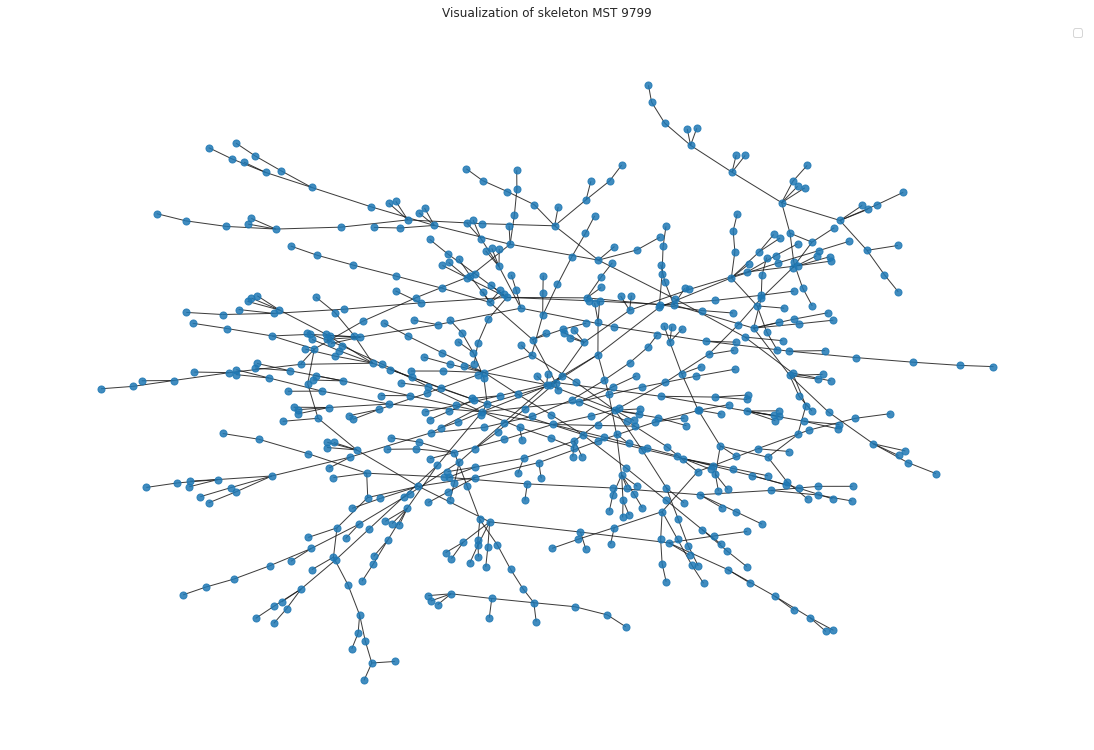

In [150]:
# esqueleto solo del MST
skeleton(list_periods=list_years1, edge_df=edge_df_bio)

In [151]:
def skeleton1(list_periods=list, edge_df=pd.DataFrame):
    for i in list_periods: 
        g = nx.from_pandas_edgelist(edge_df[edge_df.years==i], source="Pi", target="Pj", edge_attr=["prox"])
        mst = nx.maximum_spanning_tree(g, weight='prox') #Maximum Spanning Tree
        #-Build Maximum Spanning Tree + Keep Edges > 0.50-# 
        ps = nx.Graph()
        #Add MST ('weight' attribute only)
        for u,v,w in mst.edges(data=True):
            ps.add_edge(u,v,prox=w["prox"]) 
                # draw graph
        fig = plt.figure(figsize=(15,10))
        pos = nx.spring_layout(ps, weight='prox', seed=99)
        nx.draw(ps, pos=pos, with_labels=False, node_size=50, alpha=0.85)
        plt.legend()
        plt.title(f"Visualization of skeleton MST {i}")
        plt.tight_layout()     

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_732/3314079826.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


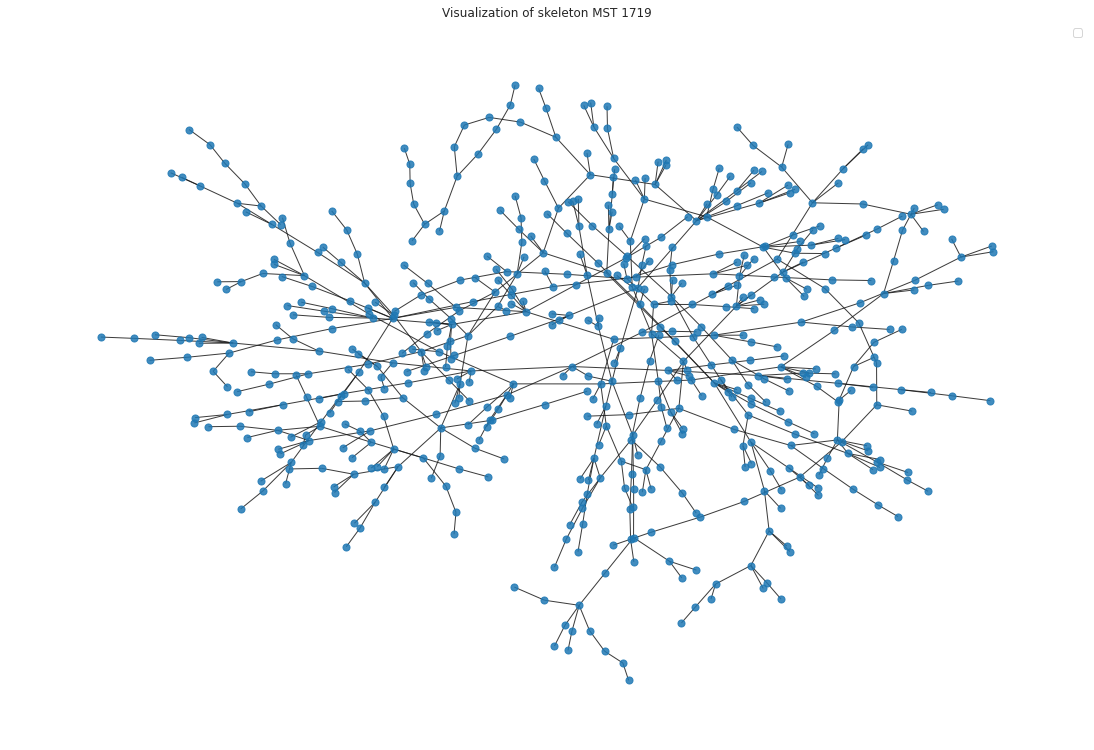

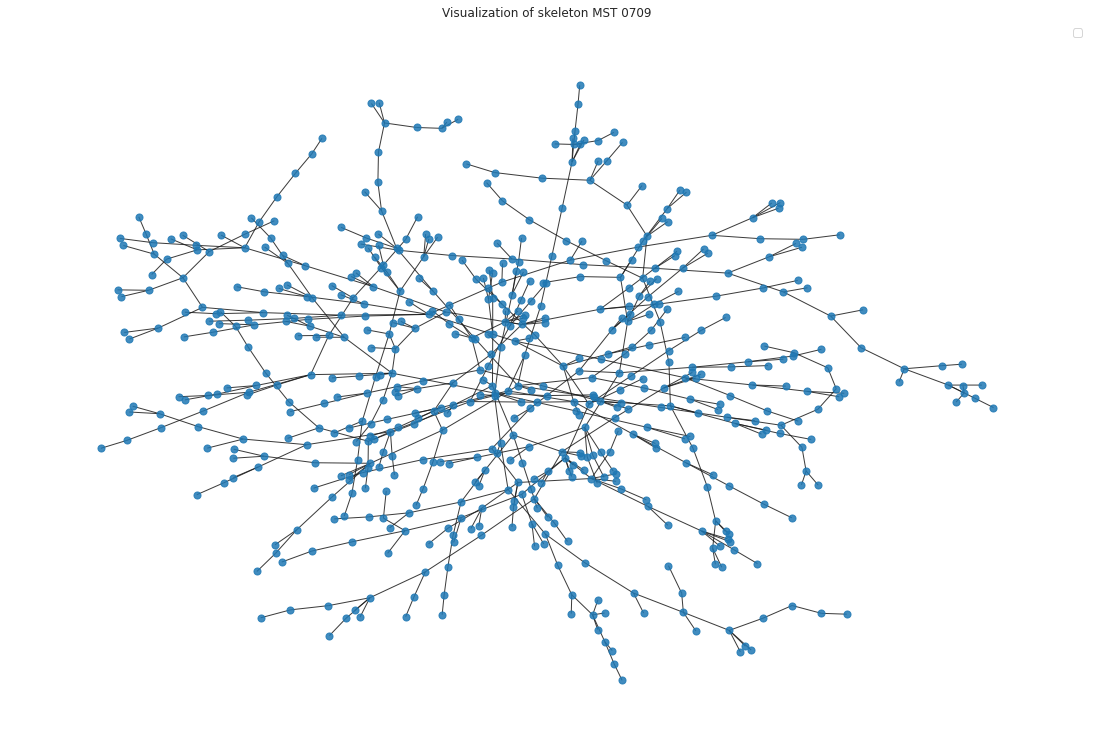

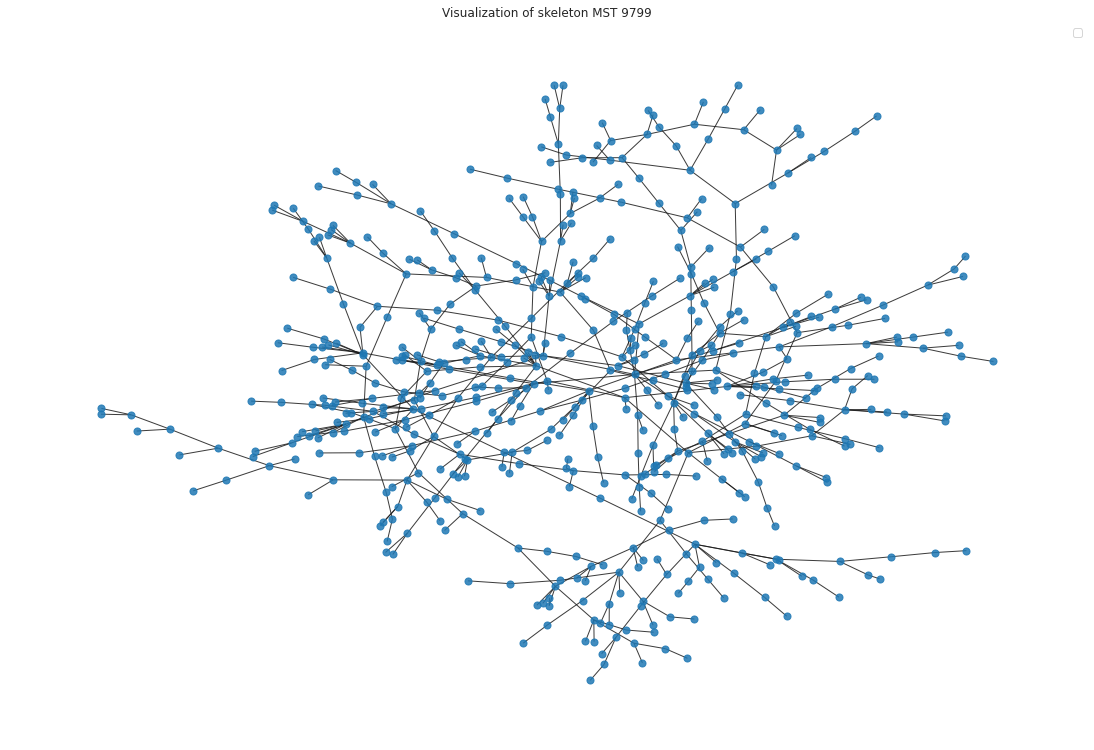

In [152]:
# esqueleto del MST con spring layout
skeleton1(list_periods=list_years1, edge_df=edge_df_bio)

In [153]:
def skeleton2(list_periods=list, edge_df=pd.DataFrame, threshold:float=0.55):
    for i in list_periods: 
        g = nx.from_pandas_edgelist(edge_df[edge_df.years==i], source="Pi", target="Pj", edge_attr=["prox"])
        mst = nx.maximum_spanning_tree(g, weight='prox') #Maximum Spanning Tree
        #-Build Maximum Spanning Tree + Keep Edges > 0.50-# 
        ps = nx.Graph()
        #Add MST ('weight' attribute only)
        for u,v,w in mst.edges(data=True):
            ps.add_edge(u,v,prox=w["prox"]) 
        #Add Edges > 0.55 
        for u,v,w in g.edges(data=True):
            if w['prox'] >= threshold:
                ps.add_edge(u,v,prox=w["prox"])
        # draw graph
        fig = plt.figure(figsize=(15,10))
        pos = nx.spring_layout(ps, weight='prox', seed=99)
        nx.draw(ps, pos=pos, with_labels=False, node_size=50, alpha=0.85)
        plt.legend()
        plt.title(f"Visualization of {i} skeleton MST + edges > {threshold}")
        plt.tight_layout()    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_732/1350745527.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


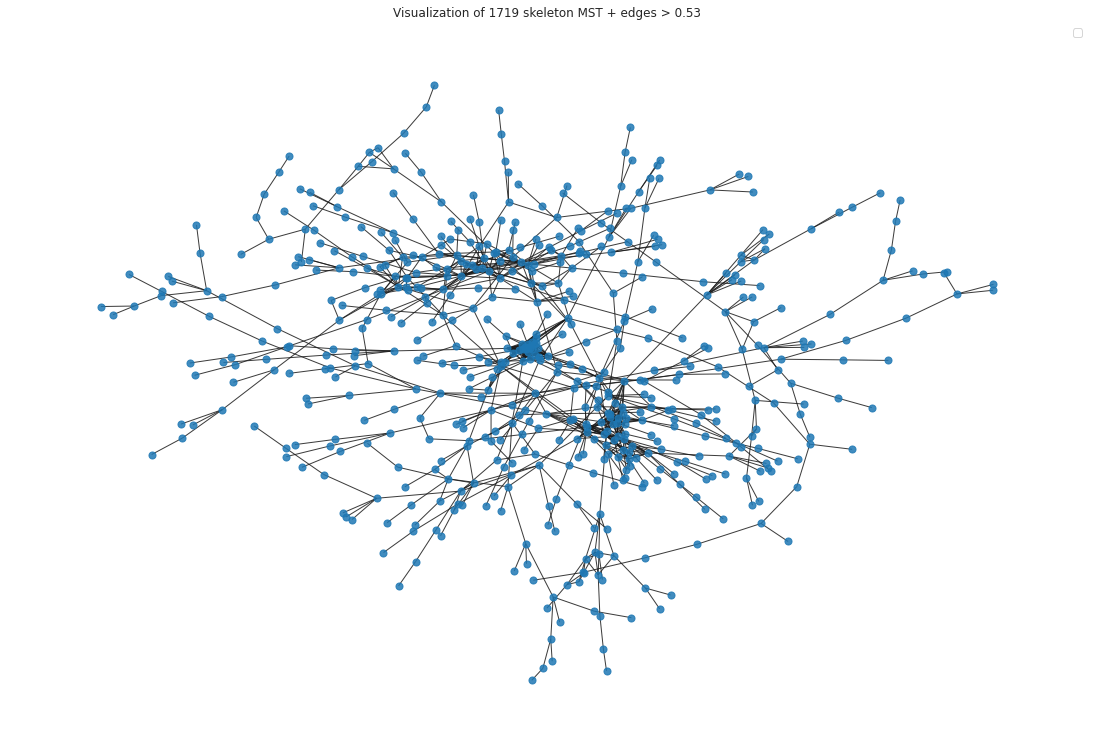

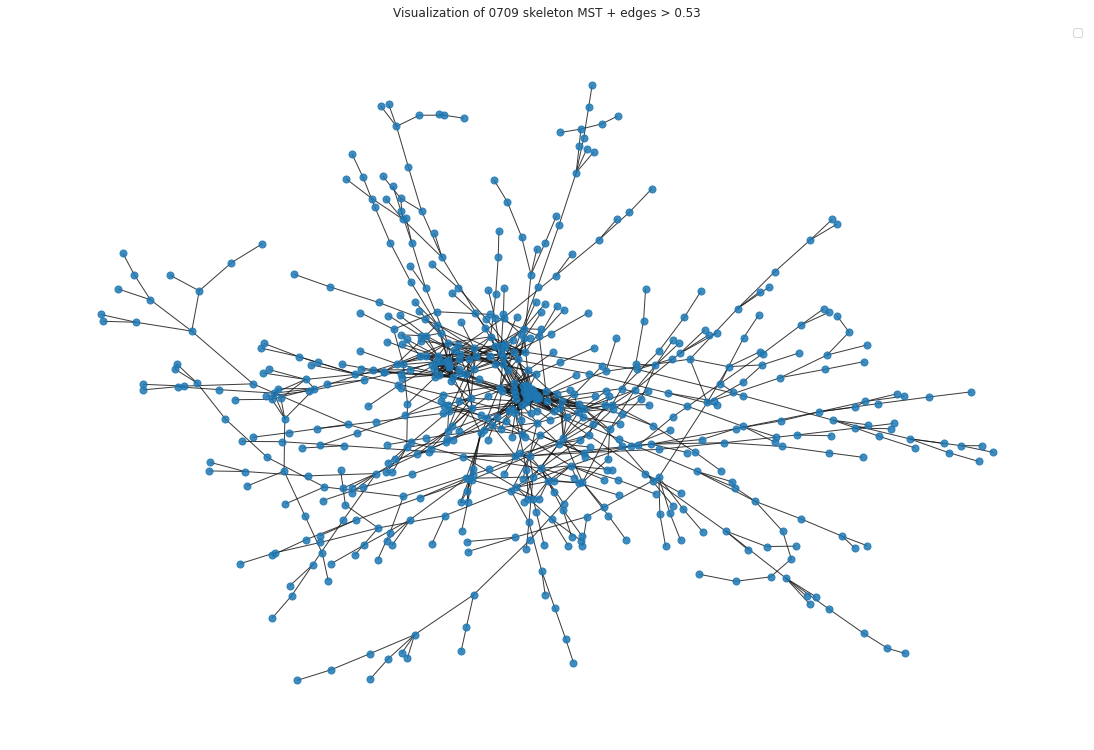

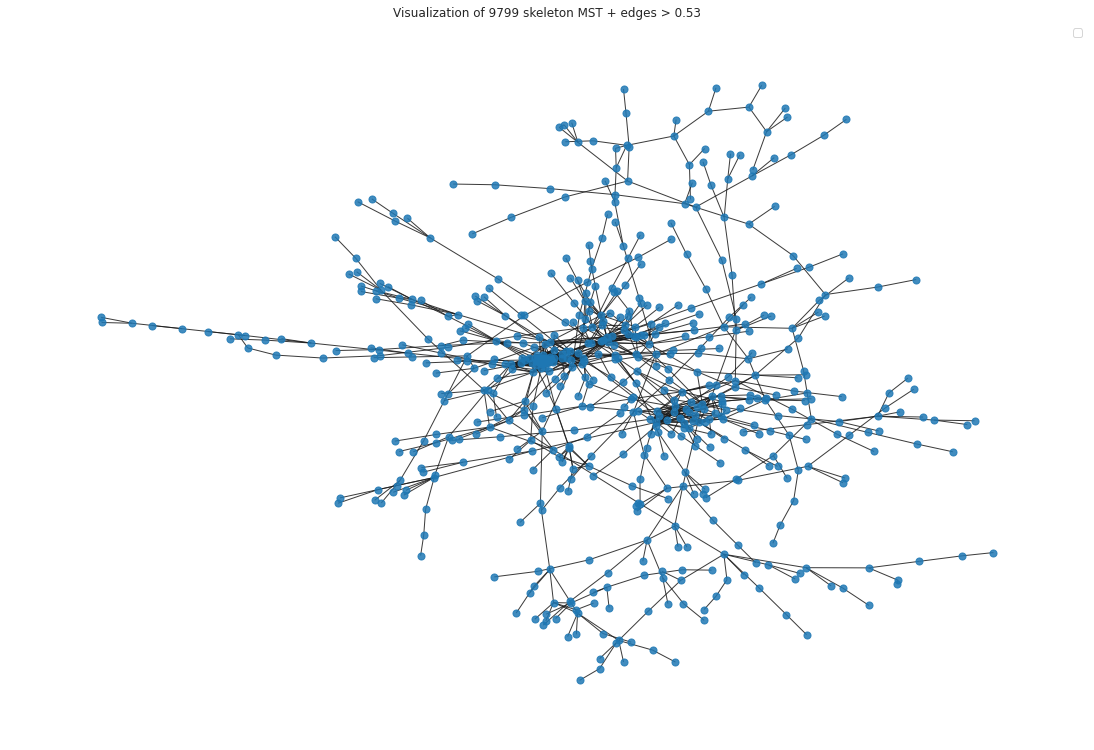

In [154]:
# esqueleto MST + edges > 0.53 layout spring
skeleton2(list_periods=list_years1, edge_df=edge_df_bio, threshold=0.53)

In [155]:
def skeleton3(list_periods=list, edge_df=pd.DataFrame, prox_matrix=dict, category=pd.DataFrame, label:str=False, threshold:float=0.55):
    for i in list_periods: 
        g = nx.from_pandas_edgelist(edge_df[edge_df.years==i], source="Pi", target="Pj", edge_attr=["prox"])
        mst = nx.maximum_spanning_tree(g, weight='prox') #Maximum Spanning Tree
        #-Build Maximum Spanning Tree + Keep Edges > 0.50-# 
        ps = nx.Graph()
        #Add MST ('weight' attribute only)
        for u,v,w in mst.edges(data=True):
            ps.add_edge(u,v,prox=w["prox"]) 
        #Add Edges > 0.55 
        for u,v,w in g.edges(data=True):
            if w['prox'] >= threshold:
                ps.add_edge(u,v,prox=w["prox"])
        
        # set node colors according to product category
        category_attr = list(prox_matrix[i].Category)
        # set nodes attributes
        nx.set_node_attributes(ps, category_attr, "category")
        values = prox_matrix[i].Category
        # compute maximum value s.t. all colors can be normalised
        maxval = np.max(values) 
        # get colormap
        cmap=plt.cm.tab10

        # draw graph
        fig = plt.figure(figsize=(15,10))
        pos = nx.spring_layout(ps, weight='prox', seed=99)
        nx.draw(ps, pos=pos, with_labels=label, node_size=50, node_color=[cmap(v/maxval) for v in values], alpha=0.85)
        # # make empty plot with correct color and label for each group
        for v in set(values):
            plt.scatter([],[], c=[cmap(v/maxval)], label=category.Desc_Categ_short[v])
        plt.legend()
        plt.title(f"Visualization of {i} skeleton MST + edges > {threshold} + color categories")
        plt.tight_layout()  
        
        

/tmp/ipykernel_732/147744445.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


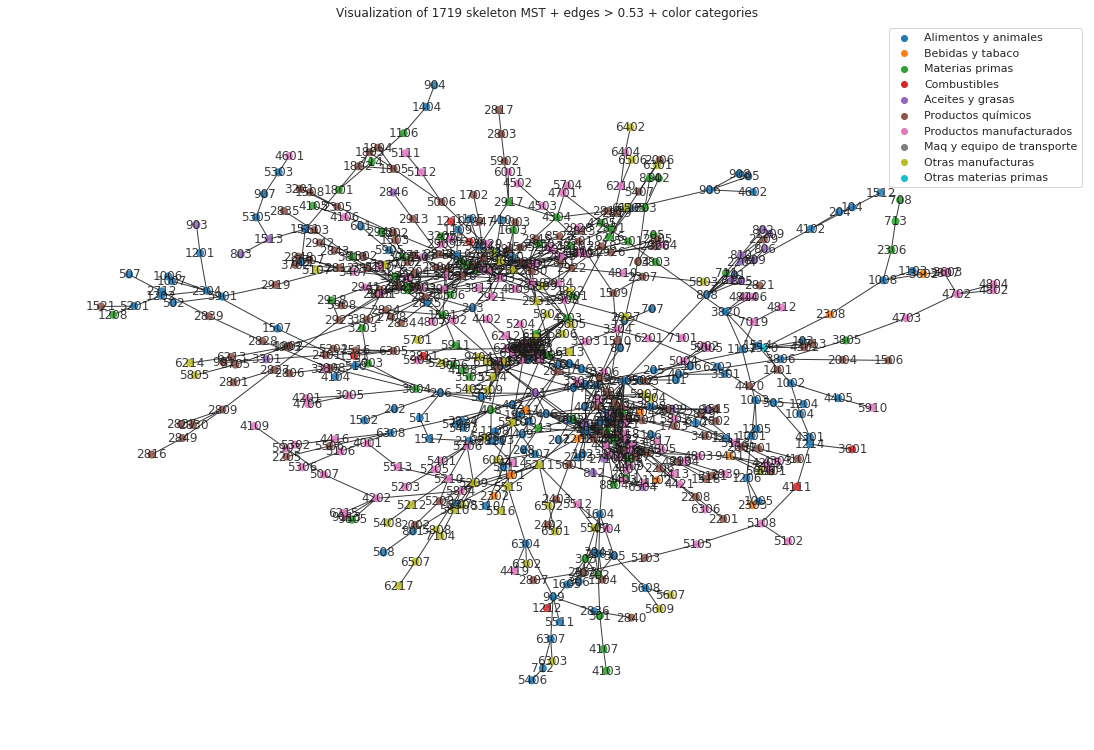

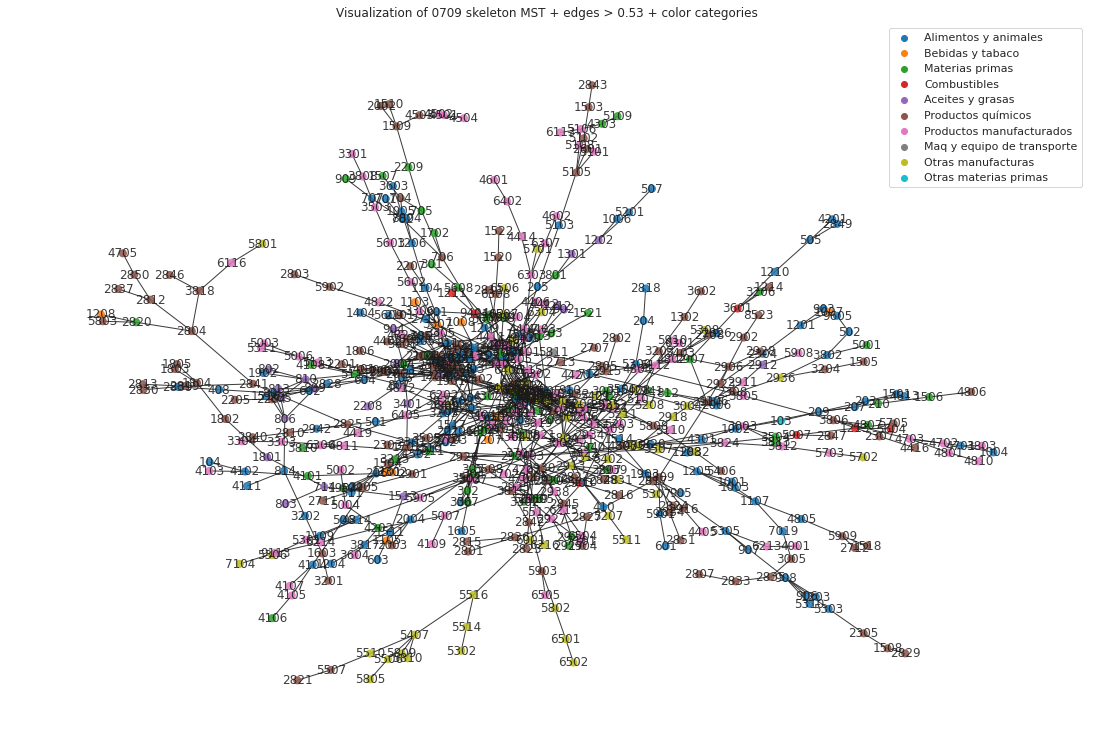

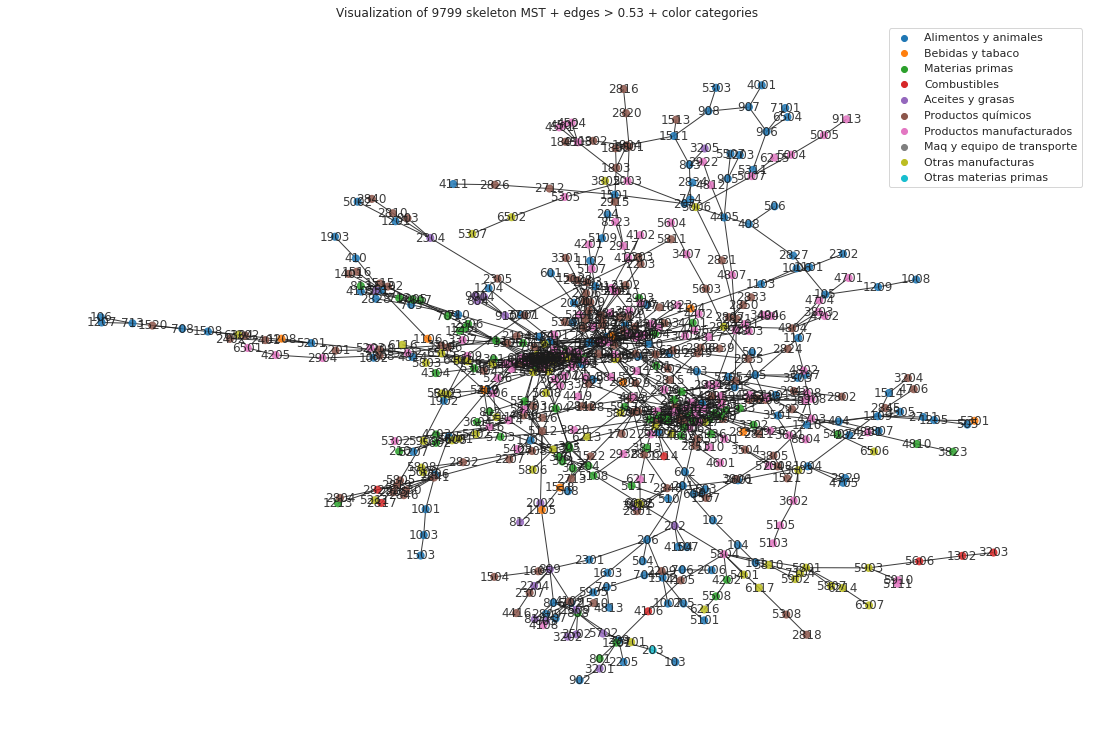

In [ ]:
# esqueleto MST + edges > 0.53 layout spring + categories color
skeleton3(list_periods=list_years1, edge_df=edge_df_bio, prox_matrix=prox_matrix1_bio, category=categ, label=True, threshold=0.53)

/tmp/ipykernel_732/147744445.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


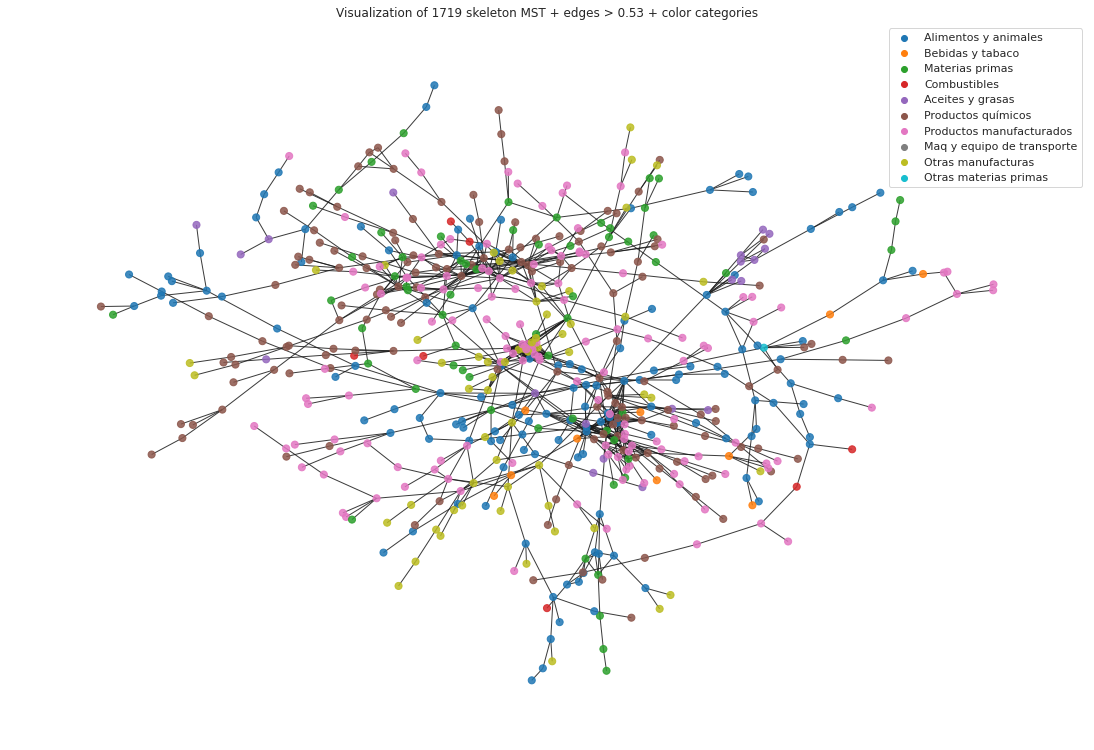

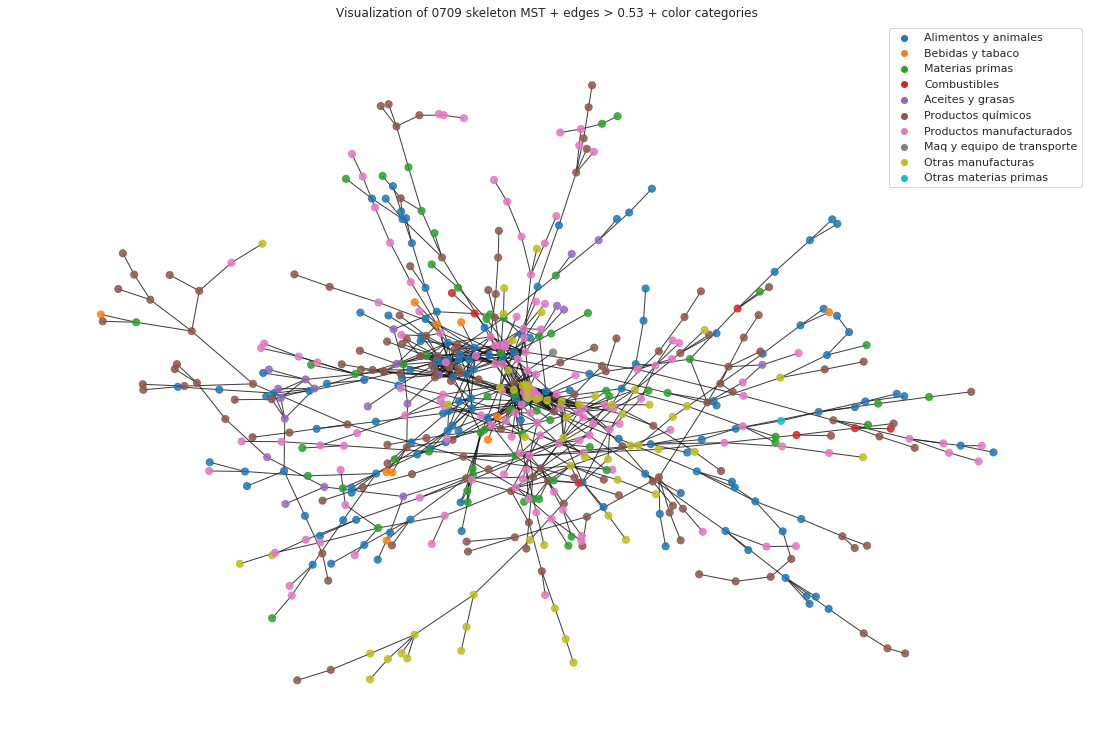

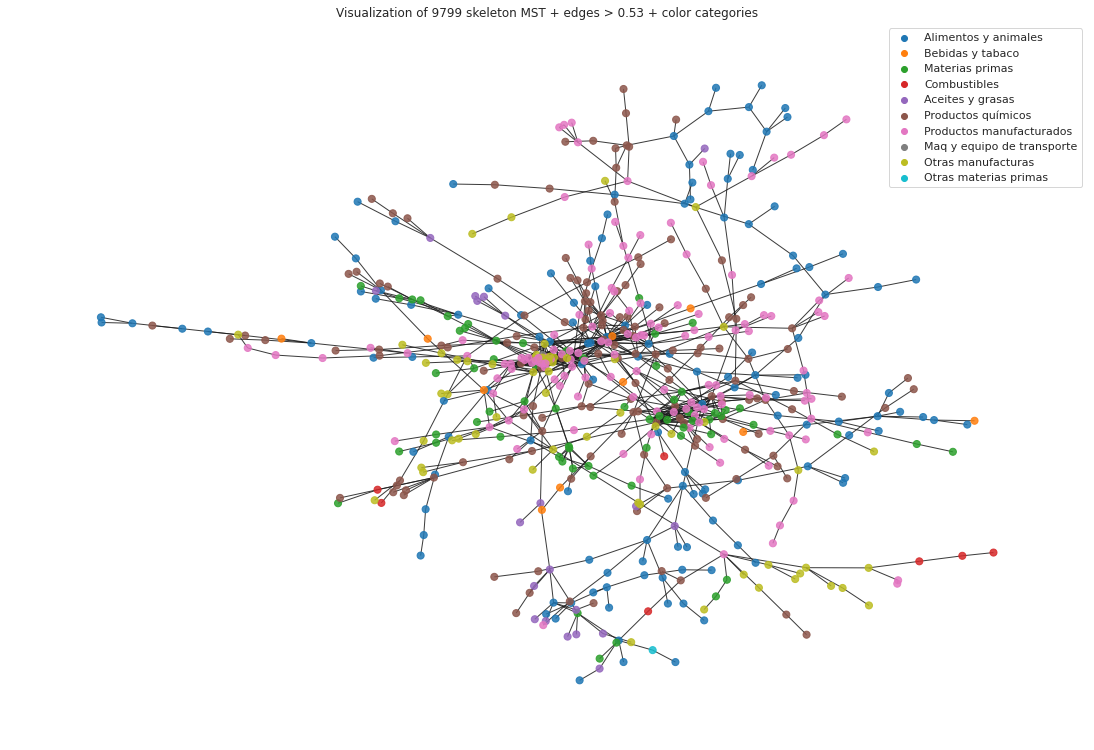

In [ ]:
# esqueleto MST + edges > 0.53 layout spring + categories color
skeleton3(list_periods=list_years1, edge_df=edge_df_bio, prox_matrix=prox_matrix1_bio, category=categ, threshold=0.53)

In [160]:
def skeleton4(list_periods=list, edge_df=pd.DataFrame,expo_df=pd.DataFrame,  dict_nodes=list, label:str=False, threshold:float=0.55):
    for i in list_periods: 
        g = nx.from_pandas_edgelist(edge_df[edge_df.years==i], source="Pi", target="Pj", edge_attr=["prox"])
        mst = nx.maximum_spanning_tree(g, weight='prox') #Maximum Spanning Tree
        #-Build Maximum Spanning Tree + Keep Edges > 0.50-# 
        ps = nx.Graph()
        #Add MST ('weight' attribute only)
        for u,v,w in mst.edges(data=True):
            ps.add_edge(u,v,prox=w["prox"]) 
        #Add Edges > 0.55 
        for u,v,w in g.edges(data=True):
            if w['prox'] >= threshold:
                ps.add_edge(u,v,prox=w["prox"])
        
        list_nodes = dict_nodes[i]
        color_map = []
        
        for node in list(ps.nodes):
            if node in map(str, list_nodes):
                color_map.append('tab:blue')
            else: 
                color_map.append('lightgrey') 

        # Manually set each nodes size according to value of exports in Million USD
        nodes_df = pd.DataFrame({'nodes': list(ps.nodes)})
        expo_df2 = pd.merge(nodes_df, expo_df, how='left', left_on='nodes', right_on='ProductCode' )
        expo_df2[f'bins_{i}'] = np.where(expo_df2[f'bins_{i}'].isna(), '0-0.33M', expo_df2[f'bins_{i}'])
        lst = list(expo_df2[f'bins_{i}'])
        d = {x: i for i, x in enumerate(['0-0.33M', '0.33-0.66M', '0.66-1M', '1-2M', '2-4M', '4-6M', '6-10M', '10-50M','50-100M', '100-infM'])}
        lst_new = [d[x] for x in lst]
        node_sizes = [5, 20, 40, 60, 80, 100, 150, 200, 300, 500]
        list_node_size = [node_sizes[x] for x in lst_new]

        # draw graph
        fig = plt.figure(figsize=(15,10))
        pos = nx.spring_layout(ps, weight='prox', seed=99)
        nx.draw(ps, pos=pos, with_labels=label, node_color=color_map, node_size=list_node_size, alpha=0.85)
        # # make empty plot with correct color and label for each group
        # for v in set(color_map):
        #     plt.scatter([],[], c=v, label=['arg_vcr', 'other'])
        plt.legend(scatterpoints = 1)
        plt.title(f"Visualization of {i} skeleton MST + edges > {threshold} + Arg VCR")
        plt.tight_layout()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_732/1894358169.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


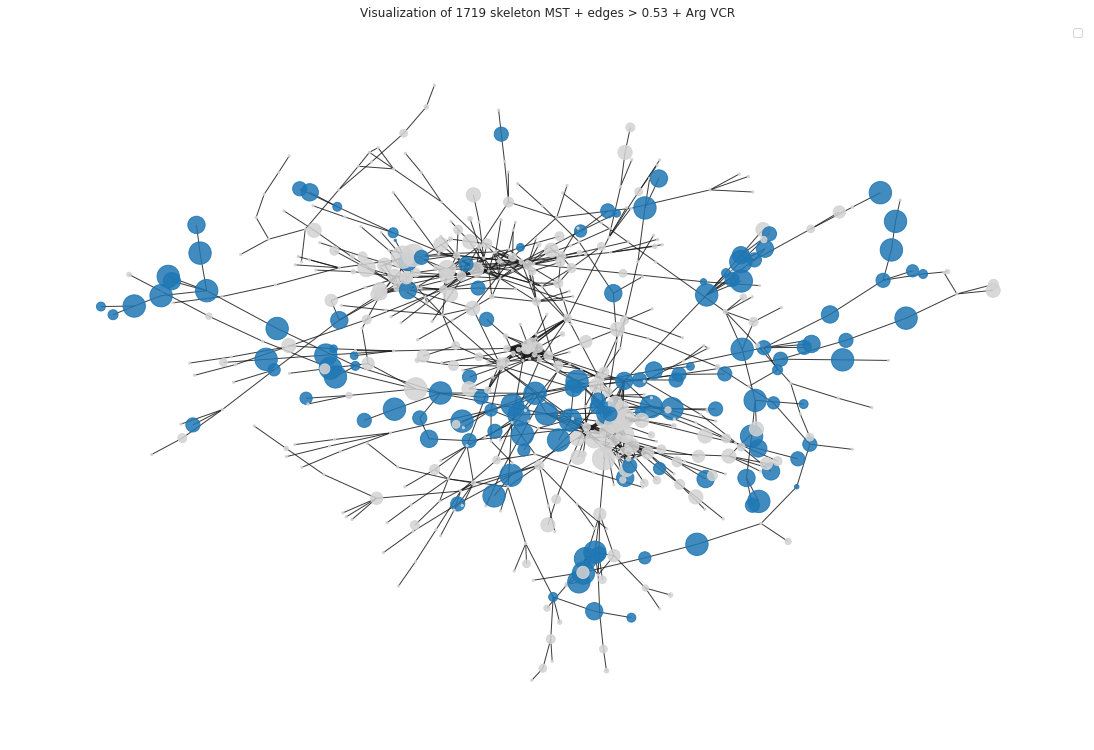

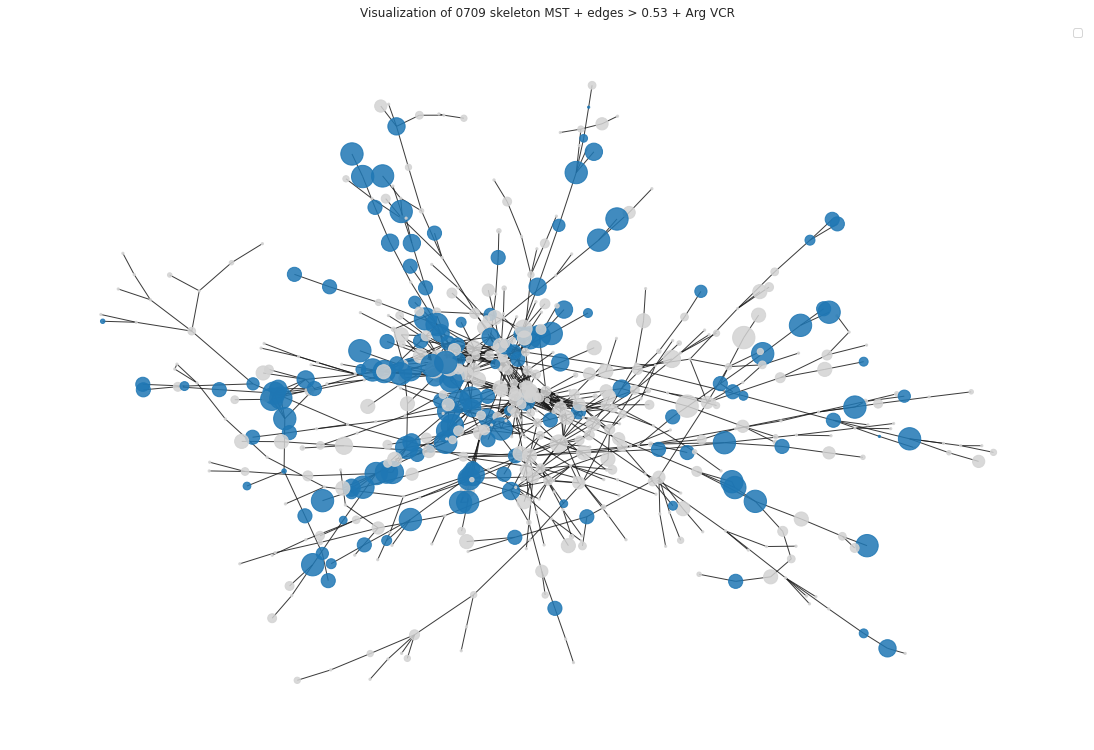

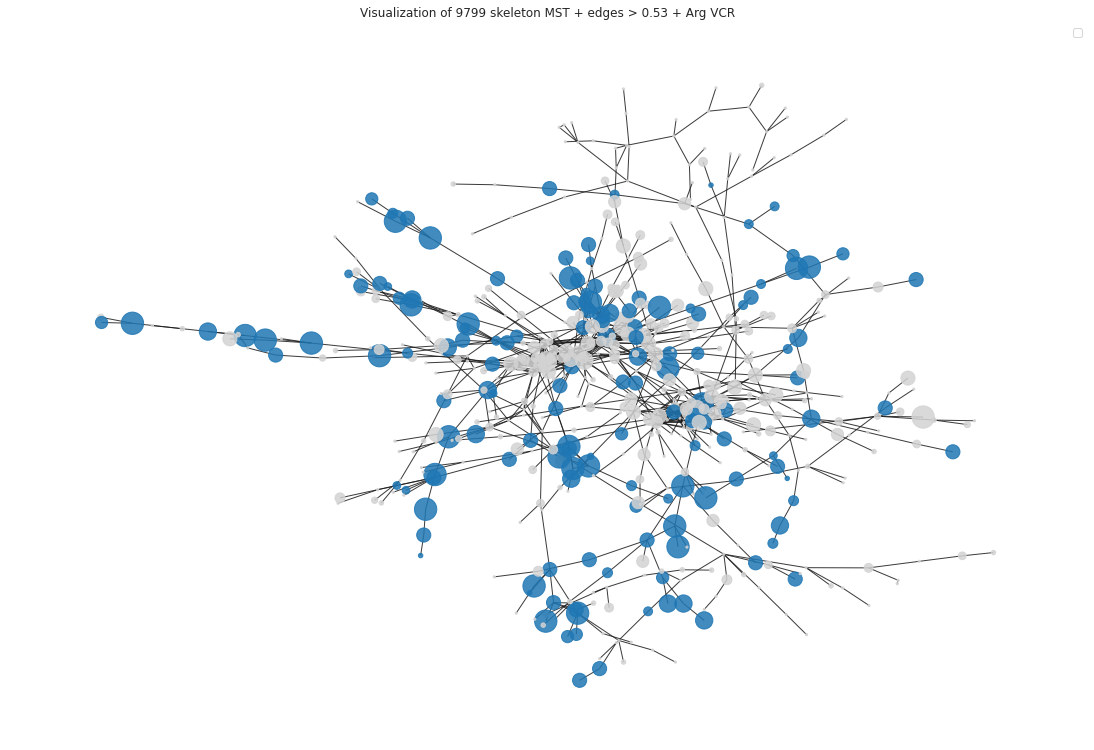

In [161]:
# esqueleto MST + edges > 0.53 layout spring + categories color
skeleton4(list_periods=list_years1, edge_df=edge_df_bio, expo_df=expo_arg, dict_nodes=dict_prodarg_vcr, label=False, threshold=0.53)

In [162]:
def skeleton4bis(list_periods=list, edge_df=pd.DataFrame,expo_df=pd.DataFrame,  dict_nodes=list, label:str=False, threshold:float=0.55):
    for i in list_periods: 
        g = nx.from_pandas_edgelist(edge_df[edge_df.years==i], source="Pi", target="Pj", edge_attr=["prox"])
        mst = nx.maximum_spanning_tree(g, weight='prox') #Maximum Spanning Tree
        #-Build Maximum Spanning Tree + Keep Edges > 0.50-# 
        ps = nx.Graph()
        #Add MST ('weight' attribute only)
        for u,v,w in mst.edges(data=True):
            ps.add_edge(u,v,prox=w["prox"]) 
        #Add Edges > 0.55 
        for u,v,w in g.edges(data=True):
            if w['prox'] >= threshold:
                ps.add_edge(u,v,prox=w["prox"])
        
        list_nodes = dict_nodes[i]
        color_map = []
        
        for node in list(ps.nodes):
            if node in map(str, list_nodes):
                color_map.append('tab:blue')
            else: 
                color_map.append('lightgrey') 

        # draw graph
        fig = plt.figure(figsize=(15,10))
        pos = nx.spring_layout(ps, weight='prox', seed=99)
        nx.draw(ps, pos=pos, with_labels=label, node_color=color_map, node_size=50, alpha=0.85)
        # # make empty plot with correct color and label for each group
        # for v in set(color_map):
        #     plt.scatter([],[], c=v, label=['arg_vcr', 'other'])
        plt.legend(scatterpoints = 1)
        plt.title(f"Visualization of {i} skeleton MST + edges > {threshold} + Arg VCR")
        plt.tight_layout()  



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_732/1395607955.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


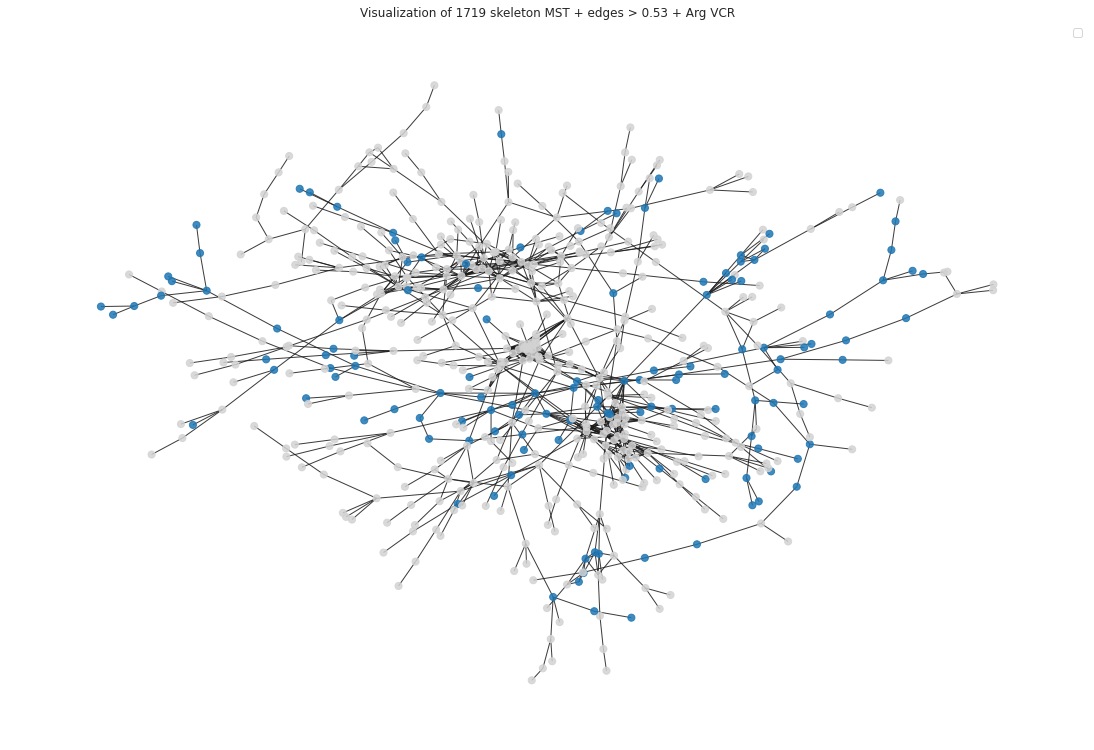

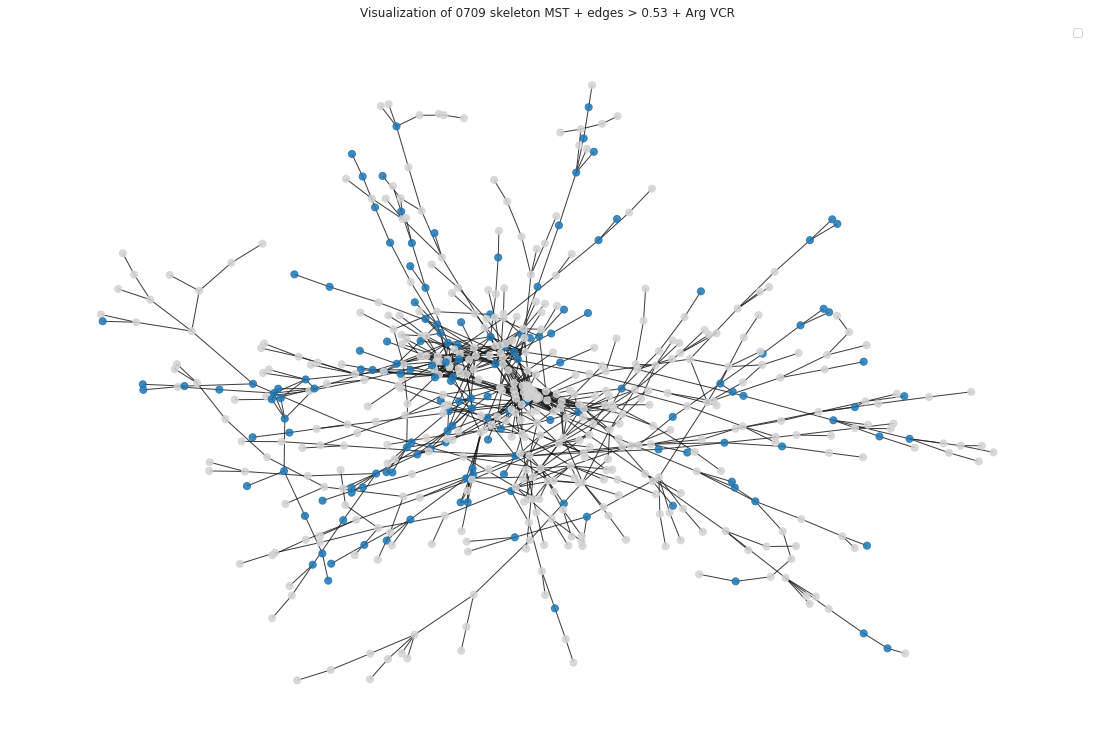

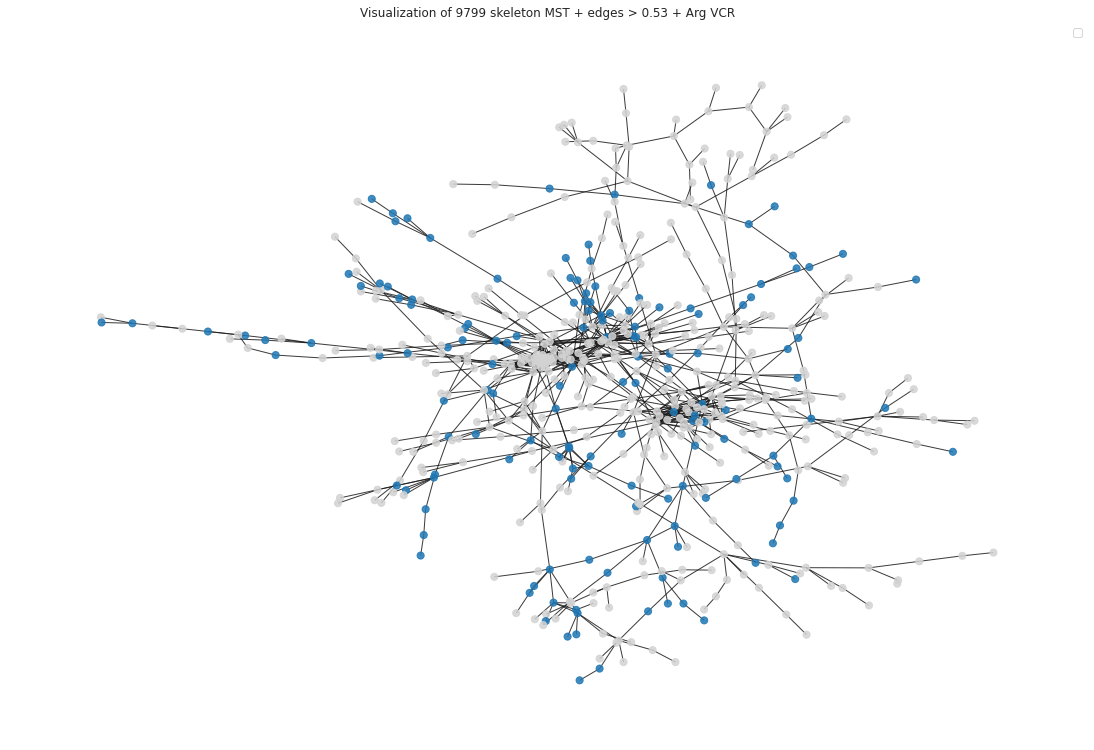

In [163]:
skeleton4bis(list_periods=list_years1, edge_df=edge_df_bio, expo_df=expo_arg, dict_nodes=dict_prodarg_vcr, label=False, threshold=0.53)

Tal como en el paper original, para incluir todos los productos en la red se generó un "esqueleto" de la red, llamado Árbol de Expansión Máximo (MST). Esto no es más que el árbol que contiene la suma de pesos que es máxima. En otras palabras, es el conjunto de N-1 enlaces (siendo N el número de nodos) que conectan todos los nodos de la red y maximiza la suma de las proximidades en ella. 
Se generó el MST excluyendo aquellos valores de proximidad de la diagonal principal de la matriz de proximidad y se incluyó el enlace más fuerte conectado a esa díada. Luego se seleccionó el enlace más fuerte que conecta un nuevo nodo a la tríada y se continuó agregando enlaces hasta que se consideraron todos los nodos en la red. 
También se agregaron los enlaces más fuertes que no están necesariamente en el MST. Para ello, se calculó el MST y se le agregaron todos los enlaces por encima de cierto umbral. 
Se obtuvo una visualización adecuada manteniendo todos los enlaces con un valor de proximidad de 0,53 o mayor. Esto resultó en una red con 584 nodos y aprox. 1100 enlaces (más o menos según el período considerado).
Según el paper como regla general, se puede lograr una buena visualización de la red con un grado promedio igual a 4. Esto es cuando el número de enlaces es el doble que el de los nodos, que en nuestro caso es con un umbral de 0,53 para los productos de la bioeconomía.

**Diseño de la red**. Una buena visualización de la red requiere un diseño adecuado. Por eso se tuvieron en cuenta las consideraciones del paper original. Se diseñó la red utilizando un algoritmo dirigido por fuerza de Fruchterman-Reingold (llamado "diseño de resorte" o spring_layout en NetworkX), donde el diseño de los nodos y los bordes se determina automáticamente, realizando una simulación pseudofísica de los movimientos de los nodos, asumiendo que cada borde es un resorte con una distancia de equilibrio fija. Este algoritmo tiende a acercar entre sí grupos de nodos bien conectados, lo que hace que el resultado de la visualización sea más significativo y estéticamente más prolijo. 
source de la explicación del spring layout https://math.libretexts.org/Bookshelves/Scientific_Computing_Simulations_and_Modeling/Book%3A_Introduction_to_the_Modeling_and_Analysis_of_Complex_Systems_(Sayama)/15%3A_Basics_of_Networks/15.04%3A_Visualizing_Networks_with_NetworkX#:~:text=By%20default%2C%20the%20layout%20of,with%20a%20fixed%20equilibrium%20distance.

Una ventaja de usar una representación de red es que podemos mirar simultáneamente la estructura del espacio y otras covariables. En nuestro caso, pintamos la red utilizando las clasificaciones de productos realizadas por Leamer[1] e hicimos que el tamaño de los nodos fuera proporcional al dinero movido por esa industria en particular o World Trade. Para dar una idea de la proximidad de los enlaces involucrados en nuestra representación de red, los codificamos por colores usando rojo oscuro y azul para enlaces fuertes; y amarillo y azul claro para los más débiles.


In [166]:
def MaxSpanTree(list_periods=list, edge_df=pd.DataFrame, threshold:float=0.55):
    dict_mst = {}
    for i in list_periods: 
        g = nx.from_pandas_edgelist(edge_df[edge_df.years==i], source="Pi", target="Pj", edge_attr=["prox"])
        mst = nx.maximum_spanning_tree(g, weight='prox') #Maximum Spanning Tree
        #-Build Maximum Spanning Tree + Keep Edges > 0.50-# 
        ps = nx.Graph()
        #Add MST ('weight' attribute only)
        for u,v,w in mst.edges(data=True):
            ps.add_edge(u,v,prox=w["prox"]) 
        #Add Edges > 0.55 
        for u,v,w in g.edges(data=True):
            if w['prox'] >= threshold:
                ps.add_edge(u,v,prox=w["prox"]) 
        print(f"# of Nodes {i}: {ps.number_of_nodes()}")
        print(f"# of Edges {i}: {ps.number_of_edges()}")
        
        dict_mst[f'{i}'] = ps

    return dict_mst


def Plot_MaxSpanTree(save:bool=False, labels:bool=True, list_periods=list, prox_matrix=dict, dict_mst=dict, category=pd.DataFrame, prod:str='bio'):

    for i in list_periods:
        ps = dict_mst[i]
        expo_bins = list(prox_matrix[i][f'prom_{i}'])
        # Manually set each nodes size according to value of exports in Million USD
        lst = list(prox_matrix[i][f'prom_{i}'])
        d = {x: i for i, x in enumerate(['0-0.33M', '0.33-0.66M', '0.66-1M', '1-2M','2-4M', '4-6M', '6-10M', '10-16M', '16-20M', '+20M'])}
        lst_new = [d[x] for x in lst]
        node_sizes = [5, 20, 40, 60, 80, 100, 150, 200, 300, 500]
        list_node_size = [node_sizes[x] for x in lst_new]
        # set node colors according to product category
        category_attr = list(prox_matrix[i].Category)
        # set nodes attributes
        nx.set_node_attributes(ps, category_attr, "category")
        values = prox_matrix[i].Category
        # compute maximum value s.t. all colors can be normalised
        maxval = np.max(values) 
        # get colormap
        cmap=plt.cm.tab10
        # set edges colors according to the proximity level
        get_attr = nx.get_edge_attributes(dict_mst[i], name='prox')
        attr = []
        for e in dict_mst[i].edges():
            attr.append(get_attr[e])
        # dark red and blue for strong links; and yellow and light blue for weaker ones. 
        edge_colors = np.where(np.array(attr) > 0.65, 
                               'red', 
                                np.where(np.array(attr) > 0.55, 
                                        'blue', 
                                        np.where(np.array(attr) > 0.4, 
                                                'lightgrey',
                                                'lightblue' 
                                                )
                                        )
                                )
        # draw graph
        fig = plt.figure(figsize=(15,10))
        pos = nx.spring_layout(ps, weight='prox', seed=99)
        nx.draw(ps, pos=pos, with_labels=labels, node_size=list_node_size, 
                node_color=[cmap(v/maxval) for v in values], edge_color=edge_colors, alpha=0.85)
        # # make empty plot with correct color and label for each group
        for v in set(values):
            plt.scatter([],[], c=[cmap(v/maxval)], label=category.Desc_Categ_short[v])
        plt.legend()
        plt.title(f"Visualization of Maximum Spanning Tree {i}")
        plt.tight_layout()

        if save:
            folder = os.path.abspath('.').replace('notebooks','figures')
            if labels == True:
                if prod == 'bio':
                    file_path = os.path.join(folder, f'MaxSpanTree_{i}_withlabels_bioecon.png')
                else:
                    file_path = os.path.join(folder, f'MaxSpanTree_{i}_withlabels.png')
            else:
                if prod == 'bio':
                    file_path = os.path.join(folder, f'MaxSpanTree_{i}_nolabels_bioecon.png')
                else: 
                    file_path = os.path.join(folder, f'MaxSpanTree_{i}_nolabels.png')
            plt.savefig(file_path)
            plt.close()
            print(f'{file_path} guardado exitosamente.')
        else:
            plt.show()

In [ ]:
list_years1 = ['1719', '0709', '9799']
dict_mst_bio = MaxSpanTree(list_periods=list_years1, edge_df=edge_df_bio, threshold=0.53)

# of Nodes 1719: 584
# of Edges 1719: 1024
# of Nodes 0709: 584
# of Edges 0709: 1087
# of Nodes 9799: 584
# of Edges 9799: 1119


Para ofrecer una visualización en la que se incluyen todos los productos de la bioeconomía (584), se calculó el árbol de expansión máximo, que incluye los 583 enlaces que maximizan la proximidad añadida del árbol y se los superpone con todos los enlaces con una proximidad superior a 0,55 (tal como el paper). Este conjunto de entre 1100 y 1200 enlaces según el período, se utiliza para visualizar la estructura de la matriz de proximidad completa, que está lejos de ser homogénea y parece tener una estructura de centro-periferia. 

In [ ]:
Plot_MaxSpanTree(save=True, labels=False, list_periods=list_years1, prox_matrix=prox_matrix1_bio, dict_mst=dict_mst_bio, category=categ, prod='bio')

/tmp/ipykernel_11259/445520217.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/MaxSpanTree_1719_nolabels_bioecon.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/MaxSpanTree_0709_nolabels_bioecon.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/MaxSpanTree_9799_nolabels_bioecon.png guardado exitosamente.


## Todos los Productos

In [87]:
# creo un dataframe con los nodos de entrada, salida y pesos por cada periodo
edge_df_tot = pd.DataFrame()
for i in list_years1:
    df = prox_matrix1[i]
    df = df.drop(columns=['Category', f'prom_{i}'])
    df = df.set_index(df.index.astype(str))
    edge_list = df.unstack()
    # elimino los llamados a si mismo para obtener solo nodos i y j 
    edge_list = edge_list[edge_list != 1.0] 
    edge_list = edge_list.reset_index()
    edge_list.columns = ["Pi","Pj","prox"]
    # agrego una columna de año para saber de que periodo se trata
    edge_list['years'] = np.repeat(str(i), len(edge_list))
    edge_df_tot = edge_df_tot.append(edge_list)    

In [18]:
edge_df_tot

Pi    Pj      prox years
0         101   102  0.250000  1719
1         101   103  0.277778  1719
2         101   104  0.142857  1719
3         101   105  0.266667  1719
4         101   106  0.228571  1719
...       ...   ...       ...   ...
1479867  9706  9701  0.375000  9799
1479868  9706  9702  0.300000  9799
1479869  9706  9703  0.166667  9799
1479870  9706  9704  0.187500  9799
1479871  9706  9705  0.166667  9799

[4439616 rows x 4 columns]

In [19]:
edge_df_tot[edge_df_tot.years=='1719'].max()

Pi           9706
Pj           9706
prox     0.857143
years        1719
dtype: object

In [20]:
len(edge_df_tot[edge_df_tot.years=='1719'].Pj.unique())

1217

In [88]:
list_years1 = ['1719', '0709', '9799']
dict_mst = MaxSpanTree(list_periods=list_years1, edge_df=edge_df_tot)

# of Nodes 1719: 1217
# of Edges 1719: 2436
# of Nodes 0709: 1217
# of Edges 0709: 2524
# of Nodes 9799: 1217
# of Edges 9799: 2406


Para ofrecer una visualización en la que se incluyen todos los productos (1217), se calculó el árbol de expansión máximo, que incluye los 1216 enlaces que maximizan la proximidad añadida del árbol y se los superpone con todos los enlaces con una proximidad superior a 0,55 (tal como el paper). Este conjunto de entre 3000 y 3200 enlaces según el período, se utiliza para visualizar la estructura de la matriz de proximidad completa, que está lejos de ser homogénea y parece tener una estructura de centro-periferia. 

In [101]:
Plot_MaxSpanTree(save=True, labels=False, list_periods=list_years1, prox_matrix=prox_matrix1, dict_mst=dict_mst, category=categ, prod='tot')

/tmp/ipykernel_11259/445520217.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/MaxSpanTree_1719_nolabels.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/MaxSpanTree_0709_nolabels.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/MaxSpanTree_9799_nolabels.png guardado exitosamente.


In [227]:
#-Construct the complete network-#
g = nx.from_pandas_edgelist(edge_df_tot[edge_df_tot.years=='1719'], source="Pi", target="Pj", edge_attr=["prox"])
print("# of Nodes: {}".format(g.number_of_nodes()))
print("# of Edges: {}".format(g.number_of_edges()))

# of Nodes: 584
# of Edges: 170236


In [228]:
mst = nx.minimum_spanning_tree(g, weight='inv_prox') #Maximum Spanning Tree
print("# of Nodes: {}".format(mst.number_of_nodes()))
print("# of Edges: {}".format(mst.number_of_edges()))

# of Nodes: 584
# of Edges: 583


Para ofrecer una visualización en la que se incluyen todos los (n) productos, H&K calculan el árbol de expansión máximo, que incluye los (n-1) enlaces que maximizan la proximidad añadida del árbol y superponen todos los enlaces con una proximidad superior a 0,55. Voy a intentar replicar eso.

In [274]:
#-Build Maximum Spanning Tree + Keep Edges > 0.50-#
ps = nx.Graph()
#Add MST ('weight' attribute only)
for u,v,w in mst.edges(data=True):
    ps.add_edge(u,v, attr_dict={'prox' : w["prox"]})
#Add Edges > 0.55 
for u,v,w in g.edges(data=True):
    if w['prox'] >= 0.55:
        ps.add_edge(u,v,attr_dict={'prox' : w["prox"]})

In [100]:
print("# of Nodes: {}".format(ps.number_of_nodes()))
print("# of Edges: {}".format(ps.number_of_edges()))

# of Nodes: 584
# of Edges: 1136


In [102]:
list(nx.connected_components(ps))

[{'1001',
  '1002',
  '1003',
  '1004',
  '1005',
  '1006',
  '1007',
  '1008',
  '101',
  '102',
  '103',
  '104',
  '105',
  '106',
  '1101',
  '1102',
  '1103',
  '1104',
  '1105',
  '1106',
  '1107',
  '1108',
  '1109',
  '1201',
  '1202',
  '1203',
  '1204',
  '1205',
  '1206',
  '1207',
  '1208',
  '1209',
  '1210',
  '1211',
  '1212',
  '1213',
  '1214',
  '1301',
  '1302',
  '1401',
  '1404',
  '1501',
  '1502',
  '1503',
  '1504',
  '1505',
  '1506',
  '1507',
  '1508',
  '1509',
  '1510',
  '1511',
  '1512',
  '1513',
  '1514',
  '1515',
  '1516',
  '1517',
  '1518',
  '1520',
  '1521',
  '1522',
  '1601',
  '1602',
  '1603',
  '1604',
  '1605',
  '1701',
  '1702',
  '1703',
  '1704',
  '1801',
  '1802',
  '1803',
  '1804',
  '1805',
  '1806',
  '1901',
  '1902',
  '1903',
  '1904',
  '1905',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '201',
  '202',
  '203',
  '204',
  '205',
  '206',
  '207',
  '208',
  '209',
  '210',
  '210

In [103]:
nx.clustering(ps)

{'101': 0.003259594584239595,
 '102': 1.0,
 '103': 1.0,
 '104': 0,
 '105': 0.5,
 '106': 0,
 '201': 0.4666666666666667,
 '202': 0.6666666666666666,
 '203': 0.6666666666666666,
 '204': 0,
 '205': 1.0,
 '206': 0.5,
 '207': 1.0,
 '208': 0,
 '209': 0.35714285714285715,
 '210': 0.6666666666666666,
 '301': 0,
 '302': 1.0,
 '303': 0.5333333333333333,
 '304': 0.47619047619047616,
 '305': 1.0,
 '306': 1.0,
 '307': 0.6666666666666666,
 '401': 0.5,
 '402': 0,
 '403': 0.5777777777777777,
 '404': 0.42857142857142855,
 '405': 1.0,
 '406': 0.5238095238095238,
 '407': 1.0,
 '408': 0.5,
 '409': 1.0,
 '410': 0,
 '501': 0,
 '502': 0,
 '504': 1.0,
 '505': 0,
 '506': 1.0,
 '507': 0,
 '508': 0,
 '510': 1.0,
 '511': 1.0,
 '601': 0,
 '602': 0.6666666666666666,
 '603': 0,
 '604': 0,
 '701': 0,
 '702': 1.0,
 '703': 0,
 '704': 0,
 '705': 0,
 '706': 1.0,
 '707': 1.0,
 '708': 0,
 '709': 0.8333333333333334,
 '710': 0.8333333333333334,
 '711': 0,
 '712': 0,
 '713': 0,
 '714': 0,
 '801': 0,
 '802': 0,
 '803': 0,
 '804

In [271]:
nx.get_edge_attributes(ps,'prox')

{}

In [257]:
weights

[0.6470588235294118,
 0.5833333333333334,
 0.55,
 0.6333333333333333,
 0.6,
 0.6666666666666666,
 0.6363636363636364,
 0.5909090909090909,
 0.5909090909090909,
 0.5555555555555556,
 0.6086956521739131,
 0.5714285714285714,
 0.6666666666666666,
 0.6666666666666666,
 0.6153846153846154,
 0.6428571428571429,
 0.5769230769230769,
 0.7142857142857143,
 0.5517241379310345,
 0.5925925925925926,
 0.6190476190476191,
 0.6111111111111112,
 0.6666666666666666,
 0.5555555555555556,
 0.5714285714285714,
 0.6111111111111112,
 0.6153846153846154,
 0.625,
 0.5882352941176471,
 0.7352941176470589,
 0.5625,
 0.5625,
 0.6875,
 0.6176470588235294,
 0.5588235294117647,
 0.5588235294117647,
 0.6176470588235294,
 0.5862068965517241,
 0.625,
 0.6666666666666666,
 0.65625,
 0.59375,
 0.5625,
 0.5882352941176471,
 0.5675675675675675,
 0.6153846153846154,
 0.5555555555555556,
 0.5833333333333334,
 0.5641025641025641,
 0.5833333333333334,
 0.5952380952380952,
 0.6388888888888888,
 0.5555555555555556,
 0.615384615

In [104]:
edge_df_tot.loc[edge_df_tot.years=='1719'][["prox"]]

prox
0       0.250000
1       0.277778
2       0.142857
3       0.266667
4       0.228571
...          ...
340467  0.045455
340468  0.300000
340469  0.166667
340470  0.120000
340471  0.190476

[340472 rows x 1 columns]

In [20]:
# pruebas con 1719 para luego escalar a todos los restantes datasets
edge_list_1719 = prox_matrix1['1719'].unstack()
edge_list_1719

      product_i
101   101          1.000000
      102          0.250000
      103          0.277778
      104          0.142857
      105          0.266667
                     ...   
9706  9702         0.363636
      9703         0.538462
      9704         0.142857
      9705         0.583333
      9706         1.000000
Length: 1481089, dtype: float64

In [21]:
edge_list_1719 = edge_list_1719[edge_list_1719 != 1.0] # elimino los llamados a si mismo para obtener solo nodos i y j  
edge_list_1719 = edge_list_1719.reset_index()
edge_list_1719.columns = ["Pi","Pj","prox"]
edge_list_1719

Pi    Pj      prox
0         101   102  0.250000
1         101   103  0.277778
2         101   104  0.142857
3         101   105  0.266667
4         101   106  0.228571
...       ...   ...       ...
1479867  9706  9701  0.545455
1479868  9706  9702  0.363636
1479869  9706  9703  0.538462
1479870  9706  9704  0.142857
1479871  9706  9705  0.583333

[1479872 rows x 3 columns]

In [22]:
edge_list_1719['year'] = np.repeat('1719', len(edge_list_1719)) 
edge_list_1719

Pi    Pj      prox  year
0         101   102  0.250000  1719
1         101   103  0.277778  1719
2         101   104  0.142857  1719
3         101   105  0.266667  1719
4         101   106  0.228571  1719
...       ...   ...       ...   ...
1479867  9706  9701  0.545455  1719
1479868  9706  9702  0.363636  1719
1479869  9706  9703  0.538462  1719
1479870  9706  9704  0.142857  1719
1479871  9706  9705  0.583333  1719

[1479872 rows x 4 columns]

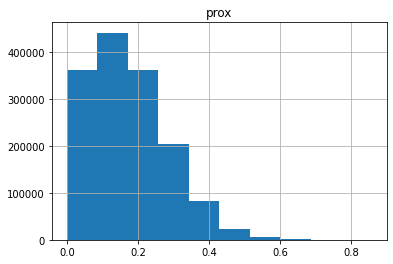

In [23]:
edge_list_1719[["prox"]].hist(); # como se distribuye nuestra medida de proximidad
# esto ya lo hice para todos en el notebook Visualización de matrices de proximidad, solo para chequear 

In [24]:
# cantidad de valores = 0 
sum(i == 0.0 for i in edge_list_1719[["prox"]].unstack()) / sum(i < 1.0 for i in edge_list_1719[["prox"]].unstack())* 100 

8.293960558751028

In [25]:
# cantidad de valores menores a 0.1
sum(i < 0.1 for i in edge_list_1719[["prox"]].unstack()) / sum(i < 1.0 for i in edge_list_1719[["prox"]].unstack())* 100 

28.005665354841504

In [26]:
# cantidad de valores menores a 0.2
sum(i < 0.2 for i in edge_list_1719[["prox"]].unstack()) / sum(i < 1.0 for i in edge_list_1719[["prox"]].unstack())* 100 

61.73385265752713

In [27]:
# número máximo de links
max_links = (prox_matrix1['1719'].shape[0]*prox_matrix1['1719'].shape[0]-prox_matrix1['1719'].shape[0])//2 
max_links

739936

**numpy.tril_indices(n, k=0, m=None)**

Devuelve los índices del triángulo inferior de una matriz (n, m). Por lo que, para los cálculos sólo se toman los valores del triángulo inferior. 

[source](https://numpy.org/doc/stable/reference/generated/numpy.tril_indices.html)

In [28]:
# pruebo con un ejemplo para luego escalar
X = prox_matrix1['1719']

In [29]:
X

101       102       103       104       105       106  \
product_i                                                               
101        1.000000  0.250000  0.277778  0.142857  0.266667  0.228571   
102        0.250000  1.000000  0.416667  0.361111  0.444444  0.388889   
103        0.277778  0.416667  1.000000  0.190476  0.300000  0.285714   
104        0.142857  0.361111  0.190476  1.000000  0.433333  0.285714   
105        0.266667  0.444444  0.300000  0.433333  1.000000  0.485714   
...             ...       ...       ...       ...       ...       ...   
9702       0.294118  0.027778  0.055556  0.000000  0.066667  0.057143   
9703       0.235294  0.083333  0.000000  0.095238  0.166667  0.142857   
9704       0.470588  0.166667  0.222222  0.047619  0.133333  0.085714   
9705       0.352941  0.111111  0.055556  0.142857  0.300000  0.171429   
9706       0.235294  0.083333  0.055556  0.142857  0.166667  0.114286   

                201       202       203       204  ...      9615      9616  \
product_i                                          ...                       
101        0.454545  0.352941  0.294118  0.352941  ...  0.058824  0.058824   
102        0.444444  0.194444  0.222222  0.250000  ...  0.027778  0.083333   
103        0.409091  0.055556  0.388889  0.166667  ...  0.000000  0.111111   
104        0.181818  0.095238  0.095238  0.238095  ...  0.000000  0.095238   
105        0.366667  0.166667  0.333333  0.166667  ...  0.033333  0.100000   
...             ...       ...       ...       ...  ...       ...       ...   
9702       0.045455  0.066667  0.076923  0.066667  ...  0.142857  0.000000   
9703       0.136364  0.200000  0.153846  0.066667  ...  0.000000  0.153846   
9704       0.227273  0.200000  0.214286  0.333333  ...  0.000000  0.000000   
9705       0.227273  0.133333  0.307692  0.133333  ...  0.083333  0.083333   
9706       0.136364  0.066667  0.153846  0.066667  ...  0.090909  0.090909   

               9617      9618      9701      9702      9703      9704  \
product_i                                                               
101        0.000000  0.294118  0.294118  0.294118  0.235294  0.470588   
102        0.027778  0.166667  0.055556  0.027778  0.083333  0.166667   
103        0.055556  0.222222  0.000000  0.055556  0.000000  0.222222   
104        0.000000  0.142857  0.047619  0.000000  0.095238  0.047619   
105        0.033333  0.266667  0.100000  0.066667  0.166667  0.133333   
...             ...       ...       ...       ...       ...       ...   
9702       0.000000  0.125000  0.500000  1.000000  0.384615  0.285714   
9703       0.000000  0.187500  0.461538  0.384615  1.000000  0.214286   
9704       0.000000  0.187500  0.142857  0.285714  0.214286  1.000000   
9705       0.000000  0.250000  0.416667  0.333333  0.384615  0.357143   
9706       0.090909  0.187500  0.545455  0.363636  0.538462  0.142857   

               9705      9706  
product_i                      
101        0.352941  0.235294  
102        0.111111  0.083333  
103        0.055556  0.055556  
104        0.142857  0.142857  
105        0.300000  0.166667  
...             ...       ...  
9702       0.333333  0.363636  
9703       0.384615  0.538462  
9704       0.357143  0.142857  
9705       1.000000  0.583333  
9706       0.583333  1.000000  

[1217 rows x 1217 columns]

In [ ]:
# sorted(X.values[np.tril_indices(X.shape[0],-1)]) # paso la matriz a una dimensión -solo la mitad de la matriz, sin repeticiones- y la ordeno 

In [31]:
int(0.1*(X.shape[0]*X.shape[0]-X.shape[0])//2) # para calcular a distintas desidades, el numero de enlaces

73993

In [32]:
# para calcular los umbrales de proximidad según la densidad de aristas definidas -ej. con densidad = 0.1-
sorted(X.values[np.tril_indices(X.shape[0],-1)])[int(0.1*(X.shape[0]*X.shape[0]-X.shape[0])//2)] 

0.04

### Pruebo armar grafos a distintas proximidades

Cabe recordar, que en el paper original utilizan como umbral proximidades mayores a 0.55 para representar.

Para ofrecer una visualización en la que se incluyen todos los productos (en ese caso 775), llegan a todos los nodos calculando el árbol de expansión máxima, que incluye los 774 enlaces maximizando la proximidad agregada del árbol y superpuestos sobre él todos los enlaces con una proximidad mayor a 0.55. Ese conjunto de 1525 enlaces se utiliza para visualizar la estructura de la matriz de proximidad completa, que está lejos de ser homogénea y parece tener una estructura centro-periferia.

In [23]:
def grafos_pordensidad_dict(list_periods=list, edge_df=pd.DataFrame, prox_matrix=dict, category=pd.DataFrame, label:str=False, threshold:float=0.55):
    for i in list_periods: 
        g = nx.from_pandas_edgelist(edge_df[edge_df.years==i], source="Pi", target="Pj", edge_attr=["prox"])
        mst = nx.maximum_spanning_tree(g, weight='prox') #Maximum Spanning Tree
        #-Build Maximum Spanning Tree + Keep Edges > 0.50-# 
        ps = nx.Graph()
        #Add MST ('weight' attribute only)
        for u,v,w in mst.edges(data=True):
            ps.add_edge(u,v,prox=w["prox"]) 
        #Add Edges > 0.55 
        for u,v,w in g.edges(data=True):
            if w['prox'] >= threshold:
                ps.add_edge(u,v,prox=w["prox"])
        
        # set node colors according to product category
        category_attr = list(prox_matrix[i].Category)
        # set nodes attributes
        nx.set_node_attributes(ps, category_attr, "category")
        values = prox_matrix[i].Category
        # compute maximum value s.t. all colors can be normalised
        maxval = np.max(values) 
        # get colormap
        cmap=plt.cm.tab10

        # draw graph
        fig = plt.figure(figsize=(15,10))
        pos = nx.spring_layout(ps, weight='prox', seed=99)
        nx.draw(ps, pos=pos, with_labels=label, node_size=50, node_color=[cmap(v/maxval) for v in values], alpha=0.85)
        # # make empty plot with correct color and label for each group
        for v in set(values):
            plt.scatter([],[], c=[cmap(v/maxval)], label=category.Desc_Categ_short[v])
        plt.legend()
        plt.title(f"Visualization of {i} skeleton MST + edges > {threshold} + color categories")
        plt.tight_layout() 

In [24]:
def grafos_pordensidad_dict(list_periods=list, edge_df=pd.DataFrame, prox_matrix=dict, thresholds=list):
    """
        Toma un dataframe cuadrado (x,x) y una lista de densidades y devuelte
        un diccionario en el que cada densidad es la key y cada value es la
        matriz de adyacencia generada a partir de utilizar la densidad 
        correspondiente como umbral.
        
        Atributos
        ---------
        
        proximity_matrix: pd.DataFrame
            Matriz de proximidades.
            
        densities: list
            Lista de densidades que permitirá generar umbrales para comparar distintos períodos a una mima densidad.
            
        Returns
        -------
        
        Gs: dict
            Diccionario con las densidades como keys y las matrices de 
            adyacencia correspondientes como values.
            
    """
    Gs = dict()
    for i in list_periods:
        Gs[i] = dict()
        for t in thresholds:  
            g = nx.from_pandas_edgelist(edge_df[edge_df.years==i], source="Pi", target="Pj", edge_attr=["prox"])
            mst = nx.maximum_spanning_tree(g, weight='prox') #Maximum Spanning Tree
            #-Build Maximum Spanning Tree + Keep Edges > 0.50-# 
            ps = nx.Graph()
            #Add MST ('weight' attribute only)
            for u,v,w in mst.edges(data=True):
                ps.add_edge(u,v,prox=w["prox"]) 
            #Add Edges > 0.55 
            for u,v,w in g.edges(data=True):
                if w['prox'] >= t:
                    ps.add_edge(u,v,prox=w["prox"])
        
            # guardo en diccionario
            Gs[i][t] = ps 
            
    return Gs

In [25]:
umbrales = [0.1, 0.25, 0.4, 0.53, 0.7, 0.85]
dict_gs = grafos_pordensidad_dict(list_periods=list_years1, edge_df=edge_df_bio, prox_matrix=prox_matrix1_bio, thresholds=umbrales)

In [26]:
dict_gs

{'1719': {0.1: <networkx.classes.graph.Graph at 0x7f62e4b1e580>,
  0.25: <networkx.classes.graph.Graph at 0x7f62e4c11340>,
  0.4: <networkx.classes.graph.Graph at 0x7f62e4c11610>,
  0.53: <networkx.classes.graph.Graph at 0x7f62e4c11130>,
  0.7: <networkx.classes.graph.Graph at 0x7f62e4c11b20>,
  0.85: <networkx.classes.graph.Graph at 0x7f62e4c11160>},
 '0709': {0.1: <networkx.classes.graph.Graph at 0x7f62e4c111c0>,
  0.25: <networkx.classes.graph.Graph at 0x7f62e4c119a0>,
  0.4: <networkx.classes.graph.Graph at 0x7f62e4c114f0>,
  0.53: <networkx.classes.graph.Graph at 0x7f62e4c11760>,
  0.7: <networkx.classes.graph.Graph at 0x7f62e4c11400>,
  0.85: <networkx.classes.graph.Graph at 0x7f62e4c11e50>},
 '9799': {0.1: <networkx.classes.graph.Graph at 0x7f62e4c11ee0>,
  0.25: <networkx.classes.graph.Graph at 0x7f62e4c118e0>,
  0.4: <networkx.classes.graph.Graph at 0x7f62e4c11790>,
  0.53: <networkx.classes.graph.Graph at 0x7f62e4c115b0>,
  0.7: <networkx.classes.graph.Graph at 0x7f62e4c112e0

### <span style="color:steelblue">Dataset 1: </span>: todos los períodos - 109 países

In [27]:
# Guardo el diccionario como pickle para poder usarlo luego sin volver a correr todo
graphs_df1 = open("../data/processed/graphs_df1.pkl", "wb")
pickle.dump(dict_gs, graphs_df1)
graphs_df1.close()

In [28]:
graphs_ = pickle.load(open("../data/processed/graphs_df1.pkl", "rb"))

In [29]:
def plot_heatmaps_dict(graphs_dict:dict, save:bool=False):
    """
        Toma un diccionario que tenga como keys los nombres de los periodos y
        como values, otro diccionario. Este segundo dict tiene como keys las 
        distintas densidades a partir de las cuales se generaron los grafos.
        Ejemplo: { '1719': { 0.1: graph, 0.2: graph, ... } }
        Y genera un heatmap de cada periodo.
        
        Atributos
        ---------
        
        graphs_dict: dict
            Diccionario de grafos.
            
        save: bool, default=False
            Indicador para guardar el gráfico o plotearlo.
            
    """
    ncols = 3
    for year, Gs in graphs_dict.items():
        dmin, dmax = np.min(list(Gs.keys())), np.max(list(Gs.keys()))
        nrows = ceil(len(Gs)/ncols)
        fig, axs = plt.subplots(nrows, ncols, figsize=(20,20))
        fig.suptitle(f'Periodo: {year}', fontsize=24)
        thresholds = list(Gs.keys())
        r,i = 0,0
        while r<nrows  and i < len(thresholds):
            c = 0
            while c < ncols and i<len(thresholds):
                t = thresholds[i]
                sns.heatmap(nx.to_numpy_array(Gs[t]),cbar=False, cmap='tab10', square=True, ax=axs[r,c])
                axs[r,c].set_title('Edge Prox: {:0.2}'.format(t))
                i += 1
                c += 1
            r += 1
        plt.tight_layout()
        plt.subplots_adjust(top=0.98)
        if save:
            folder = os.path.abspath('.').replace('notebooks','figures')
            file_path = os.path.join(folder, 'df1/thresholds/heatmap_{0}_{1:0.2}-{2:0.2}.png'.format(year,dmin,dmax))
            plt.savefig(file_path)
            plt.close()
            print(f'{file_path} guardado exitosamente.')
        else:
            plt.show()

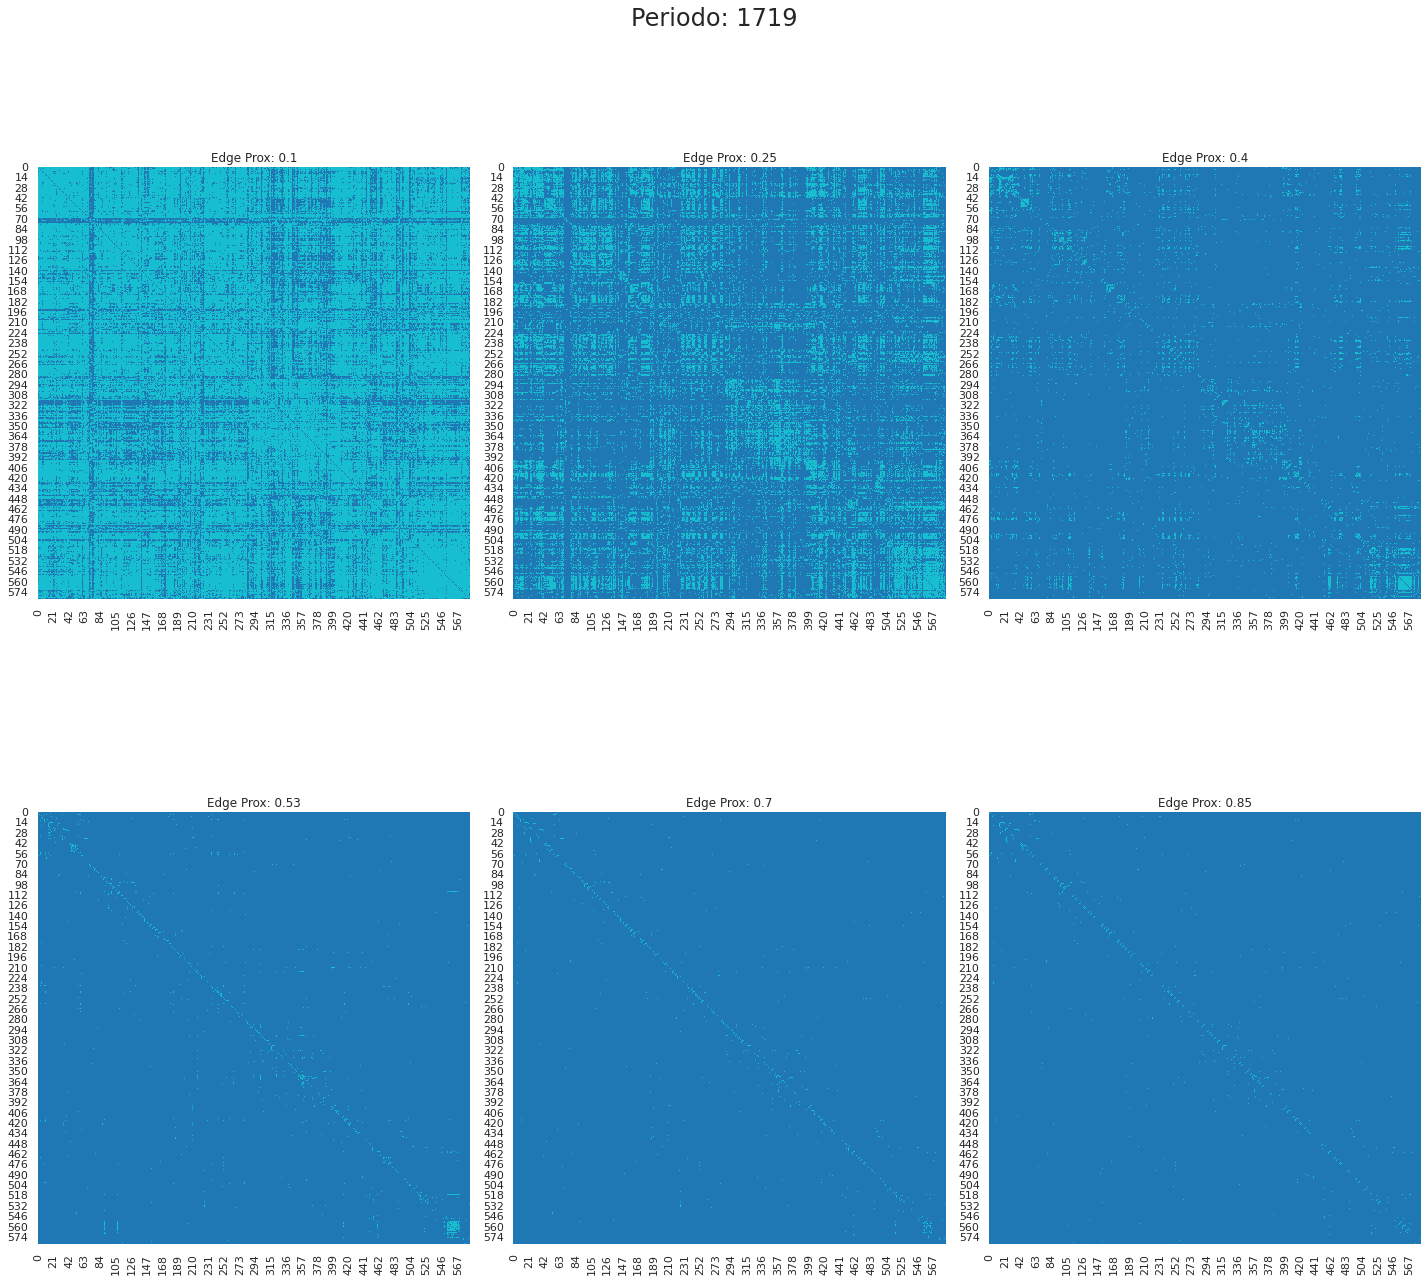

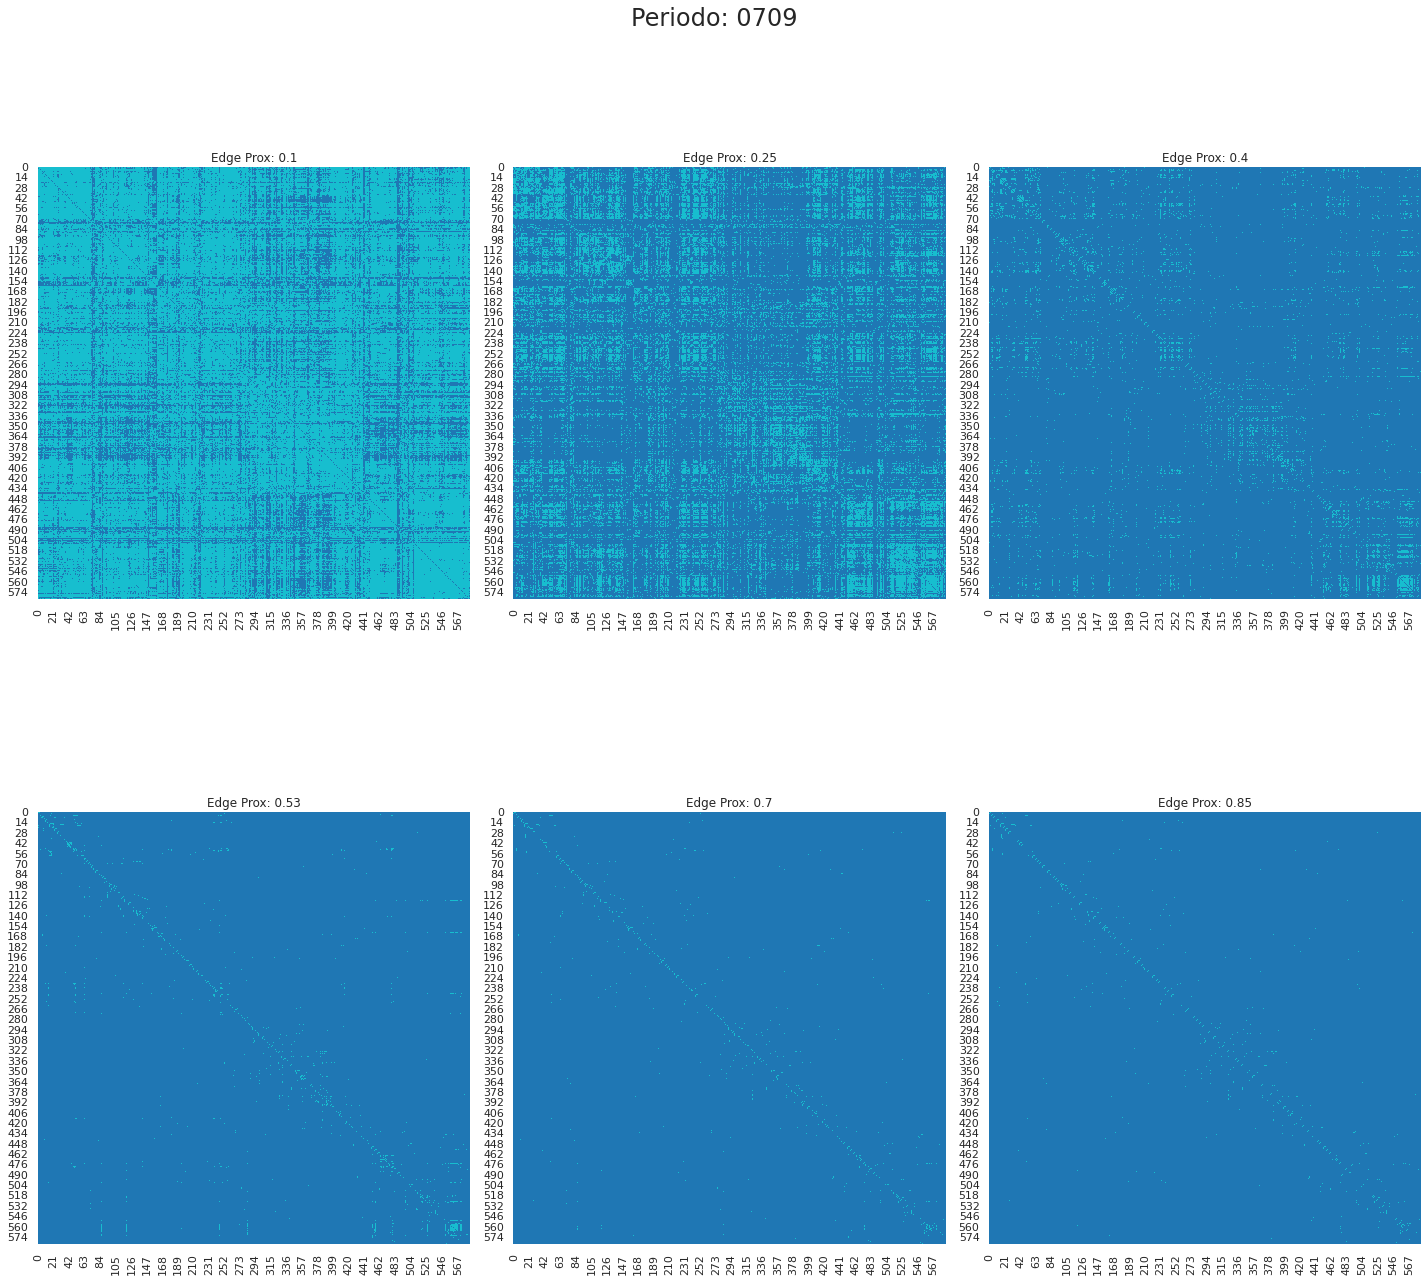

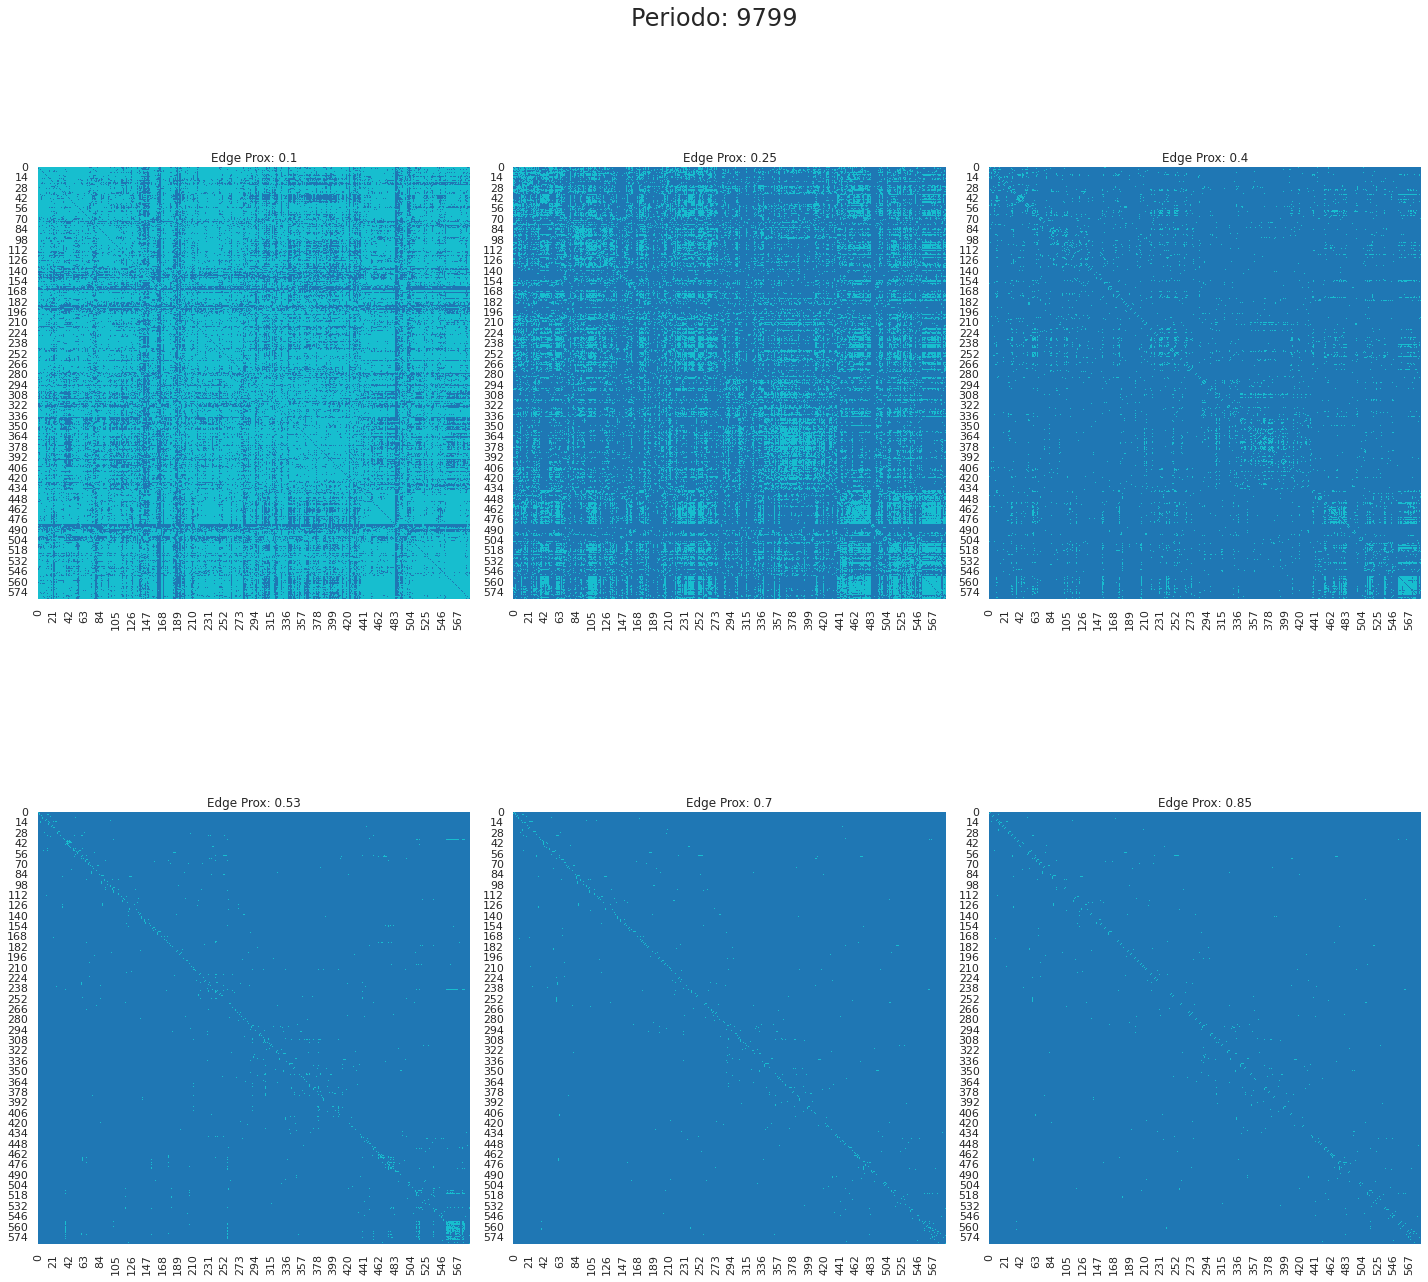

In [96]:
plot_heatmaps_dict(graphs_dict=graphs_)

In [30]:
plot_heatmaps_dict(graphs_, save=True)

/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/df1/thresholds/heatmap_1719_0.1-0.85.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/df1/thresholds/heatmap_0709_0.1-0.85.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/df1/thresholds/heatmap_9799_0.1-0.85.png guardado exitosamente.


In [31]:
def find_shortest_path(graph:nx.Graph):
    """
        Toma un grafo de networkx e intenta calcular el promedio del camino más
        corto.
        Si el grafo no está completamente conectado, calcula todos los
        promedios de caminos más cortos de los subgrafos que sí lo están  y
        devuelve el máximo valor de entre estos promedios.
        
        Atributos
        ---------
        
        graph: nx.Graph
            Grafo de netwrokx.
        
        Returns
        -------
        
        shortest: float
            Promedio de caminos más cortos.
    """
    try:
        shortest = nx.average_shortest_path_length(graph)
    except:
        components_path_length = list()
        for C in (graph.subgraph(c).copy() for c in nx.connected_components(graph)):
            components_path_length.append(nx.average_shortest_path_length(C))
        shortest = np.max(components_path_length)
    return shortest

In [32]:
def calculate_graphs_measures(graphs_dict:dict):
    """
        Toma un diccionario que tenga como keys los nombres de los estadíos y
        como values, otro diccionario. Este segundo dict tiene como keys las
        densidades a partir de las cuales se generaron los grafos.
        Ejemplo: { '1719': { 0.05: graph, 0.1: graph, ... } }
        Y calcula medidas de centralidad, clustering, grado y camino más corto
        promedio para cada estadío y cada densidad.

        Atributos
        ---------
        
        graphs_dict: dict
            Diccionario de grafos.
            
        Returns
        -------
        
        measures: dict
            Diccionario con periodos como keys y dataframes de resumen como
            values.
            
    """
    measures = {}
    for year, Gs in graphs_dict.items():
        # centralidad
        degree_centrality_ = [nx.degree_centrality(G) for G in list(Gs.values())]
        avg_degree_centrality_ = [np.mean(list(i.values())) for i in degree_centrality_]
        betweenness_centrality_ = [nx.betweenness_centrality(G) for G in list(Gs.values())]
        avg_betweenness_centrality_ = [np.mean(list(i.values())) for i in betweenness_centrality_]
        closeness_centrality_ = [nx.closeness_centrality(G) for G in list(Gs.values())]
        avg_closeness_centrality_ = [np.mean(list(i.values())) for i in closeness_centrality_]
        eigenvector_centrality_ = [nx.eigenvector_centrality(G, max_iter=1000) for G in list(Gs.values())]
        avg_eigenvector_centrality_ = [np.mean(list(i.values())) for i in eigenvector_centrality_]
        # grado promedio
        max_degree_ = [np.max(list(dict(G.degree()).values())) for G in list(Gs.values())]
        # camino mínimo
        avg_shortest_path_length_ = [find_shortest_path(G) for G in list(Gs.values())]
        # ceficiente de clustering
        avg_clustering_ = [nx.average_clustering(G) for G in list(Gs.values())]
        df = pd.DataFrame({'d':list(Gs.keys()),
                           'avg_degree_centrality':avg_degree_centrality_,
                           'avg_betweenness_centrality':avg_betweenness_centrality_,
                           'avg_closeness_centrality_':avg_closeness_centrality_,
                           'max_degree':max_degree_,
                           'avg_shortest_path':avg_shortest_path_length_,
                           'avg_clustering':avg_clustering_})
        measures[year] = df
    return measures

In [33]:
measures = calculate_graphs_measures(graphs_)
measures

{'1719':       d  avg_degree_centrality  avg_betweenness_centrality  \
 0  0.10               0.724582                    0.000473   
 1  0.25               0.239332                    0.001414   
 2  0.40               0.037037                    0.003721   
 3  0.53               0.006015                    0.013630   
 4  0.70               0.003530                    0.029019   
 5  0.85               0.003425                    0.029412   
 
    avg_closeness_centrality_  max_degree  avg_shortest_path  avg_clustering  
 0                   0.794018         561           1.275418        0.805510  
 1                   0.553604         306           1.823163        0.520410  
 2                   0.323933          97           3.165641        0.337042  
 3                   0.116182          27           8.932876        0.133800  
 4                   0.057767          10          17.889148        0.013425  
 5                   0.057058           8          18.117719        0.00000

In [34]:
# Guardo el diccionario como pickle para poder usarlo luego sin volver a correr todo
measures_df1 = open("../data/processed/measures_df1.pkl", "wb")
pickle.dump(measures, measures_df1)
measures_df1.close()

In [35]:
# función para graficar una comparación de las distintas medidas de centralidad de los grafos según periodo
def plot_measures(measures_dict:dict, save:bool=False):
    """
        Toma un diccionario con periodos como keys y dataframes con medidas de centralidad como
        values y genera los gráficos para visualizar dichas medidas.
        
        Atributos
        ---------
        
        measures_dict: dict
            Diccionario con dataframes.
            
        save: bool, default=False
            Indicador para guardar el gráfico o plotearlo.
            
    """
    fig = plt.figure(figsize=(20,10))
    measures_list = list(list(measures_dict.values())[0].columns.drop('d'))
    dmin, dmax = np.min(list(measures_dict.values())[0].d), np.max(list(measures_dict.values())[0].d)
    i=1
    for measure in measures_list:
        plt.subplot(2,3,i)
        for year, df in measures_dict.items():
            plt.plot(df.d, df[measure], label=year)
            measure_plot = measure.replace('_',' ')
            plt.title(measure_plot.title())
            plt.xlabel('Edges density')
            plt.ylabel(measure_plot.upper())
            plt.legend()
        i+=1
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    if save:
        folder = os.path.abspath('.').replace('notebooks','figures')
        file_path = os.path.join(folder, 'df1/thresholds/measures_{0:0.2}-{1:0.2}.png'.format(dmin,dmax))
        plt.savefig(file_path)
        plt.close()
        print(f'{file_path} guardado exitosamente.')
    else:
        plt.show()

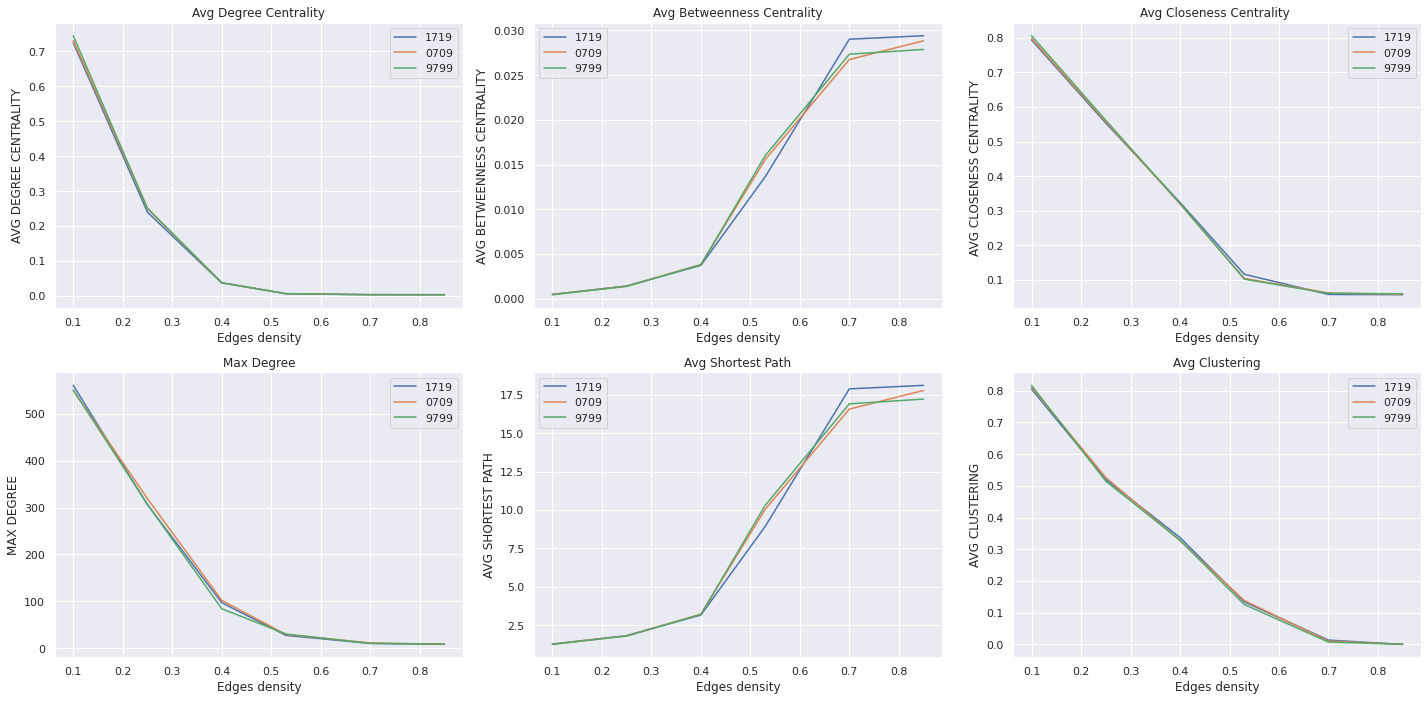

In [38]:
sns.set_theme(style="darkgrid")
plot_measures(measures, save=False)

In [39]:
plot_measures(measures, save=True)

/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/df1/thresholds/measures_0.1-0.85.png guardado exitosamente.


In [40]:
# función para plotear los grafos según densidad para los distintos períodos
def plot_graphs_by_density(graphs_dict:dict, list_years:list, prox_matrix=dict, category=pd.DataFrame, label:str=False, save:bool=False):
    """
        Toma un diccionario que tenga como keys los nombres de los periodos y
        como values, otro diccionario. Este segundo dict tiene como keys las
        densidades a partir de las cuales se generaron los grafos.
        Ejemplo: { '1719': { 0.1: graph, 0.2: graph, ... } }
        Y grafica cada grafo por densidad comparando los periodos.

        Atributos
        ---------
        
        graphs_dict: dict
            Diccionario de grafos.
        
        list_years: list
            Lista con los periodos a comparar
        
        save: bool, default=False
            Indicador para guardar el gráfico o plotearlo.
            
        Returns
        ---------
        Plots de grafos por densidad comparando distintos periodos para una misma densidad
            
    """
    thresholds = list(list(graphs_dict.values())[0].keys())
    ncols = 2
    nrows = 2
    colors = sns.color_palette("viridis")
    color_map = dict(zip(list(graphs_dict.keys()), colors))

    for t in thresholds:
        fig = plt.figure(figsize=(20,15))
        fig.suptitle('Densidad: {:0.3} - Grafo con layout Spring'.format(t), fontsize=20)
        i = 1
        for year in list_years:
            G = graphs_dict[year][t]
            plt.subplot(nrows, ncols, i)
            
            # set node colors according to product category
            category_attr = list(prox_matrix[year].Category)
            # set nodes attributes
            nx.set_node_attributes(G, category_attr, "category")
            values = prox_matrix[year].Category
            # compute maximum value s.t. all colors can be normalised
            maxval = np.max(values) 
            # get colormap
            cmap=plt.cm.tab10

            # draw graph
            pos = nx.spring_layout(G, weight='prox', seed=99)
            nx.draw(G, pos=pos, with_labels=label, node_size=50, node_color=[cmap(v/maxval) for v in values], alpha=0.85)
            # # make empty plot with correct color and label for each group
            for v in set(values):
                plt.scatter([],[], c=[cmap(v/maxval)], label=category.Desc_Categ_short[v])
            plt.legend()
            # plt.title(f"Visualization of {year} skeleton MST + edges > {t} + color categories")
            plt.title(f'Periodo: {year}')
            i+=1
        plt.tight_layout()
        plt.subplots_adjust(top=0.95)
        if save:
            folder = os.path.abspath('.').replace('notebooks','figures')
            file_path = os.path.join(folder, 'df1/thresholds/graph_by_density_{:0.2}.png'.format(t))
            plt.savefig(file_path)
            plt.close()
            print(f'{file_path} guardado exitosamente.')
        else:
            plt.show()

In [ ]:
plot_graphs_by_density(graphs_dict=graphs_, list_years=list_years1, prox_matrix=prox_matrix1_bio, category=categ, label=False, save=False)

In [42]:
sns.set_style("white")
plot_graphs_by_density(graphs_dict=graphs_, list_years=list_years1, prox_matrix=prox_matrix1_bio, category=categ, label=False, save=True)

/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/df1/thresholds/graph_by_density_0.1.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/df1/thresholds/graph_by_density_0.25.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/df1/thresholds/graph_by_density_0.4.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/df1/thresholds/graph_by_density_0.53.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/df1/thresholds/graph_by_density_0.7.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/df1/thresholds/graph_by_density_0.85.png guardado exitosamente.


In [43]:
def plot_graphs_by_period(graphs_dict:dict, list_years:list, prox_matrix=dict, category=pd.DataFrame, label:str=False, save:bool=False):
    """
        Toma un diccionario que tenga como keys los nombres de los periodos y
        como values, otro diccionario. Este segundo dict tiene como keys las densidades 
        a partir de las cuales se generaron los grafos.
        
        Y grafica cada grafo por periodo comparando las distintas densidades.
        
        Atributos
        ---------
        graphs_dict: dict
            Diccionario de grafos.
            
        save: bool, default=False
            Indicador para guardar el gráfico o plotearlo.
            
        Returns
        ---------
        Plots de grafos por periodo comparando distintas densidades para un mismo periodo
            
    """
    n_densities = len(list(graphs_dict.values())[0])
    ncol = 2
    nrow = ceil(n_densities/ncol)

    for year, Gs in graphs_dict.items():
        fig = plt.figure(figsize=(20,30))
        fig.suptitle(f'Periodo: {year} - Grafo con layout Spring', fontsize=20)
        i = 1
        for d, G in Gs.items():
            plt.subplot(nrow,ncol,i)
            # set node colors according to product category
            category_attr = list(prox_matrix[year].Category)
            # set nodes attributes
            nx.set_node_attributes(G, category_attr, "category")
            values = prox_matrix[year].Category
            # compute maximum value s.t. all colors can be normalised
            maxval = np.max(values) 
            # get colormap
            cmap=plt.cm.tab10

            # draw graph
            pos = nx.spring_layout(G, weight='prox', seed=99)
            nx.draw(G, pos=pos, with_labels=label, node_size=50, node_color=[cmap(v/maxval) for v in values], alpha=0.85)
            # # make empty plot with correct color and label for each group
            for v in set(values):
                plt.scatter([],[], c=[cmap(v/maxval)], label=category.Desc_Categ_short[v])
            plt.legend()
            plt.title('Prox. threshold: {:0.2}'.format(d))
            i += 1
        plt.tight_layout()
        plt.subplots_adjust(top=0.95)
        if save:
            folder = os.path.abspath('.').replace('notebooks','figures')
            file_path = os.path.join(folder, f'df1/thresholds/graph_by_stage_{year}.png')
            plt.savefig(file_path)
            plt.close()
            print(f'{file_path} guardado exitosamente.')
        else:
            plt.show()

In [ ]:
plot_graphs_by_period(graphs_dict=graphs_, list_years=list_years1, prox_matrix=prox_matrix1_bio, category=categ, label=False, save=False)

In [44]:
plot_graphs_by_period(graphs_dict=graphs_, list_years=list_years1, prox_matrix=prox_matrix1_bio, category=categ, label=False, save=True)

/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/df1/thresholds/graph_by_stage_1719.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/df1/thresholds/graph_by_stage_0709.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/df1/thresholds/graph_by_stage_9799.png guardado exitosamente.


In [45]:
def generate_random_graphs(graphs_dict:dict):
    """
        Toma un diccionario que tenga como keys los nombres de los periodos y
        como values, otro diccionario. Este segundo dict tiene como keys las
        densidades a partir de las cuales se generaron los grafos.
        Y genera un diccionario con las mismas características pero en el cual
        los grafos son aleatorios y preservan la misma distribución de nodos y
        aristas.

        Atributos
        ---------
        
        graphs_dict: dict
            Diccionario de grafos.

        Returns
        -------

        random_graphs: dict
            Diccionario de grafos aleatorios.
    """
    random_graphs = dict()
    for year, Gs_dict in graphs_dict.items():
        densities = list(Gs_dict.keys())
        random_graphs[year] = {d: nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges(), seed = densities.index(d)) for d, G in Gs_dict.items()}
    return random_graphs

In [46]:
random_graphs = generate_random_graphs(graphs_)

In [47]:
# Guardo el diccionario como pickle para poder usarlo luego sin volver a correr todo
random_graphs_df1 = open("../data/processed/random_graphs_df1.pkl", "wb")
pickle.dump(random_graphs, random_graphs_df1)
random_graphs_df1.close()

In [5]:
random_graphs = pickle.load(open("../data/processed/random_graphs_df1.pkl", "rb"))

In [48]:
def plot_distribution_comparisson(original_graphs, random_graphs, save:bool=False):
    """
        Toma dos diccionarios que tenga como keys los nombres de los periodos y
        como values, otro diccionarios. Este segundo dict tiene como keys las
        densidades a partir de las cuales se generaron los grafos.
        
        Genera gráficos comparando las distribuciones de ambos grafos (original vs random)
        a distintos niveles de densidad de aristas para cada periodo.

        Atributos
        ---------
        
        graphs_dict: dict
            Diccionario de grafos.

        Returns
        -------

        random_graphs: dict
            Diccionario de grafos aleatorios.
    """
    for year, Gs_dict in original_graphs.items():
        for d, G in Gs_dict.items():
            # se generan histogramas comparando grafos random vs originales
            sns.set_style("darkgrid")
            fig = plt.figure(figsize=(8,3))
            fig.suptitle('Periodo: {0} - Densidad {1:0.1}'.format(year, d), fontsize=14)
            graphs_degree = pd.DataFrame(G.degree,columns=['Node','Degree']).set_index('Node')
            graphs_degree.hist(bins=10,edgecolor='white', color='slateblue',density=True,ax=plt.subplot(121),label='Grafo original')
            plt.grid(False)
            plt.legend()
            random = random_graphs[year][d]
            random_degree = pd.DataFrame(random.degree,columns=['Node','Degree']).set_index('Node')
            random_degree.hist(bins=10,edgecolor='white', color='slateblue',density=True,ax=plt.subplot(122),label='Random')
            plt.grid(False)
            plt.legend()
            plt.tight_layout()
            plt.subplots_adjust(top=0.85)
            if save:
                folder = os.path.abspath('.').replace('notebooks','figures')
                file_path = os.path.join(folder, 'df1/thresholds/dist_comparisson_{0}_{1:0.3}.png'.format(year, d))
                plt.savefig(file_path)
                plt.close()
                print(f'{file_path} guardado exitosamente.')
            else:
                plt.show()

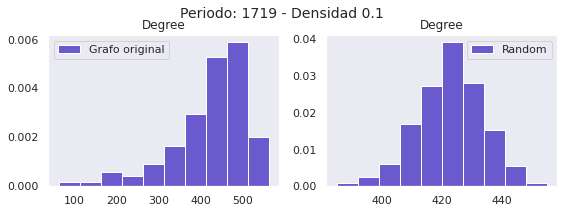

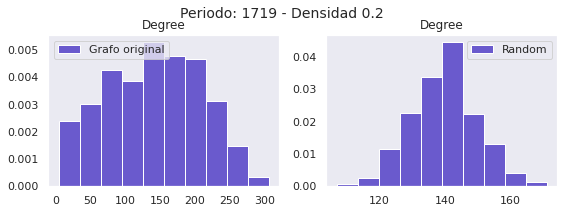

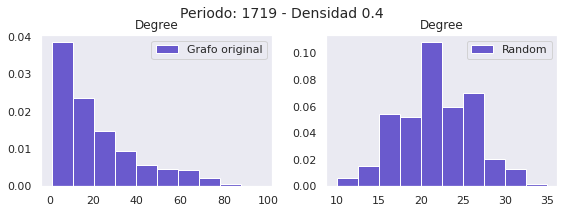

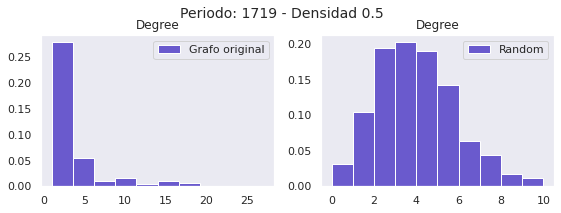

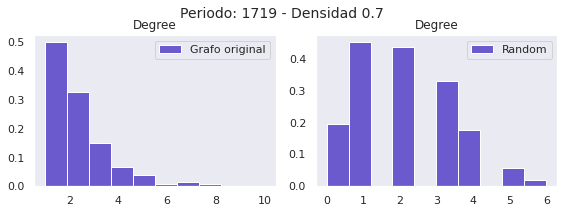

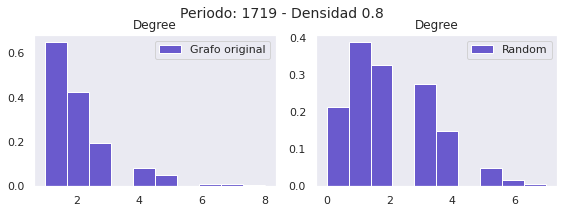

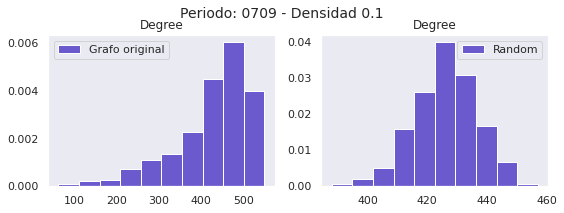

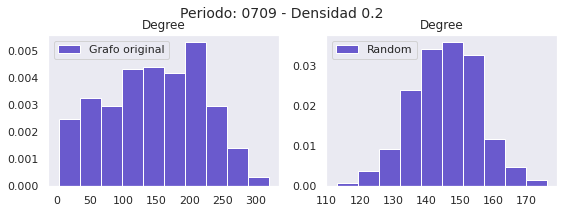

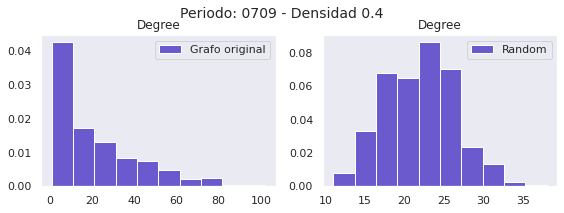

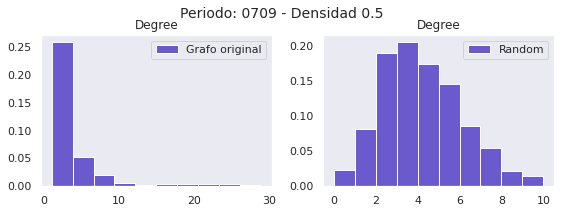

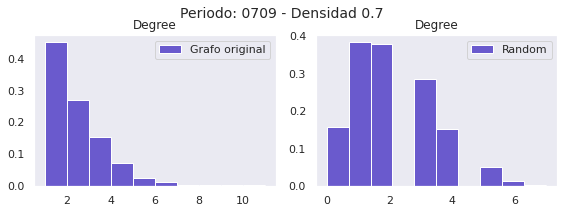

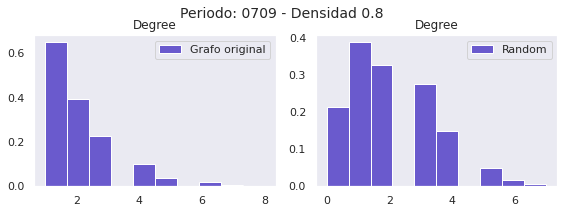

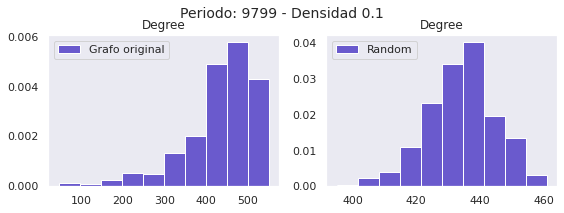

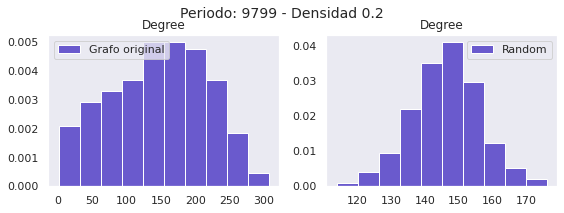

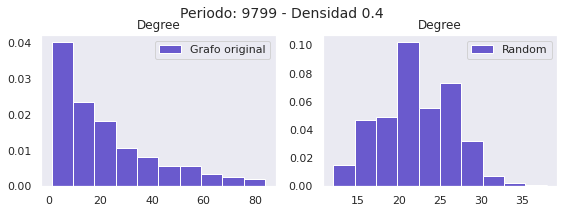

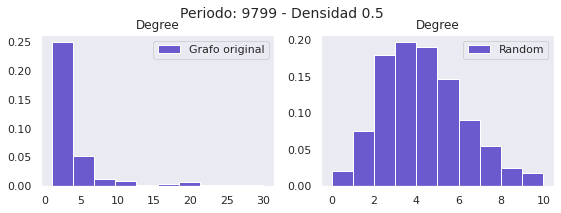

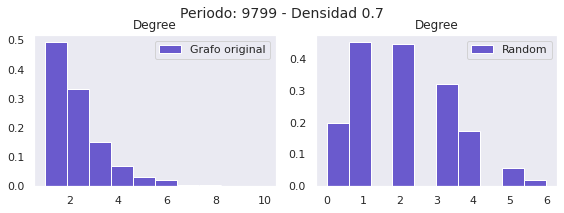

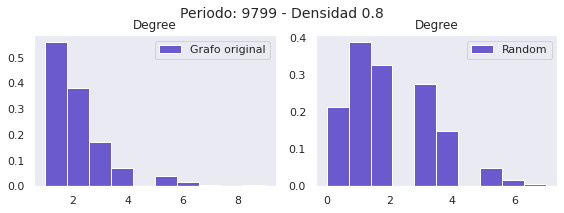

In [50]:
sns.set_style("darkgrid")
plot_distribution_comparisson(graphs_, random_graphs, save=False)

In [51]:
plot_distribution_comparisson(graphs_, random_graphs, save=True)

/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/df1/thresholds/dist_comparisson_1719_0.1.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/df1/thresholds/dist_comparisson_1719_0.25.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/df1/thresholds/dist_comparisson_1719_0.4.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/df1/thresholds/dist_comparisson_1719_0.53.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/df1/thresholds/dist_comparisson_1719_0.7.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/df1/thresholds/dist_comparisson_1719_0.85.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/df1/thresholds/dist_comparisson_0709_0.1.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/df1/thresholds/dist_compa

In [52]:
def calculate_louvain_communities(graphs_dict:dict):
    """
        Toma un diccionario que tenga como keys los nombres de los periodos y
        como values, otro diccionario. Este segundo dict tiene como keys las densidades
        a partir de las cuales se generaron los grafos.
       
        
        Genera un diccionario con las medidas de modularidad de comunidades 
        de louvain (Q, NC, comunidades).

        Atributos
        ---------
        
        graphs_dict: dict
            Diccionario de grafos.

        Returns
        -------

        louvain_modularities: dict
            Diccionario de grafos y medidas. Tiene como keys los nombres de los periodos y
            como values, otro diccionario. Este segundo dict tiene como keys las densidades
            a partir de las cuales se generaron los grafos y como values otro diccionario. 
            Este ultimo tiene como keys la identificación de elemento: grafo (G) o 
            medida de modularidad (Q, NC, comunidades)
    """
    louvain_modularities = dict()
    for key, Gs_dict in graphs_dict.items():
        louvain_modularities[key] = dict()
        for d, G in Gs_dict.items():
            # se calculan las comunidades de louvain
            modulos = community_louvain.best_partition(G, random_state=99)
            # se calcula modularidad de las comunidades del paso anterior
            Q = community_louvain.modularity(partition=modulos, graph=G) 
            # se calcula numero de comunidades o modulos
            NC = len(set(modulos.values()))
            # se guarda todo lo obtenido en un diccionario
            louvain_modularities[key][d] = {'G':G,'Q':Q, 'NC':NC,'communities':modulos}
    return louvain_modularities

In [53]:
louv_communities = calculate_louvain_communities(graphs_)

In [ ]:
louv_communities

{'1719': {0.1: {'G': <networkx.classes.graph.Graph at 0x7f165732e8e0>,
   'Q': 0.06521491259822193,
   'NC': 3,
   'communities': {'101': 1,
    '3502': 1,
    '102': 2,
    '401': 2,
    '103': 2,
    '1520': 2,
    '104': 2,
    '1512': 2,
    '4102': 2,
    '105': 2,
    '3402': 2,
    '407': 2,
    '409': 2,
    '106': 2,
    '201': 1,
    '206': 2,
    '1901': 2,
    '404': 1,
    '205': 2,
    '402': 2,
    '202': 2,
    '1502': 1,
    '203': 1,
    '209': 1,
    '210': 1,
    '204': 2,
    '506': 1,
    '504': 2,
    '511': 2,
    '510': 2,
    '207': 2,
    '1602': 2,
    '208': 1,
    '1213': 2,
    '1501': 1,
    '408': 1,
    '5911': 1,
    '5602': 1,
    '3006': 1,
    '3503': 1,
    '4304': 0,
    '1603': 1,
    '301': 2,
    '302': 2,
    '4107': 2,
    '303': 2,
    '304': 2,
    '2301': 2,
    '307': 2,
    '1605': 2,
    '305': 2,
    '1604': 2,
    '5608': 2,
    '306': 2,
    '403': 2,
    '406': 2,
    '2203': 2,
    '2105': 2,
    '405': 1,
    '3806': 1,
    '3501

In [54]:
# Guardo el diccionario como pickle para poder usarlo luego sin volver a correr todo
louv_communities_df1 = open("../data/processed/louv_communities_df1.pkl", "wb")
pickle.dump(louv_communities, louv_communities_df1)
louv_communities_df1.close()

In [109]:
louv_communities = pickle.load(open("../data/processed/louv_communities_df1.pkl", "rb"))

In [27]:
#louv_communities2 = calculate_louvain_communities(graphs2)

In [28]:
# Guardo el diccionario como pickle para poder usarlo luego sin volver a correr todo
# louv_communities2_df1 = open("../data/processed/louv_communities2_df1.pkl", "wb")
# pickle.dump(louv_communities2, louv_communities2_df1)
# louv_communities2_df1.close()

In [5]:
#louv_communities2 = pickle.load(open("../data/processed/louv_communities2_df1.pkl", "rb"))

In [55]:
random_louv_communities = calculate_louvain_communities(random_graphs)

In [56]:
# # Guardo el diccionario como pickle para poder usarlo luego sin volver a correr todo
random_louv_communities_df1 = open("../data/processed/random_louv_communities_df1.pkl", "wb")
pickle.dump(random_louv_communities, random_louv_communities_df1)
random_louv_communities_df1.close()

In [110]:
random_louv_communities = pickle.load(open("../data/processed/random_louv_communities_df1.pkl", "rb"))

In [57]:
def plot_communities_by_density(community_dict:dict, save:bool=False):
    """
        Toma un diccionario de comunidades (grafos y metricas de comunidades). 
        Tiene como keys los nombres de los periodos y como values, otro diccionario. 
        Este segundo dict tiene como keys las densidades a partir de las cuales se 
        generaron los grafos y como values otro diccionario. Este ultimo tiene como keys 
        la identificación de elemento: grafo (G) o medida de modularidad (Q, NC, comunidades)
        
        Devuelve un plot de cada grafo por densidad comparando los distintos periodos y agregando 
        información de comunidades.

        Atributos
        ---------
        
        graphs_dict: dict
            Diccionario de grafos.
        
        list_years: list
            Lista con los periodos a comparar
        
        save: bool, default=False
            Indicador para guardar el gráfico o plotearlo.
            
        Returns
        ---------
        Plots de grafos por densidad comparando distintos periodos para una misma densidad 
        identificando comunidades y metricas de comunidades
            
    """ 
    densities = list(list(community_dict.values())[0].keys())
    
    ncols = 2
    nrows = 2

    for d in densities:
        fig = plt.figure(figsize=(15,10))
        fig.suptitle('Densidad: {:0.2} - Grafo con layout Spring'.format(d), fontsize=20)
        i = 1
        
        for year in community_dict.keys():
            # se extraen los grafos para generar plots
            G = community_dict[year][d]['G']
            plt.subplot(nrows, ncols, i)
            sns.set_theme(style="white")
            pos = nx.spring_layout(G,k=0.2,seed=99)
            # se extrae el diccionario con los modulos o comunidades 
            modulos = community_dict[year][d]['communities']
            # se extraen las comunidades a las que pertenece cada producto de la red del dic previo
            values = [v for n,v in modulos.items()]
            # se extraen medidas para agregar info a los gráficos
            NC, Q = community_dict[year][d]['NC'],community_dict[year][d]['Q']
            nx.draw(G, pos=pos, with_labels=False, cmap=plt.cm.tab10, font_weight='bold',
                    node_color = values, node_size=50, font_color='white')
            plt.title('Periodo: {0} - NC: {1} - Q: {2:0.1}'.format(year, NC, Q))
            i += 1
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)
        
        if save:
            folder = os.path.abspath('.').replace('notebooks','figures')
            file_path = os.path.join(folder, 'community_by_density_{:0.2}.png'.format(d))
            plt.savefig(file_path)
            plt.close()
            print(f'{file_path} guardado exitosamente.')
        else:
            plt.show()

In [ ]:
plot_communities_by_density(louv_communities, save=False)

In [58]:
plot_communities_by_density(louv_communities, save=True)

/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/community_by_density_0.1.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/community_by_density_0.25.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/community_by_density_0.4.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/community_by_density_0.53.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/community_by_density_0.7.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/community_by_density_0.85.png guardado exitosamente.


In [64]:
def plot_communities_by_period(community_dict:dict, save:bool=False):
    """
        Toma un diccionario de comunidades (grafos y metricas de comunidades). 
        Tiene como keys los nombres de los periodos y como values, otro diccionario. 
        Este segundo dict tiene como keys las densidades a partir de las cuales se 
        generaron los grafos y como values otro diccionario. Este ultimo tiene como keys 
        la identificación de elemento: grafo (G) o medida de modularidad (Q, NC, comunidades)
        
        Devuelve un plot de cada grafo por periodo comparando las distintas densidades y agregando 
        información de comunidades.

        Atributos
        ---------
        
        graphs_dict: dict
            Diccionario de grafos.
        
        list_years: list
            Lista con los periodos a comparar
        
        save: bool, default=False
            Indicador para guardar el gráfico o plotearlo.
            
        Returns
        ---------
        Plots de grafos por periodo comparando distintas densidades para un mismo periodo 
        identificando comunidades y metricas de comunidades
        
    """    
    n_densities = len(list(community_dict.values())[0].keys())
    
    ncols = 2
    nrows = ceil(n_densities/ncols)
    
    for year, Gs_info in community_dict.items():
        fig = plt.figure(figsize=(20,30))
        fig.suptitle(f'Periodo: {year} - Grafo con layout Spring', fontsize=20)
        i = 1
        
        for d in Gs_info.keys():
            G = Gs_info[d]['G']
            plt.subplot(nrows, ncols, i)
            pos = nx.spring_layout(G,k=0.2,seed=99)
            modulos = Gs_info[d]['communities']
            values = [v for n,v in modulos.items()]
            NC, Q = Gs_info[d]['NC'],Gs_info[d]['Q']
            nx.draw(G,pos=pos, with_labels=False,cmap=plt.cm.tab10,font_weight='bold',
                    node_color = values, node_size=50, font_color='white')
            plt.title('Density: {0:0.2} - NC: {1} - Q: {2:0.2}'.format(d, NC, Q))
            i += 1
        plt.tight_layout()
        plt.subplots_adjust(top=0.95)
        if save:
            folder = os.path.abspath('.').replace('notebooks','figures')
            file_path = os.path.join(folder, f'community_by_period_{year}.png')
            plt.savefig(file_path)
            plt.close()
            print(f'{file_path} guardado exitosamente.')
        else:
            plt.show()

In [65]:
plot_communities_by_period(louv_communities, save=True)

/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/community_by_period_1719.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/community_by_period_0709.png guardado exitosamente.
/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/community_by_period_9799.png guardado exitosamente.


In [66]:
def plot_modularity_measures_lastperiodvsrest(graphs_communities, random_communities=None, errorbar=False,
                                    title:str=None, 
                                    nro_graph:int=None,
                                    save:bool=False):
    """
        Plotea NC y Q.
    """
    measures = {'Q':[0.0,1],'NC':[0,50], 'Q_pvalue_y':0.2, 'NC_pvalue_y':3}
    years = {'0709':'green','9799':'blue'}
    fig = plt.figure(figsize=(15,8))
    if title:
        fig.suptitle(title, fontsize=20)
    i = 1
    for m in ['Q','NC']:
        for y in years.keys():
            densities = list(graphs_communities[y].keys())
            ax = plt.subplot(2,2,i)
            # ax.set_ylim(measures[m])
            plt.title(f'{m.upper()} - {y} vs. 1719',fontsize=16)
            values = [graphs_communities[y][d][m] for d in densities]
            last_values = [graphs_communities['1719'][d][m] for d in densities]
            plt.plot(densities, values, label=y, color=years[y])
            plt.plot(densities, last_values, label='1719', color='black')
            plt.legend(loc = "upper left", fontsize='large')
            plt.xlabel('Densidad (d)')    
            plt.ylabel(m)
            #plt.ylim(measures[m])
            if random_communities:
                # this is an inset axes over the main axes
                random_values = [random_communities[y][d][m] for d in random_communities[y].keys()]
                random_last_values = [random_communities['1719'][d][m] for d in random_communities['1719'].keys()]
                ins = ax.inset_axes([0.6, 0.3, 0.3, 0.3])
                ins.set_title('Random')
                ins.plot(densities, random_values, label=y, color = years[y])
                ins.plot(densities, random_last_values, label='1719' , color = "black")
                ins.set_xlabel('d')
                ins.set_ylabel(m)
                #ins.set_ylim(measures[m])
            i += 1
    plt.tight_layout()
    if title:
        plt.subplots_adjust(top=0.90)
    if save:
        folder = os.path.abspath('.').replace('notebooks','figures')
        file_path = os.path.join(folder, f'modularity_measures_lastperiodvsrest_grafos{nro_graph}.png')
        plt.savefig(file_path)
        plt.close()
        print(f'{file_path} guardado exitosamente.')
    else:
        plt.show()

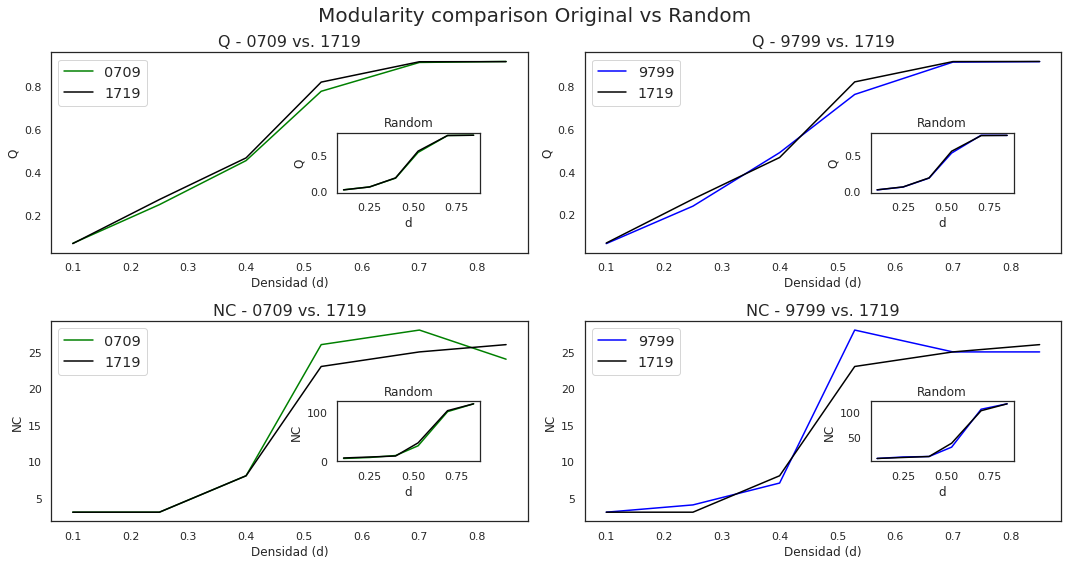

In [68]:
plot_modularity_measures_lastperiodvsrest(louv_communities, random_louv_communities, errorbar=False, 
                                          title='Modularity comparison Original vs Random', nro_graph=1, save=False)

In [67]:
plot_modularity_measures_lastperiodvsrest(louv_communities, random_louv_communities, errorbar=False, 
                                          title='Modularity comparison Original vs Random', nro_graph=1, save=True)

/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/modularity_measures_lastperiodvsrest_grafos1.png guardado exitosamente.


In [69]:
# Armo una función para graficar Q y NC para los distintos periodos
def plot_con_random(year, louvain_modularities, random_louvain_modularities=None, 
                    metrica:str=None, name_metrica:str=None, col:str=None, save:bool=False):
    """
        Armo una función para graficar Q y NC para los distintos periodos. 
        Hay que indicar: año, metrica, nombre de metrica para gráfico y color. 
        Devuelve un gráfico comparando random vs original louv mod. 

        Toma un diccionario de comunidades (grafos y metricas de comunidades) original y otro random. 
        Tienen como keys los nombres de los periodos y como values, otro diccionario. 
        Este segundo dict tiene como keys las densidades a partir de las cuales se 
        generaron los grafos y como values otro diccionario. Este ultimo tiene como keys 
        la identificación de elemento: grafo (G) o medida de modularidad (Q, NC, comunidades)
                
        Y grafica las metricas de modularidad comparando los restantes periodos con '1719'.

        Atributos
        ---------
        
        year: str
            Define el período a comparar vs '1719'
        
        louvain_modularities: dict
            Diccionario original de comunidades.
            
        random_louvain_modularities: dict
            Diccionario random de comunidades.
        
        metrica: str
            String identificando métrica a graficar (Q o NC)
        
        name_metrica: str 
             String del nombre de la métrica que figurará en el título del gráfico
        
        save: bool, default=False
            Indicador para guardar el gráfico o plotearlo.
            
        Returns
        ---------
        Line plots de métricas de modularidad a distintas densidades comparando periodo seleccionado vs '1719'
            
    """
    if metrica == 'Q':
        ylim = [0, 1.0]
        ylim2 = [0, 1.0]
    else:
        ylim = [0, 35]
        ylim2 = [0, 150]
    
    densities = list(list(louvain_modularities.values())[0].keys())
    year_mod = list(louvain_modularities[year].values())
    year_mod_random = list(random_louvain_modularities[year].values())
    mod_1719 = list(louvain_modularities['1719'].values())
    mod_1719_random = list(random_louvain_modularities['1719'].values())
    metrica_year = [d[metrica] for d in year_mod if metrica in d]
    metrica_year_random = [d[metrica] for d in year_mod_random if metrica in d]
    metrica_1719 = [d[metrica] for d in mod_1719 if metrica in d]
    metrica_1719_random = [d[metrica] for d in mod_1719_random if metrica in d]
    # the main axes is subplot(111) by default
    plt.plot(densities, metrica_year, label=year, color = col)
    # para agregar la error bar 
    # plt.errorbar(densities,mean, sd) cuando calculemos para todos los sujetos;
    plt.plot(densities, metrica_1719, label='1719' , color = "black")
    plt.xlabel('Densidad (d)')
    plt.ylim(ylim)
    plt.ylabel(name_metrica)
    plt.title(f'{name_metrica} 1719 vs. {year} - Louvain')
    plt.legend(loc = "upper left", fontsize='large')
    # this is an inset axes over the main axes
    a = plt.axes([.6, .2, .3, .3])
    plt.plot(densities, metrica_year_random, label=year, color = col)
    plt.plot(densities, metrica_year_random, label='1719' , color = "black")
    plt.xlabel('d')
    plt.ylabel(metrica)
    plt.ylim(ylim2)
    plt.title('Random')
    plt.xticks([])
    plt.yticks([])
    if save:
        folder = os.path.abspath('.').replace('notebooks','figures')
        file_path = os.path.join(folder,  f'community_{metrica}_comparison_{year}_1719.png' )
        plt.savefig(file_path)
        plt.close()
        print(f'{file_path} guardado exitosamente.')
    else:
        plt.show()

In [129]:
plot_con_random('0709', louv_communities, random_louv_communities, 'Q', 'Modularidad (Q)' ,'green', save=True)

/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/community_Q_comparison_0709_1719.png guardado exitosamente.


In [126]:
plot_con_random('9799', louv_communities, random_louv_communities, 'Q', 'Modularidad (Q)' ,'blue', save=True)

/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/community_Q_comparison_9799_1719.png guardado exitosamente.


In [148]:
plot_con_random('0709', louv_communities, random_louv_communities, 'NC', 'Nro de Comunidades (NC)','green', save=True)

/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/community_NC_comparison_0709_1719.png guardado exitosamente.


In [149]:
plot_con_random('9799', louv_communities, random_louv_communities, 'NC', 'Nro de Comunidades (NC)','blue', save=True)

/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/community_NC_comparison_9799_1719.png guardado exitosamente.


In [70]:
# corregir este en adelante
def plot_modularity_measures_by_period_vsRandom(graphs_communities, random_communities=None, 
                                                save:bool=False, nro_graph:int=None):
    """
        Plotea NC y Q.
    """
    measures = {'Q':'blue','NC':'green'}
    fig = plt.figure(figsize=(15,8))
    i = 1
    for m in measures:
        for y in graphs_communities.keys():
            densities = list(graphs_communities[y].keys())
            values = [graphs_communities[y][d][m] for d in graphs_communities[y].keys()]
            random_values = [random_communities[y][d][m] for d in random_communities[y].keys()]
            ax = plt.subplot(2,3,i)
            plt.title(f'{m.upper()} - {y} vs. Random',fontsize=16)
            plt.plot(densities, values, label=y, color=measures[m])
            plt.plot(densities, random_values, label='Random', color='black')
            plt.legend()
            plt.xlabel('Densidad (d)')    
            plt.ylabel(m)
            i += 1
    plt.tight_layout()
    if save:
        folder = os.path.abspath('.').replace('notebooks','figures')
        file_path = os.path.join(folder, f'modularity_measures_by_period_vsRandom_grafos{nro_graph}.png')
        plt.savefig(file_path)
        plt.close()
        print(f'{file_path} guardado exitosamente.')
    else:
        plt.show()

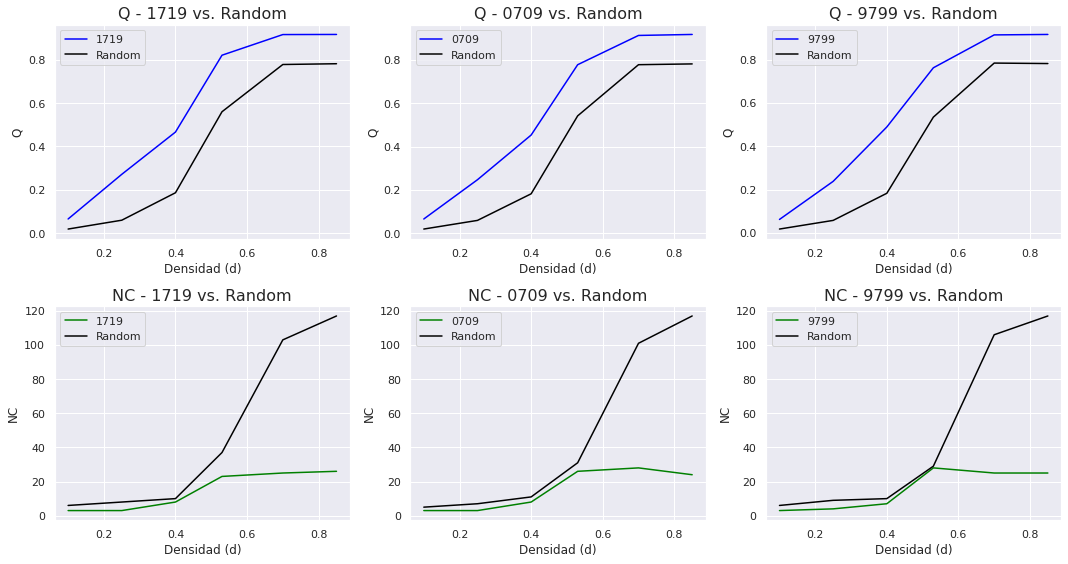

In [71]:
sns.set_style("darkgrid")
plot_modularity_measures_by_period_vsRandom(louv_communities, random_louv_communities, save=False, nro_graph=1)

In [72]:
plot_modularity_measures_by_period_vsRandom(louv_communities, random_louv_communities, save=True, nro_graph=1)

/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/modularity_measures_by_period_vsRandom_grafos1.png guardado exitosamente.


In [81]:
# para estudiar si las diferencias entre las métricas de modularidad en cada período son estadisticamente significativas
densities = list(list(louv_communities.values())[0].keys())
dict_1719 = dict()
for d in densities:
    for m in ['Q', 'NC']:
            if m in dict_1719:
                dict_1719[m].append(louv_communities['1719'][d][m])
            else:
                dict_1719[m] = [louv_communities['1719'][d][m]]

In [82]:
dict_0709 = dict()
for d in densities:
    for m in ['Q', 'NC']:
            if m in dict_0709:
                dict_0709[m].append(louv_communities['0709'][d][m])
            else:
                dict_0709[m] = [louv_communities['0709'][d][m]]

In [83]:
dict_9799 = dict()
for d in densities:
    for m in ['Q', 'NC']:
            if m in dict_9799:
                dict_9799[m].append(louv_communities['9799'][d][m])
            else:
                dict_9799[m] = [louv_communities['9799'][d][m]]

In [84]:
dict_1719

{'Q': [0.06521491259822193,
  0.2713475764967353,
  0.4662072508947432,
  0.8206601142883301,
  0.9158640203100213,
  0.9164094748579682],
 'NC': [3, 3, 8, 23, 25, 26]}

t-test on TWO RELATED samples of scores, a and b.

This is a test for the null hypothesis that two related or repeated samples have identical average (expected) values.

The test measures whether the average score differs significantly across samples. If we observe a large p-value, for example greater than 0.05 or 0.1 then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages. 

In [85]:
# test t de diferencia de medias para evaluar si las diferencias son estadísticamente significativas
ttest_rel(dict_1719['Q'], dict_0709['Q']).pvalue

0.11537787979883139

In [86]:
ttest_rel(dict_1719['Q'], dict_9799['Q']).pvalue

0.335634656728701

In [88]:
# test t de diferencia de medias para evaluar si las diferencias son estadísticamente significativas
ttest_rel(dict_1719['NC'], dict_0709['NC']).pvalue

0.4441131654219257

In [89]:
# test t de diferencia de medias para evaluar si las diferencias son estadísticamente significativas
ttest_rel(dict_1719['NC'], dict_9799['NC']).pvalue 

0.5006803901900949

Revisar: La modularidad presenta diferencias estadísitcamente significativas entre distintos períodos, no así el número de comunidades para cada una de las densidades de aristas estudiadas. 

In [90]:
def module_partition_dict(communities_dict):
    """
        Toma un diccionario con los nodos como keys y las comunidades como
        values y lo transforma en otro diccionario donde cada key es una
        comunidad y los values son las listas de nodos asignadas a esa 
        comunidad.
        
        Ejemplo:
        
        input:  {0: 3, 1: 3, 2:1, 3: 0, 4: 2, 5:2}
        putput: {0: [3], 1: [2]. 2: [4,5], 3: [0,1]}
        
        Parámetros
        ----------
        communities_dict: dict
            Diccionario con nodos (keys) y comunidades (values).
            
        Return
        ------
        module_partition: dict
            Diccionario con comunidades (keys) y listas de nodos asignados a
            esa comunidad (values).
    """
    module_partition = dict()
    for k, v in communities_dict.items():
        if v not in module_partition:
            module_partition[v] = list()
        module_partition[v].append(k)
    return module_partition

In [91]:
# calculo del coef de participacion que mide la conectividad inter-comunidades
def participation_coefficient(G, module_partition):
    '''
    Computes the participation coefficient of nodes of G with partition
    defined by module_partition.
    (Guimera et al. 2005).

    Parameters
    ----------
    G : :class:`networkx.Graph`
    module_partition : dict
        a dictionary mapping each community name to a list of nodes in G

    Returns
    -------
    dict
        a dictionary mapping the nodes of G to their participation coefficient
        under the participation specified by module_partition.
    '''
    # Initialise dictionary for the participation coefficients
    pc_dict = {}

    # Loop over modules to calculate participation coefficient for each node
    for m in module_partition.keys():
        # Create module subgraph
        M = set(module_partition[m])
        for v in M:
            # Calculate the degree of v in G
            degree = float(nx.degree(G=G, nbunch=v))

            # Calculate the number of intramodule degree of v
            wm_degree = float(sum([1 for u in M if (u, v) in G.edges()]))

            # The participation coeficient is 1 - the square of
            # the ratio of the within module degree and the total degree
            if degree != 0:
                pc_dict[v] = 1 - ((float(wm_degree) / float(degree))**2)
            else:
                pc_dict[v] = 0   

    return pc_dict

In [92]:
# cálculo de z-score que mide las conexiones al interior de las comunidades
def z_score(G, module_partition):
    '''
    Calculate the z-score of the nodes of G under partition module_partition.

    Parameters
    ----------
    G : :class:`networkx.Graph`
    module_partition : dict
        a dictionary mapping each community name to a lists of nodes in G

    Returns
    -------
    dict
        a dictionary mapping the nodes of G to their z-score under
        module_partition.
    '''
    # Initialise dictionary for the z-scores
    z_score = {}

    # Loop over modules to calculate z-score for each node
    for m in module_partition.keys():
        # Create module subgraph
        M = G.subgraph(set(module_partition[m]))           # subgrafo que contiene a los nodos del módulo m
        # Calculate relevant module statistics
        M_degrees = list(dict(M.degree()).values())        # esto se queda con los grados de todos los nodos del subgrafo
        M_degree = np.mean(M_degrees)                      # calcula la media
        M_std = np.std(M_degrees)                          # y el desvío
        for v in M.nodes:
            # Calculate the number of intramodule edges
            wm_edges = float(nx.degree(G=M, nbunch=v))     # esto se queda con los grados del nodo v específicamente
            # Calculate z score as the intramodule degree of v
            # minus the mean intramodule degree, all divided by
            # the standard deviation of intramodule degree
            if M_std != 0:
                zs = (wm_edges - M_degree)/M_std
            else:
                # If M_std is 0, then all M_degrees must be equal.
                # It follows that the intramodule degree of v must equal
                # the mean intramodule degree.
                # It is therefore valid to assign a 0 value to the z-score
                zs = 0
            z_score[v] = zs
    
    return z_score

In [93]:
# se asignan roles considerando los criterios propuestos por Tagliazucchi et al (2013)
def assign_node_type(PC, zscore, pc_threshold, zc_threshold):
    node_type = None
    # si el nodo tiene coef. de participación > Pc y z-score < Zc, es un hub
    if (PC>pc_threshold) and (zscore>zc_threshold):
        node_type = 'hubs'
    # si el nodo tiene coef. de participación < Pc y z-score > Zc, es un prov_hubs
    elif (PC<pc_threshold) and (zscore>zc_threshold):
        node_type = 'prov_hubs'
    # si el nodo tiene coef. de participación < Pc y z-score < Zc, es un prov_nodes
    elif (PC<pc_threshold) and (zscore<zc_threshold):
        node_type = 'prov_nodes'
    # si el nodo tiene coef. de participación > Pc y z-score < Zc, es un connector_nodes
    elif (PC>pc_threshold) and (zscore<zc_threshold):
        node_type = 'connector_nodes'
    return node_type

In [94]:
# arma un df con la identificacion de roles de los nodos en base al cálculo de coef de conexión intra e inter-comunidades
def recognize_nodes_types(graphs_dict, pc_threshold, zc_threshold):
    df_results = pd.DataFrame()
    for year in graphs_dict.keys():
        for densidad in graphs_dict[year].keys():
            G = graphs_dict[year][densidad]['G']
            comunidades = graphs_dict[year][densidad]['communities']
            module_partition = module_partition_dict(comunidades)
            # diccionario con nodos (keys) y coef. de participación (values)
            P = participation_coefficient(G, module_partition) 
            # diccionario con nodos (keys) y z-score (values)
            zscore = z_score(G, module_partition)
            df_P = pd.DataFrame.from_dict(P.items()).rename(columns={0:'node',1:'PC'})
            df_Z = pd.DataFrame.from_dict(zscore.items()).rename(columns={0:'node',1:'zscore'})
            df = df_P.merge(df_Z, how='left', on='node')
            df['densidad'] = densidad
            df['node_type'] = df.apply(lambda x: assign_node_type(
                x.PC, x.zscore,
                pc_threshold=pc_threshold, 
                zc_threshold=zc_threshold
            ),
            axis=1)
            df['periodo'] = year
            df = df[['periodo','densidad','node','node_type','PC','zscore']]
            df_results = df_results.append(df, ignore_index=True)
    return df_results

In [95]:
# calculo de la cantidad de nodos de cada tipo
def calculate_nodes_types_amount(df_node_types):
    types_amount = (
        # se agrupa por columnas seleccionadas
        df_node_types.groupby(['periodo','densidad','node_type']) 
        # se calcula cuántas filas hay de cada combinación
        .size()                                                            
        .reset_index()                                             
        .rename(columns={0:'n_nodes'})
        # se "desacopla" la columna node_types
        .pivot_table(                                                      
            index=['periodo','densidad'],     
            # se arma una columna por tipo de nodo
            columns=['node_type'],   
            # se agrega la cantidad de cada uno en las filas
            values='n_nodes')
        .reset_index()
        .rename_axis(None, axis=1)
    )
    return types_amount

In [96]:
def calculate_pvalue_for_densities(pob1, pob2, column, densities):
    pvalues_list = list()
    for d in densities:
        pob1_values = pob1.loc[pob1.densidad==d,column].values
        pob2_values = pob2.loc[pob2.densidad==d,column].values
        pvalue = ttest_rel(pob1_values, pob2_values, nan_policy='omit').pvalue
        pvalues_list.append(pvalue)
    return pvalues_list

In [97]:
# plot de los roles de los nodos
def plot_nodes_types(nodes_types_df, title:str=None,
                     save:bool=False, file_name:str='nodes_types.png'):
    year = {'0709':'green','9799':'blue'}
    nodes_type = {'hubs':2,'prov_hubs':1,'prov_nodes':20,'connector_nodes':10}
    densities = nodes_types_df.loc[nodes_types_df.periodo=='1719']['densidad']

    i = 1
    fig = plt.figure(figsize=(15,10))
    for nt in nodes_type:
        for y in year:
            df_rest = nodes_types_df.loc[nodes_types_df.periodo==y,['periodo','densidad',nt]]
            df_1719 = nodes_types_df.loc[nodes_types_df.periodo=='1719',['periodo','densidad',nt]]
            pvalues = calculate_pvalue_for_densities(df_rest, df_1719, column=nt, densities=densities)
            signif = [i for i,p in enumerate(pvalues) if p<0.05]
            signif_dens = [densities[p] for p in signif]
            ax = plt.subplot(4,2,i)
            plt.plot(densities, df_rest.loc[df_rest.periodo==y][nt], label=y, color=year[y])
            plt.plot(densities, df_1719[nt], label='1719', color='black')
            plt.scatter(signif_dens, [nodes_type[nt]]*len(signif_dens), marker='*',color='black')
            plt.title(f'{y} vs. 1719', fontsize=16)
            plt.legend()
            plt.ylabel(nt.replace('_',' ').title())
            i += 1
    plt.tight_layout()
    if title:
        fig.suptitle(title, fontsize=20)
        plt.subplots_adjust(top=0.90)
    if save:
        folder = os.path.abspath('.').replace('notebooks','figures')
        file_path = os.path.join(folder, file_name)
        plt.savefig(file_path)
        plt.close()
        print(f'{file_path} guardado exitosamente.')
    else:
        plt.show()

In [98]:
node_types = recognize_nodes_types(louv_communities, pc_threshold=0.05, zc_threshold=1)

In [99]:
node_types

periodo  densidad  node        node_type        PC    zscore
0        1719      0.10  3819  connector_nodes  0.900604  0.622505
1        1719      0.10  3202  connector_nodes  0.933655  0.111856
2        1719      0.10  2804  connector_nodes  0.917395  0.225334
3        1719      0.10  3811  connector_nodes  0.884622  0.452289
4        1719      0.10  3504  connector_nodes  0.923225  0.906199
...       ...       ...   ...              ...       ...       ...
10507    9799      0.85  2811       prov_nodes  0.000000 -0.689730
10508    9799      0.85  5103       prov_nodes  0.000000 -0.689730
10509    9799      0.85  3206        prov_hubs  0.000000  3.251587
10510    9799      0.85  2849  connector_nodes  0.750000 -0.689730
10511    9799      0.85  3810       prov_nodes  0.000000 -0.689730

[10512 rows x 6 columns]

In [100]:
# para cada nodo de cada periodo-densidad, calculo cuántos nodos de cada tipo hay
df_results = calculate_nodes_types_amount(node_types)

In [101]:
df_results

periodo  densidad  connector_nodes   hubs  prov_hubs  prov_nodes
0     0709      0.10            573.0   11.0        NaN         NaN
1     0709      0.25            484.0   90.0        NaN        10.0
2     0709      0.40            346.0   92.0       17.0       129.0
3     0709      0.53             63.0   35.0       65.0       419.0
4     0709      0.70             25.0   21.0       92.0       446.0
5     0709      0.85             17.0   22.0       97.0       448.0
6     1719      0.10            570.0   13.0        NaN         1.0
7     1719      0.25            469.0  107.0        NaN         8.0
8     1719      0.40            368.0   93.0       14.0       109.0
9     1719      0.53             43.0   30.0       75.0       436.0
10    1719      0.70             22.0   19.0       65.0       478.0
11    1719      0.85             19.0   24.0       63.0       478.0
12    9799      0.10            563.0   21.0        NaN         NaN
13    9799      0.25            468.0  100.0        NaN        16.0
14    9799      0.40            385.0   76.0       15.0       108.0
15    9799      0.53             67.0   32.0       62.0       423.0
16    9799      0.70             18.0   20.0       77.0       469.0
17    9799      0.85             17.0   23.0       83.0       461.0

In [102]:
df_results.loc[df_results.periodo=='0709']['hubs']

0    11.0
1    90.0
2    92.0
3    35.0
4    21.0
5    22.0
Name: hubs, dtype: float64

In [103]:
df_results.loc[df_results.periodo=='1719']['densidad']

6     0.10
7     0.25
8     0.40
9     0.53
10    0.70
11    0.85
Name: densidad, dtype: float64

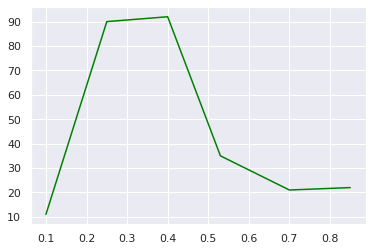

In [104]:
plt.plot(df_results.loc[df_results.periodo=='1719']['densidad'], df_results.loc[df_results.periodo=='0709']['hubs'], label='0709', color='green')

In [106]:
plot_nodes_types(df_results, save=True)

/home/soficp/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/soficp/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/soficp/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/soficp/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/soficp/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/soficp/.local/lib/python3.8/site-packages/numpy/

/mnt/c/Users/sofi_/OneDrive/Documentos/Git/prod-space/figures/nodes_types.png guardado exitosamente.


In [107]:
ttest_rel(df_results.loc[df_results.periodo=='0709']['hubs'], df_results.loc[df_results.periodo=='1719']['hubs'], nan_policy='omit')

Ttest_relResult(statistic=-0.804778474974563, pvalue=0.45749150564633667)

In [108]:
ttest_rel(df_results.loc[df_results.periodo=='0709']['connector_nodes'], df_results.loc[df_results.periodo=='1719']['connector_nodes'], nan_policy='omit')

Ttest_relResult(statistic=0.4716040110467037, pvalue=0.6570712961696492)

In [109]:
ttest_rel(df_results.loc[df_results.periodo=='0709']['prov_nodes'], df_results.loc[df_results.periodo=='1719']['prov_nodes'], nan_policy='omit')

Ttest_relResult(statistic=-1.1494645746862855, pvalue=0.3144184103448697)

In [179]:
dt = [[0, 'Alimentos y animales vivos principalmente para alimentos', 'Alimentos y animales'], [1, 'Bebidas y tabaco', 'Bebidas y tabaco'], [2, 'Materias primas no comestibles, excepto combustibles', 'Materias primas'],[3, 
              'Combustibles minerales, lubricantes y materiales relacionados', 'Combustibles'], [4, 'Aceites, grasas y ceras animales y vegetales', 'Aceites y grasas'], [5, 'Productos químicos y productos afines, nep', 'Productos químicos'],
              [6, 'Productos manufacturados clasificados principalmente por materiales', 'Productos manufacturados'], [7, 'Maquinaria y equipo de transporte', 'Maq y equipo de transporte'], [8, 'Manufacturas diversas', 'Otras manufacturas'],
              [9, 'Materias primas y transacciones no clasificadas en otra parte de la CUCI', 'Otras materias primas']]
dt

[[0,
  'Alimentos y animales vivos principalmente para alimentos',
  'Alimentos y animales'],
 [1, 'Bebidas y tabaco', 'Bebidas y tabaco'],
 [2,
  'Materias primas no comestibles, excepto combustibles',
  'Materias primas'],
 [3,
  'Combustibles minerales, lubricantes y materiales relacionados',
  'Combustibles'],
 [4, 'Aceites, grasas y ceras animales y vegetales', 'Aceites y grasas'],
 [5, 'Productos químicos y productos afines, nep', 'Productos químicos'],
 [6,
  'Productos manufacturados clasificados principalmente por materiales',
  'Productos manufacturados'],
 [7, 'Maquinaria y equipo de transporte', 'Maq y equipo de transporte'],
 [8, 'Manufacturas diversas', 'Otras manufacturas'],
 [9,
  'Materias primas y transacciones no clasificadas en otra parte de la CUCI',
  'Otras materias primas']]

In [180]:
categ = pd.DataFrame(dt, columns=['Category', 'Desc_Categ', 'Desc_Categ_short'])
categ

Category                                         Desc_Categ  \
0         0  Alimentos y animales vivos principalmente para...   
1         1                                   Bebidas y tabaco   
2         2  Materias primas no comestibles, excepto combus...   
3         3  Combustibles minerales, lubricantes y material...   
4         4       Aceites, grasas y ceras animales y vegetales   
5         5         Productos químicos y productos afines, nep   
6         6  Productos manufacturados clasificados principa...   
7         7                  Maquinaria y equipo de transporte   
8         8                              Manufacturas diversas   
9         9  Materias primas y transacciones no clasificada...   

             Desc_Categ_short  
0        Alimentos y animales  
1            Bebidas y tabaco  
2             Materias primas  
3                Combustibles  
4            Aceites y grasas  
5          Productos químicos  
6    Productos manufacturados  
7  Maq y equipo de transporte  
8          Otras manufacturas  
9       Otras materias primas

In [110]:
list_years1 = ['1719', '0709', '9799']
# levanto las matrices y por ahora descarto las descripciones
dfs_prox_matrix = {}
for i in list_years1:
    df = pd.read_csv(f'../data/processed/prox_matix_desc_{i}_df1.csv')
    df = df.set_index(df.product_i)
    df = df.set_index(df.index.astype(str))
    df = df.merge(categ, how='left', on='Category')
    dfs_prox_matrix[i] = df

In [111]:
clasif_nodes = dfs_prox_matrix['1719'][['HS_code', 'HS_description', 'es_bio_prod', 'Category', 'Desc_Categ', 'Desc_Categ_short']]
clasif_nodes

HS_code                                     HS_description  es_bio_prod  \
0         101             Live horses, asses, mules and hinnies.         True   
1         102                               Live bovine animals.         True   
2         103                                        Live swine.         True   
3         104                              Live sheep and goats.         True   
4         105  Live poultry, that is to say, fowls of the spe...         True   
...       ...                                                ...          ...   
1212     9702       Original engravings, prints and lithographs.        False   
1213     9703  Original sculptures and statuary, in any mater...        False   
1214     9704  Postage or revenue stamps, stamp-postmarks, fi...        False   
1215     9705  Collections and collectors' pieces of zoologic...        False   
1216     9706    Antiques of an age exceeding one hundred years.        False   

      Category                                         Desc_Categ  \
0            0  Alimentos y animales vivos principalmente para...   
1            0  Alimentos y animales vivos principalmente para...   
2            0  Alimentos y animales vivos principalmente para...   
3            0  Alimentos y animales vivos principalmente para...   
4            0  Alimentos y animales vivos principalmente para...   
...        ...                                                ...   
1212         8                              Manufacturas diversas   
1213         8                              Manufacturas diversas   
1214         8                              Manufacturas diversas   
1215         8                              Manufacturas diversas   
1216         8                              Manufacturas diversas   

          Desc_Categ_short  
0     Alimentos y animales  
1     Alimentos y animales  
2     Alimentos y animales  
3     Alimentos y animales  
4     Alimentos y animales  
...                    ...  
1212    Otras manufacturas  
1213    Otras manufacturas  
1214    Otras manufacturas  
1215    Otras manufacturas  
1216    Otras manufacturas  

[1217 rows x 6 columns]

In [112]:
clasif_nodes['HS_code'] = clasif_nodes['HS_code'].map(str)

/tmp/ipykernel_29542/3792641552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clasif_nodes['HS_code'] = clasif_nodes['HS_code'].map(str)


In [113]:
clasif_nodes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217 entries, 0 to 1216
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   HS_code           1217 non-null   object
 1   HS_description    1217 non-null   object
 2   es_bio_prod       1217 non-null   bool  
 3   Category          1217 non-null   int64 
 4   Desc_Categ        1217 non-null   object
 5   Desc_Categ_short  1217 non-null   object
dtypes: bool(1), int64(1), object(4)
memory usage: 58.2+ KB


In [114]:
node_types_categ = node_types.merge(clasif_nodes, how='left', left_on='node', right_on='HS_code')

In [115]:
node_types_categ.head()

periodo  densidad  node        node_type        PC    zscore HS_code  \
0    1719       0.1  3819  connector_nodes  0.900604  0.622505    3819   
1    1719       0.1  3202  connector_nodes  0.933655  0.111856    3202   
2    1719       0.1  2804  connector_nodes  0.917395  0.225334    2804   
3    1719       0.1  3811  connector_nodes  0.884622  0.452289    3811   
4    1719       0.1  3504  connector_nodes  0.923225  0.906199    3504   

                                      HS_description  es_bio_prod  Category  \
0  Hydraulic brake fluids and other prepared liqu...         True         5   
1  Synthetic organic tanning substances; inorgani...         True         5   
2         Hydrogen, rare gases and other non-metals.         True         5   
3  Anti-knock preparations, oxidation inhibitors,...         True         5   
4  Peptones and their derivatives; other protein ...         True         5   

                                   Desc_Categ    Desc_Categ_short  
0  Productos químicos y productos afines, nep  Productos químicos  
1  Productos químicos y productos afines, nep  Productos químicos  
2  Productos químicos y productos afines, nep  Productos químicos  
3  Productos químicos y productos afines, nep  Productos químicos  
4  Productos químicos y productos afines, nep  Productos químicos

In [161]:
node_types_categ.es_bio_prod.sum() == len(node_types_categ)

True

In [116]:
node_types_categ.node_type.apply(lambda x:
                                 ''.join([i[0].title() for i in x.split('_')])
                                 if type(x) == str else x).unique()

array(['CN', 'H', 'PN', 'PH', None], dtype=object)

In [117]:
# agrego abreviatura de roles de nodos para graficar luego más fácil
node_types_categ['node_type_abr'] = node_types_categ.node_type.apply(lambda x:
                                 ''.join([i[0].title() for i in x.split('_')])
                                 if type(x) == str else x)

In [118]:
node_types_categ.head()

periodo  densidad  node        node_type        PC    zscore HS_code  \
0    1719       0.1  3819  connector_nodes  0.900604  0.622505    3819   
1    1719       0.1  3202  connector_nodes  0.933655  0.111856    3202   
2    1719       0.1  2804  connector_nodes  0.917395  0.225334    2804   
3    1719       0.1  3811  connector_nodes  0.884622  0.452289    3811   
4    1719       0.1  3504  connector_nodes  0.923225  0.906199    3504   

                                      HS_description  es_bio_prod  Category  \
0  Hydraulic brake fluids and other prepared liqu...         True         5   
1  Synthetic organic tanning substances; inorgani...         True         5   
2         Hydrogen, rare gases and other non-metals.         True         5   
3  Anti-knock preparations, oxidation inhibitors,...         True         5   
4  Peptones and their derivatives; other protein ...         True         5   

                                   Desc_Categ    Desc_Categ_short  \
0  Productos químicos y productos afines, nep  Productos químicos   
1  Productos químicos y productos afines, nep  Productos químicos   
2  Productos químicos y productos afines, nep  Productos químicos   
3  Productos químicos y productos afines, nep  Productos químicos   
4  Productos químicos y productos afines, nep  Productos químicos   

  node_type_abr  
0            CN  
1            CN  
2            CN  
3            CN  
4            CN

In [119]:
# agrego abreviatura de rol y categoría en una sola columna para después podes plotear más fácil
node_types_categ['full_info'] = node_types_categ.apply(lambda x:
                                                       x.node_type_abr+'-'+x.Desc_Categ_short
                                                       if type(x.node_type_abr) == str
                                                       else 'NA-'+x.Desc_Categ_short, axis=1)

In [120]:
node_types_categ.head()

periodo  densidad  node        node_type        PC    zscore HS_code  \
0    1719       0.1  3819  connector_nodes  0.900604  0.622505    3819   
1    1719       0.1  3202  connector_nodes  0.933655  0.111856    3202   
2    1719       0.1  2804  connector_nodes  0.917395  0.225334    2804   
3    1719       0.1  3811  connector_nodes  0.884622  0.452289    3811   
4    1719       0.1  3504  connector_nodes  0.923225  0.906199    3504   

                                      HS_description  es_bio_prod  Category  \
0  Hydraulic brake fluids and other prepared liqu...         True         5   
1  Synthetic organic tanning substances; inorgani...         True         5   
2         Hydrogen, rare gases and other non-metals.         True         5   
3  Anti-knock preparations, oxidation inhibitors,...         True         5   
4  Peptones and their derivatives; other protein ...         True         5   

                                   Desc_Categ    Desc_Categ_short  \
0  Productos químicos y productos afines, nep  Productos químicos   
1  Productos químicos y productos afines, nep  Productos químicos   
2  Productos químicos y productos afines, nep  Productos químicos   
3  Productos químicos y productos afines, nep  Productos químicos   
4  Productos químicos y productos afines, nep  Productos químicos   

  node_type_abr              full_info  
0            CN  CN-Productos químicos  
1            CN  CN-Productos químicos  
2            CN  CN-Productos químicos  
3            CN  CN-Productos químicos  
4            CN  CN-Productos químicos

In [121]:
# selecciono densidad == 0.53 para graficar
roles_por_periodo = df_results[df_results.densidad==0.53]

In [122]:
roles_por_periodo

periodo  densidad  connector_nodes  hubs  prov_hubs  prov_nodes
3     0709      0.53             63.0  35.0       65.0       419.0
9     1719      0.53             43.0  30.0       75.0       436.0
15    9799      0.53             67.0  32.0       62.0       423.0

In [123]:
roles_por_periodo = pd.melt(roles_por_periodo, id_vars=['periodo'], var_name='roles', value_name='valores')
roles_por_periodo = roles_por_periodo[roles_por_periodo.roles!='densidad']
roles_por_periodo['rol_short'] = roles_por_periodo.roles.apply(lambda x:
                                 ''.join([i[0].title() for i in x.split('_')])
                                 if type(x) == str else x)

La siguiente función para agregar los valores al gráfico fue obtenida de [Stackoverflow](https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart)

In [124]:
# función para agregar valores al barplot
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values

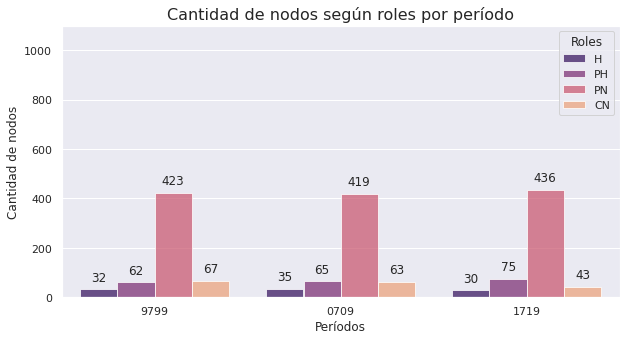

In [126]:
fig = plt.figure(figsize=(10,5))
sns.set_theme()
g = sns.barplot(x='periodo', y='valores',
                 data=roles_por_periodo, order=['9799','0709','1719'], 
                 hue='rol_short', hue_order=['H','PH','PN','CN'], palette='magma', alpha=0.75)
g.set_xlabel('Períodos')
g.set_ylabel('Cantidad de nodos')
g.set_ylim(0, 1100)
g.set_title('Cantidad de nodos según roles por período', fontsize=16)
g.legend(title='Roles')
#plt.show()

# Call the function above. All the magic happens there.
add_value_labels(g)
plt.savefig('../figures/nodes_rol_by_period.png')

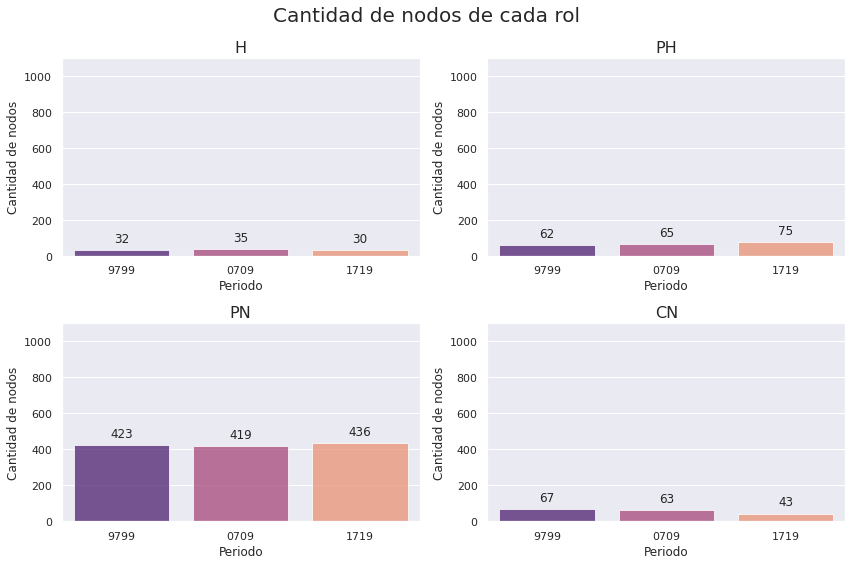

In [127]:
fig = plt.figure(figsize=(12,8))
i = 1
for rol in ['H','PH','PN','CN']:
    df = roles_por_periodo[roles_por_periodo.rol_short==rol]
    ax = plt.subplot(2,2,i)
    sns.barplot(x='periodo', y='valores', order=['9799','0709','1719'], 
                data=df,
                ax=ax, palette='magma', alpha=0.75)
    ax.set_xlabel('Periodo')
    ax.set_ylabel('Cantidad de nodos')
    ax.set_ylim(0, 1100)
    ax.set_title(f'{rol.upper()}', fontsize=16)
    add_value_labels(ax)
    #ax.set_ylim([0,60])
    i += 1
plt.suptitle('Cantidad de nodos de cada rol', fontsize=20)

plt.tight_layout()
#plt.show()
plt.savefig('../figures/nodes_rol.png')

In [128]:
# analizo las categorías que incluirían hubs 
node_types_categ[(node_types_categ.node_type_abr=='H')&(node_types_categ.periodo=='1719')&(node_types_categ.densidad==0.53)].Desc_Categ_short.unique()

array(['Alimentos y animales', 'Aceites y grasas', 'Otras manufacturas',
       'Productos químicos', 'Combustibles', 'Productos manufacturados'],
      dtype=object)

In [129]:
node_types_categ[(node_types_categ.node_type_abr=='H')&(node_types_categ.periodo=='1719')&(node_types_categ.densidad==0.53)].node.unique()

array(['201', '209', '408', '206', '404', '9403', '808', '1501', '3001',
       '3403', '2917', '6216', '4304', '2907', '2931', '2915', '2914',
       '2912', '2831', '2812', '3004', '6208', '6206', '702', '5211',
       '5206', '5510', '6305', '9401', '5309'], dtype=object)

In [130]:
# veo cuantos hubs hay para la categoria alimentos y animales y a qué nodos (prods) corresponden
node_types_categ[(node_types_categ.node_type_abr=='H')&(node_types_categ.periodo=='1719')&(node_types_categ.densidad==0.53)&(node_types_categ.Desc_Categ_short=='Alimentos y animales')].node.unique()

array(['201', '408', '206', '404', '808', '1501', '702'], dtype=object)

In [133]:
# veo cuantos hubs hay de productos bio y a qué nodos (prods) corresponden
node_types_categ[(node_types_categ.node_type_abr=='H')&(node_types_categ.periodo=='1719')&(node_types_categ.densidad==0.53)&(node_types_categ.es_bio_prod==True)].node.unique()

array(['201', '209', '408', '206', '404', '9403', '808', '1501', '3001',
       '3403', '2917', '6216', '4304', '2907', '2931', '2915', '2914',
       '2912', '2831', '2812', '3004', '6208', '6206', '702', '5211',
       '5206', '5510', '6305', '9401', '5309'], dtype=object)

In [134]:
roles_por_categ = node_types_categ[node_types_categ.densidad==0.53].groupby(['periodo','node_type_abr','Desc_Categ_short'])['node_type_abr'].count().reset_index(name='rol')
roles_por_categ.head()

periodo node_type_abr      Desc_Categ_short  rol
0    0709            CN      Aceites y grasas    1
1    0709            CN  Alimentos y animales   16
2    0709            CN      Bebidas y tabaco    2
3    0709            CN       Materias primas    1
4    0709            CN    Otras manufacturas   13

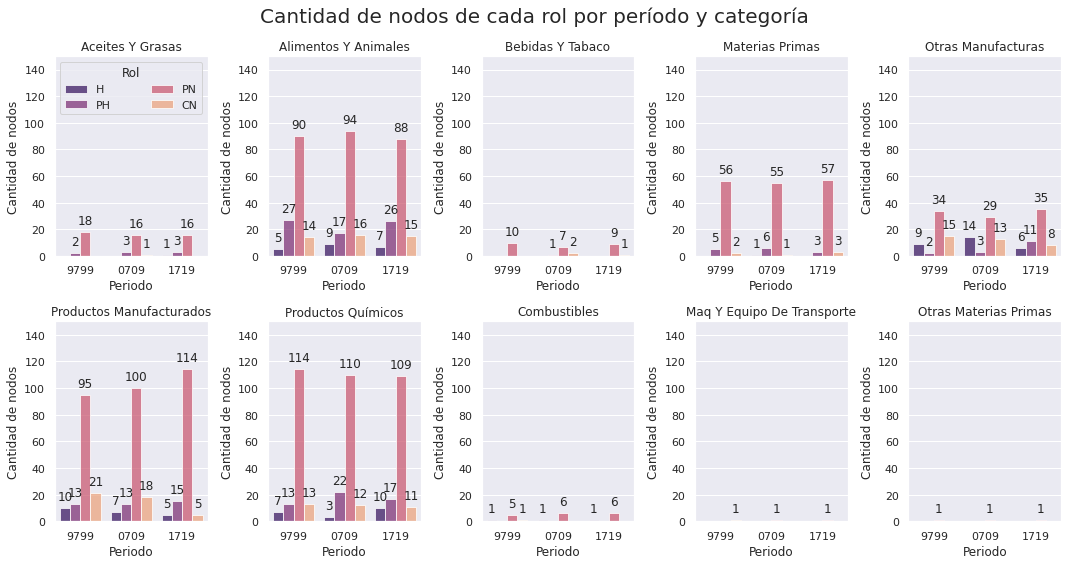

In [142]:
fig = plt.figure(figsize=(15,8))
i = 1
for categ in roles_por_categ.Desc_Categ_short.unique():
    df = roles_por_categ[roles_por_categ.Desc_Categ_short==categ]
    ax = plt.subplot(2,5,i)
    sns.barplot(x='periodo', y='rol',
                data=df, order=['9799','0709','1719'], 
                hue='node_type_abr', hue_order=['H','PH','PN','CN'],
                ax=ax, palette='magma', alpha=0.75)
    ax.set_xlabel('Periodo')
    ax.set_ylabel('Cantidad de nodos')
    ax.set_ylim(0, 150)
    ax.set_title(f'{categ.title()}', fontsize=12)
    add_value_labels(ax)
    if i == 1:
        ax.legend(title='Rol', loc='upper left', mode='expand',ncol=2)
    else:
        ax.get_legend().remove()
    #ax.set_ylim([0,25])
    i += 1
plt.suptitle('Cantidad de nodos de cada rol por período y categoría', fontsize=20)
plt.tight_layout()
#plt.show()
plt.savefig('../nodes_rol_by_period_categ.png')

In [145]:
# selecciono densidad == 0.4 para graficar
roles_por_periodo2 = df_results[df_results.densidad==0.4]

In [146]:
roles_por_periodo2

periodo  densidad  connector_nodes  hubs  prov_hubs  prov_nodes
2     0709       0.4            346.0  92.0       17.0       129.0
8     1719       0.4            368.0  93.0       14.0       109.0
14    9799       0.4            385.0  76.0       15.0       108.0

In [147]:
roles_por_periodo2 = pd.melt(roles_por_periodo2, id_vars=['periodo'], var_name='roles', value_name='valores')
roles_por_periodo2 = roles_por_periodo2[roles_por_periodo2.roles!='densidad']
roles_por_periodo2['rol_short'] = roles_por_periodo2.roles.apply(lambda x:
                                 ''.join([i[0].title() for i in x.split('_')])
                                 if type(x) == str else x)

La siguiente función para agregar los valores al gráfico fue obtenida de [Stackoverflow](https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart)

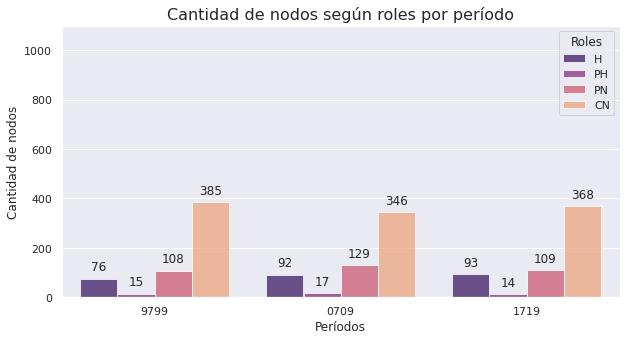

In [149]:
fig = plt.figure(figsize=(10,5))
sns.set_theme()
g = sns.barplot(x='periodo', y='valores',
                 data=roles_por_periodo2, order=['9799','0709','1719'], 
                 hue='rol_short', hue_order=['H','PH','PN','CN'], palette='magma', alpha=0.75)
g.set_xlabel('Períodos')
g.set_ylabel('Cantidad de nodos')
g.set_ylim(0, 1100)
g.set_title('Cantidad de nodos según roles por período', fontsize=16)
g.legend(title='Roles')
#plt.show()

# Call the function above. All the magic happens there.
add_value_labels(g)
#plt.savefig('../figures/nodes_rol_by_period.png')

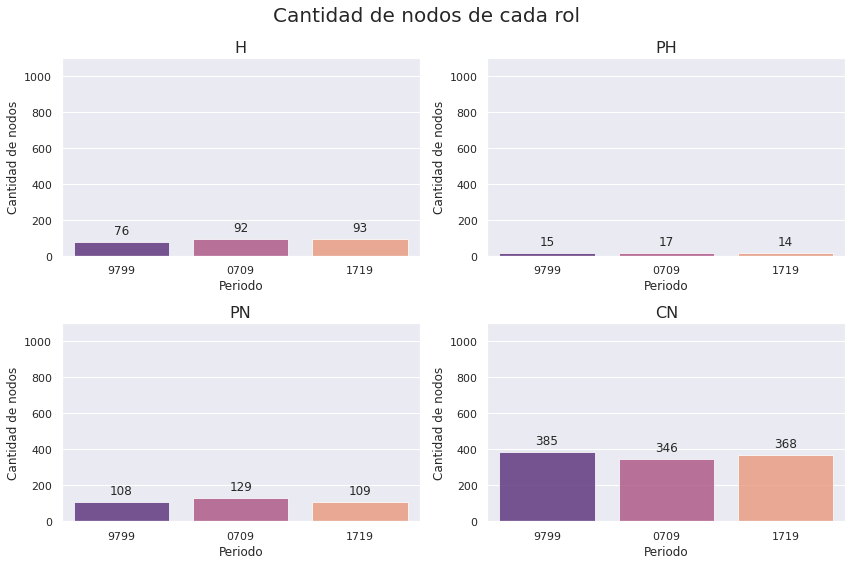

In [150]:
fig = plt.figure(figsize=(12,8))
i = 1
for rol in ['H','PH','PN','CN']:
    df = roles_por_periodo2[roles_por_periodo2.rol_short==rol]
    ax = plt.subplot(2,2,i)
    sns.barplot(x='periodo', y='valores', order=['9799','0709','1719'], 
                data=df,
                ax=ax, palette='magma', alpha=0.75)
    ax.set_xlabel('Periodo')
    ax.set_ylabel('Cantidad de nodos')
    ax.set_ylim(0, 1100)
    ax.set_title(f'{rol.upper()}', fontsize=16)
    add_value_labels(ax)
    #ax.set_ylim([0,60])
    i += 1
plt.suptitle('Cantidad de nodos de cada rol', fontsize=20)

plt.tight_layout()
plt.show()
#plt.savefig('../figures/nodes_rol.png')

In [151]:
# analizo las categorías que incluirían hubs 
node_types_categ[(node_types_categ.node_type_abr=='H')&(node_types_categ.periodo=='1719')&(node_types_categ.densidad==0.4)].Desc_Categ_short.unique()

array(['Alimentos y animales', 'Productos químicos', 'Aceites y grasas',
       'Productos manufacturados', 'Otras manufacturas', 'Combustibles'],
      dtype=object)

In [152]:
node_types_categ[(node_types_categ.node_type_abr=='H')&(node_types_categ.periodo=='1719')&(node_types_categ.densidad==0.4)].node.unique()

array(['201', '1520', '209', '408', '206', '3502', '808', '4302', '1213',
       '404', '4822', '2007', '4410', '1904', '4821', '105', '2103',
       '2309', '1601', '4415', '811', '401', '2105', '3402', '1602',
       '4819', '406', '1905', '2005', '3305', '2104', '5809', '3507',
       '2936', '3813', '1501', '2923', '2922', '2916', '2938', '3001',
       '2925', '2906', '2907', '2931', '3404', '2917', '2915', '3821',
       '3815', '3403', '306', '302', '1605', '303', '307', '2301', '6211',
       '6203', '6205', '6104', '6110', '6204', '6106', '6103', '6109',
       '6105', '6101', '6107', '5206', '6216', '5804', '5902', '5808',
       '5209', '5308', '5210', '5309', '6213', '5807', '6214', '5510',
       '5515', '6002', '6304', '5516', '5604', '6303', '5208', '5407',
       '5801', '2833', '703'], dtype=object)

In [153]:
# veo cuantos hubs hay para la categoria alimentos y animales y a qué nodos (prods) corresponden
node_types_categ[(node_types_categ.node_type_abr=='H')&(node_types_categ.periodo=='1719')&(node_types_categ.densidad==0.4)&(node_types_categ.Desc_Categ_short=='Alimentos y animales')].node.unique()

array(['201', '408', '206', '808', '1213', '404', '2007', '1904', '105',
       '2103', '2309', '1601', '811', '401', '2105', '1602', '406',
       '1905', '2005', '2104', '1501', '306', '302', '1605', '303', '307',
       '2301', '703'], dtype=object)

In [154]:
# veo cuantos hubs hay de productos bio y a qué nodos (prods) corresponden
node_types_categ[(node_types_categ.node_type_abr=='H')&(node_types_categ.periodo=='1719')&(node_types_categ.densidad==0.4)&(node_types_categ.es_bio_prod==True)].node.unique()

array(['201', '1520', '209', '408', '206', '3502', '808', '4302', '1213',
       '404', '4822', '2007', '4410', '1904', '4821', '105', '2103',
       '2309', '1601', '4415', '811', '401', '2105', '3402', '1602',
       '4819', '406', '1905', '2005', '3305', '2104', '5809', '3507',
       '2936', '3813', '1501', '2923', '2922', '2916', '2938', '3001',
       '2925', '2906', '2907', '2931', '3404', '2917', '2915', '3821',
       '3815', '3403', '306', '302', '1605', '303', '307', '2301', '6211',
       '6203', '6205', '6104', '6110', '6204', '6106', '6103', '6109',
       '6105', '6101', '6107', '5206', '6216', '5804', '5902', '5808',
       '5209', '5308', '5210', '5309', '6213', '5807', '6214', '5510',
       '5515', '6002', '6304', '5516', '5604', '6303', '5208', '5407',
       '5801', '2833', '703'], dtype=object)

In [157]:
roles_por_categ2 = node_types_categ[node_types_categ.densidad==0.4].groupby(['periodo','node_type_abr','Desc_Categ_short'])['node_type_abr'].count().reset_index(name='rol')
roles_por_categ2.head()

periodo node_type_abr            Desc_Categ_short  rol
0    0709            CN            Aceites y grasas   13
1    0709            CN        Alimentos y animales   92
2    0709            CN            Bebidas y tabaco    7
3    0709            CN                Combustibles    5
4    0709            CN  Maq y equipo de transporte    1

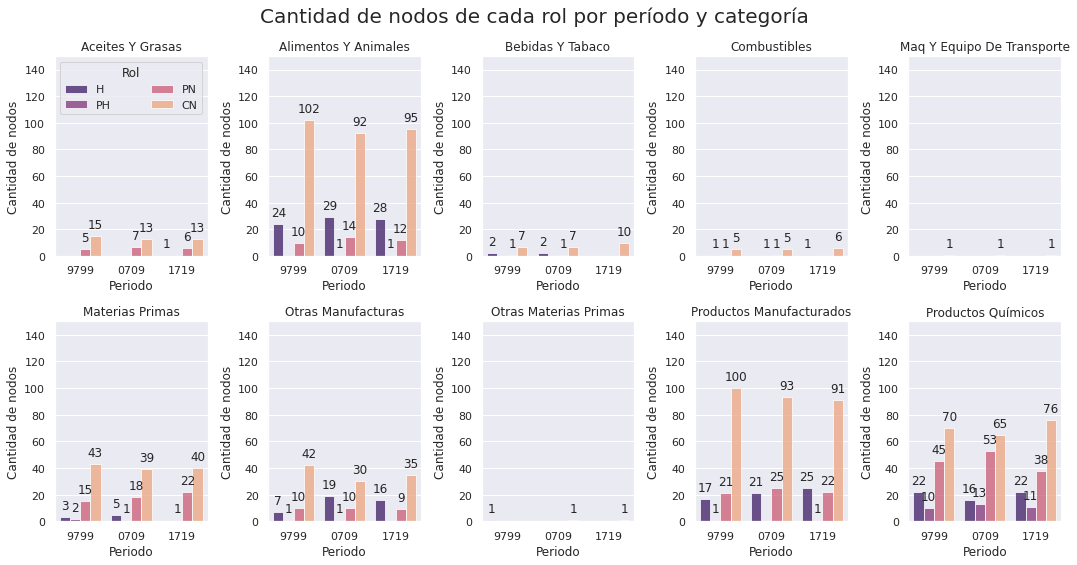

In [159]:
fig = plt.figure(figsize=(15,8))
i = 1
for categ in roles_por_categ2.Desc_Categ_short.unique():
    df = roles_por_categ2[roles_por_categ2.Desc_Categ_short==categ]
    ax = plt.subplot(2,5,i)
    sns.barplot(x='periodo', y='rol',
                data=df, order=['9799','0709','1719'], 
                hue='node_type_abr', hue_order=['H','PH','PN','CN'],
                ax=ax, palette='magma', alpha=0.75)
    ax.set_xlabel('Periodo')
    ax.set_ylabel('Cantidad de nodos')
    ax.set_ylim(0, 150)
    ax.set_title(f'{categ.title()}', fontsize=12)
    add_value_labels(ax)
    if i == 1:
        ax.legend(title='Rol', loc='upper left', mode='expand',ncol=2)
    else:
        ax.get_legend().remove()
    #ax.set_ylim([0,25])
    i += 1
plt.suptitle('Cantidad de nodos de cada rol por período y categoría', fontsize=20)
plt.tight_layout()
#plt.show()
plt.savefig('../nodes_rol_by_period_categ.png')